# Well Log Porosity Prediction

#### (Supervised Regression - Statistical Methods)
#### Date: May, 2022
#### Authors: Anuola Osinaike

## Contents

__1. Data Loading__
> 1.1 Data Inspection

__2. Data Exploration__
> 2.1 Data Vizualization<br>
> 2.2 Data Distribution

__3. Data Preprocessing__
> 3.1 Split Data

__4. Feature Engineering__
> 4.1 Non-linear Transformation
>> 4.1.1 Best-matching Distribution<br>
>> 4.1.2 Gaussian Mapping
>>> 4.1.2.1 Power Transform<br>
>>> 4.1.2.2 Quantile Transform<br>
>>> 4.1.2.3 Standard Scaling<br>
>>> 4.1.2.4 Robust Scaling<br>
>>> 4.1.2.5 Gaussian Mapping Inspection

> 4.2 Covariance Estimation<br>
> 4.3 Statistical Features
>> 4.3.1 Rolling Statistics<br>
>> 4.3.2 Expanding Statistics

> 4.4 Principal Component Analysis

__5. Dimensionality Reduction__
> 5.1 Feature Selection

__6. Supervised Regression__
> 6.1 Model Selection and Evaluation
>> 6.1.1 Cross-Validation and Hyper-Parameterization
>>> 6.1.1.1 Model Training<br>
>>> 6.1.1.2 Model Prediction

>> 6.1.2 Metrics and Scoring
>>> 6.1.2.1 Machine Learning Models

>> 6.1.3 Validation Curves
>>> 6.1.3.1 Learning Curve

>> 6.1.4 Voting Ensemble<br>
>> 6.1.5 Stacking Ensemble

> 6.2 Model Inspection and Visualization
>> 6.2.1 Inspection Plots<br>
>> 6.2.2 Feature Importance
>>> 6.2.2.1 Permutation Feature Importance (PFI)

#### Algorithms:
- Linear Regression
- Support Vector Machine
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- Extra Trees 
- Adaptive Boosting
- Gradient Boosting
- Histogram Gradient Boosting
- Extreme Gradient Boosting
- Ligth Gradient Boosting
- Multi-Layer Perceptron*

*Neural Network

## 1. Data Loading

```python
# install dependencies
pip install scikit-learn==1.0.1
pip install scikit-optimize==0.9.0
pip install xgboost==1.5.0
pip install lightgbm==3.3.1
pip install distfit==1.4.1
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor as HGBRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
# import the data to a dataframe
data = pd.read_excel('WellLog_data.xlsx', header=0)
data.head()

PHIF     DTC     DEN      GR     NEU
0 -9999.0 -9999.0 -9999.0  5.3274 -9999.0
1 -9999.0 -9999.0 -9999.0  5.8235 -9999.0
2 -9999.0 -9999.0 -9999.0  6.5228 -9999.0
3 -9999.0 -9999.0 -9999.0  7.2285 -9999.0
4 -9999.0 -9999.0 -9999.0  9.5020 -9999.0

In [4]:
# replace nan id
data = data.replace(-9999.0, np.nan)
data.head()

PHIF  DTC  DEN      GR  NEU
0   NaN  NaN  NaN  5.3274  NaN
1   NaN  NaN  NaN  5.8235  NaN
2   NaN  NaN  NaN  6.5228  NaN
3   NaN  NaN  NaN  7.2285  NaN
4   NaN  NaN  NaN  9.5020  NaN

In [5]:
data.shape

(24000, 5)

### 1.1 Data Inspection

In [6]:
# view descriptive statistics
data.describe()

PHIF          DTC          DEN            GR          NEU
count  1252.000000  1375.000000  1375.000000  22375.000000  1375.000000
mean      0.230059   102.936493     2.240020     81.356809     0.413389
std       0.065113    17.566784     0.108057     26.965887     0.173088
min       0.040494    51.945400     1.943000      5.327400     0.057920
25%       0.176348    98.471850     2.162700     66.133300     0.286193
50%       0.242333   106.537600     2.216500     81.920300     0.354575
75%       0.279584   111.953650     2.318300     96.562800     0.512365
max       0.346079   181.813900     2.626700    160.436400     1.463474

## 2. Data Exploration

### 2.1 Data Visualization

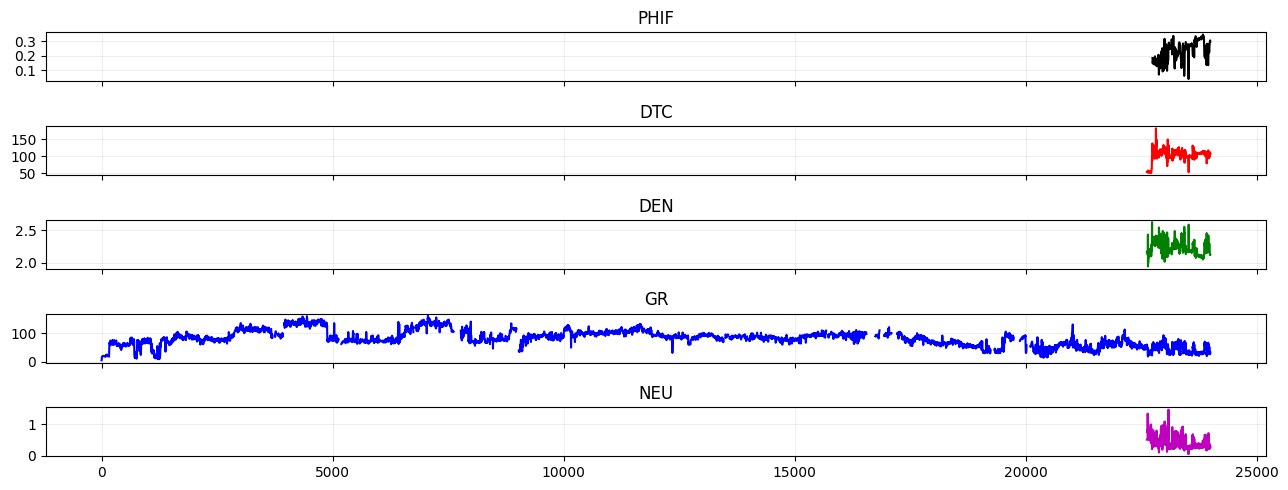

In [7]:
# plot the data
fig, axs = plt.subplots(figsize=(13, data.shape[1]), nrows=data.shape[1], sharex=True)

colors = ['k', 'r', 'g', 'b', 'm']
for i in range(data.shape[1]):
    axs[i].plot(data.iloc[:, i], color=colors[i])
    axs[i].set_title(data.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

### 2.2 Data Distribution

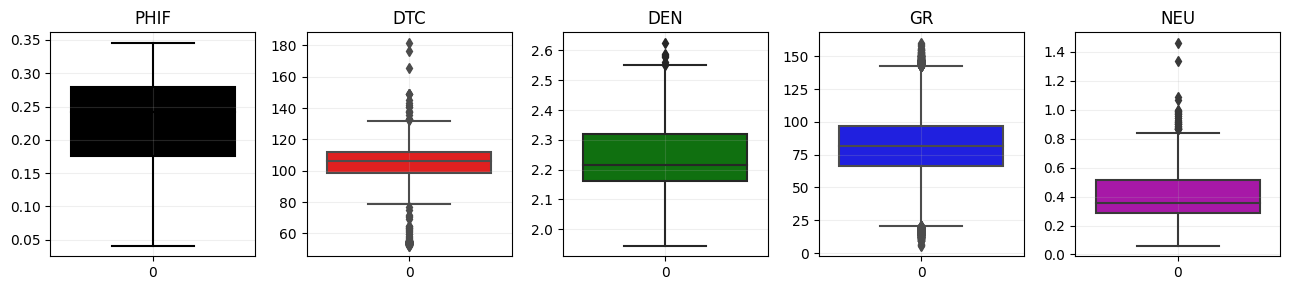

In [8]:
# plot the boxplot to inspect the data spread and centers
fig, axs = plt.subplots(figsize=(13, 3), ncols=data.shape[1])

colors = ['k', 'r', 'g', 'b', 'm']
for i in range(data.shape[1]):
    sns.boxplot(data=data.iloc[:, i], ax=axs[i], color=colors[i])
    axs[i].set_title(data.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

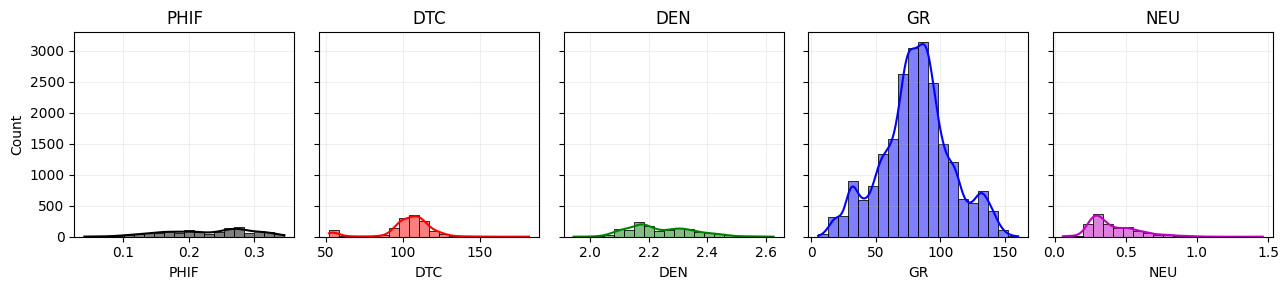

In [9]:
# plot the histplot to inspect the frequency distribution and trend
fig, axs = plt.subplots(figsize=(13, 3), ncols=data.shape[1], sharey=True)

colors = ['k', 'r', 'g', 'b', 'm']
for i in range(data.shape[1]):
    sns.histplot(data=data.iloc[:, i], bins=20, kde=True, ax=axs[i], color=colors[i])    
    axs[i].set_title(data.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

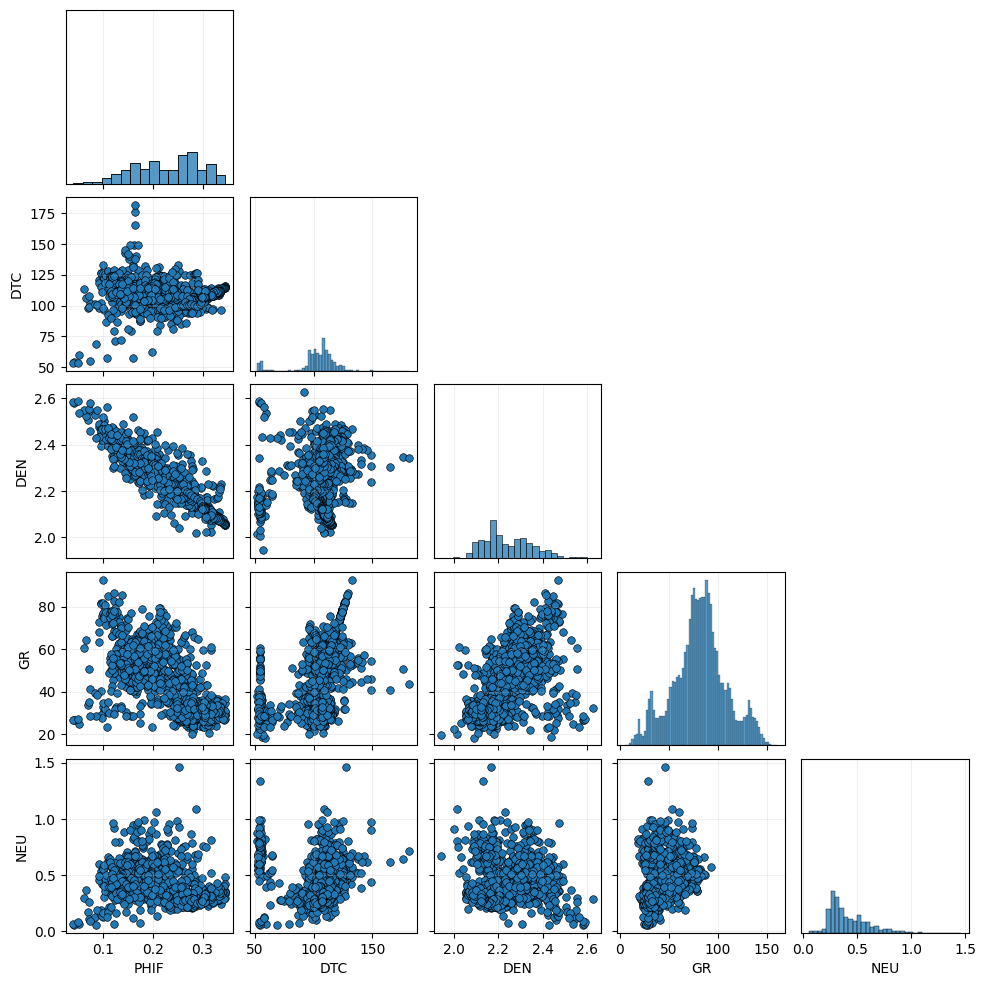

In [10]:
# plot the scatterplot to inspect the variables relationship and correlation
markers = ['o', 's', 'v', 'p', '^', 'P', '<', 'X', '>']

pg = sns.pairplot(data=data, plot_kws={'s': 30, 'edgecolor': 'k'}, 
                  corner=True, height=2, aspect=1)

for i, ax in enumerate(pg.fig.axes):
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.grid(alpha=0.2)
#pg.fig.text(0.5, 1, 'Scatterplots', ha='center', va='center', size=18)
pg.tight_layout()

## 3. Data Preprocessing

### 3.1 Split Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# drop nan from the dataframe
data = data.dropna(axis=0)
data = data.reset_index(drop=True)
data.head()

PHIF       DTC     DEN       GR       NEU
0  0.184759  132.2417  2.2937  62.7379  0.420963
1  0.180910  123.9160  2.3030  53.8436  0.742682
2  0.172497  115.0600  2.2769  52.8516  0.459793
3  0.161982  121.8756  2.2808  58.2263  0.499141
4  0.149478  125.3476  2.3272  57.3380  0.600855

In [13]:
data.shape

(1252, 5)

In [14]:
# split the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, -4:], data.iloc[:, [0]], 
                                                    test_size=0.25, random_state=1234, shuffle=True)

In [15]:
X_train.head()

DTC     DEN       GR       NEU
458   96.0516  2.2121  32.6332  0.233845
224  121.5169  2.4708  73.4145  0.967742
509  114.1082  2.2744  60.9137  0.557612
795   98.6748  2.2045  33.8884  0.249485
519  118.0590  2.3411  67.5799  0.517579

In [16]:
X_test.head()

DTC     DEN       GR       NEU
632  109.8226  2.3613  53.6824  0.355298
859   96.9747  2.1749  27.6775  0.273217
582  102.2533  2.1528  28.2500  0.340408
456   96.9381  2.2155  26.5994  0.270522
156  108.0815  2.2816  50.7447  0.574287

## 4. Feature Engineering

### 4.1 Non-linear Transformation

In [17]:
from distfit import distfit
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#### 4.1.1 Best-matching Distribution

In [18]:
# create a function for performing automated goodness-of-fit (GOF) test
def gof_test(data):
    # data: dataframe for the goodness-of-fit test
    
    dist = [distfit() for i in range(len(data.columns))]
    bm_dist = [i for i in range(len(data.columns))]

    start_time = time.time()

    for i, feat in enumerate(data.columns):
        bm_dist[i] = dist[i].fit_transform(data[feat].dropna())

    end_time = time.time()
    print(f'Training time: {end_time - start_time} seconds')
    
    return dist, bm_dist

In [19]:
# perform automated goodness-of-fit (GOF) test on the original data
dist, bm_dist = gof_test(data=data)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.01 sec] [RSS: 152.1161171] [loc=0.230 scale=0.065]
[distfit] >[expon     ] [0.0 sec] [RSS: 542.4814956] [loc=0.040 scale=0.190]
[distfit] >[pareto    ] [0.0 sec] [RSS: 542.4814908] [loc=-33554431.960 scale=33554432.000]
[distfit] >[dweibull  ] [0.07 sec] [RSS: 91.8019750] [loc=0.228 scale=0.063]
[distfit] >[t         ] [0.54 sec] [RSS: 152.1029365] [loc=0.230 scale=0.065]
[distfit] >[genextreme] [0.09 sec] [RSS: 118.1349067] [loc=0.214 scale=0.071]
[distfit] >[gamma     ] [0.19 sec] [RSS: 155.5572905] [loc=-0.964 scale=0.004]
[distfit] >[lognorm   ] [0.39 sec] [RSS: 153.1928204] [loc=-8.015 scale=8.244]
[distfit] >[beta      ] [0.19 sec] [RSS: 104.7644883] [loc=0.029 scale=0.319]
[distfit] >[uniform   ] [0.0 sec] [RSS: 267.8003472] [loc=0.040 scale=0.306]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 135.6628340] [loc=0.175 scale=0.091]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform

In [20]:
# check the best matching distribution
for i, feat in enumerate(data.columns):
    print(f'{feat}: ', bm_dist[i]['model']['distr'])

PHIF:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000002879C433430>
DTC:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000002879C433430>
DEN:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000002879C433430>
GR:  <scipy.stats._continuous_distns.lognorm_gen object at 0x000002879C484DF0>
NEU:  <scipy.stats._continuous_distns.genextreme_gen object at 0x000002879C449870>



******* PHIF Best Matching Distribution *******
[distfit] >plot..

******* DTC Best Matching Distribution *******
[distfit] >plot..

******* DEN Best Matching Distribution *******
[distfit] >plot..

******* GR Best Matching Distribution *******
[distfit] >plot..

******* NEU Best Matching Distribution *******
[distfit] >plot..


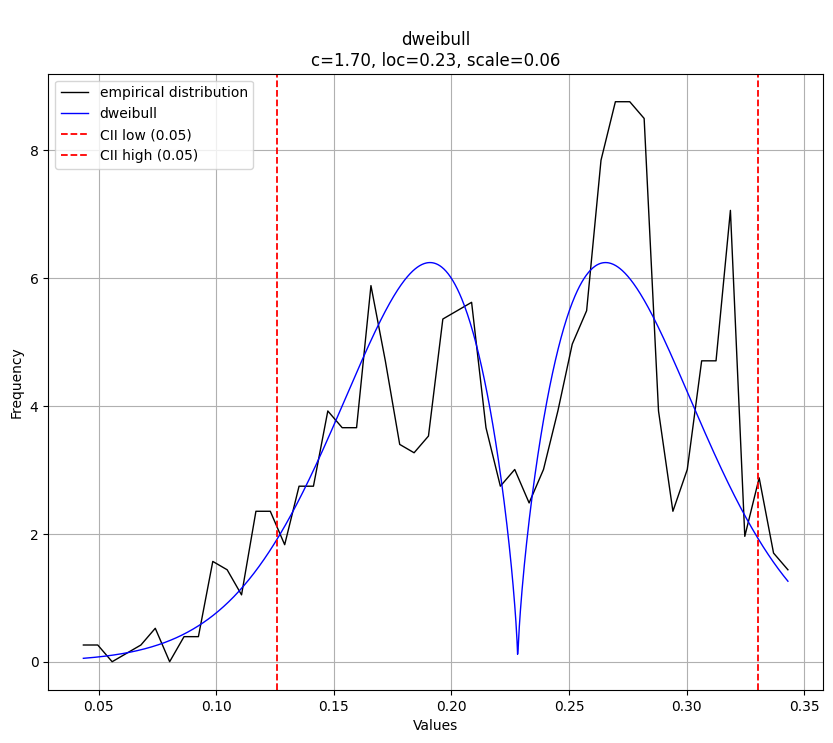

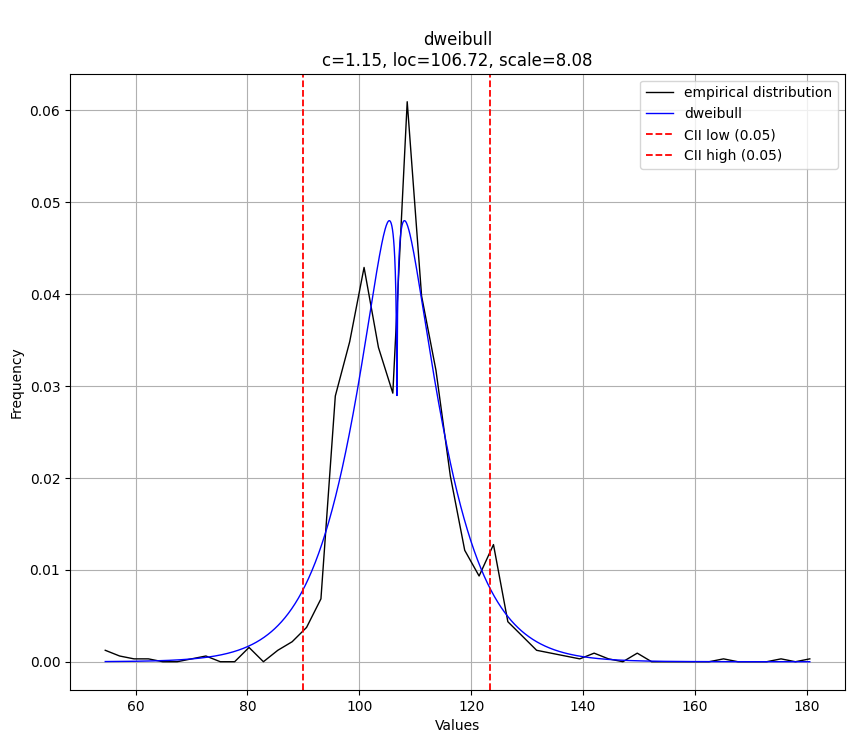

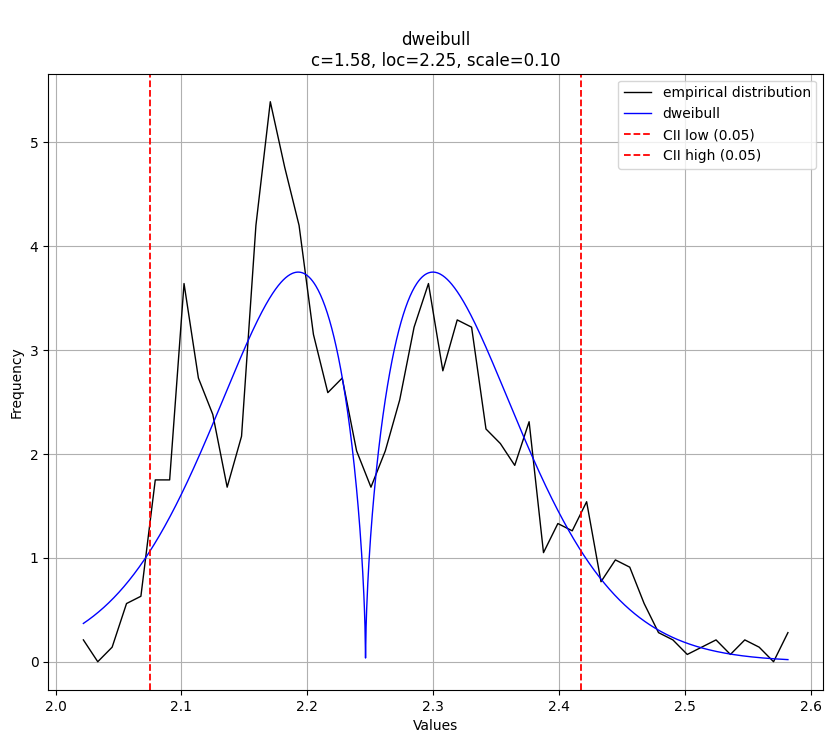

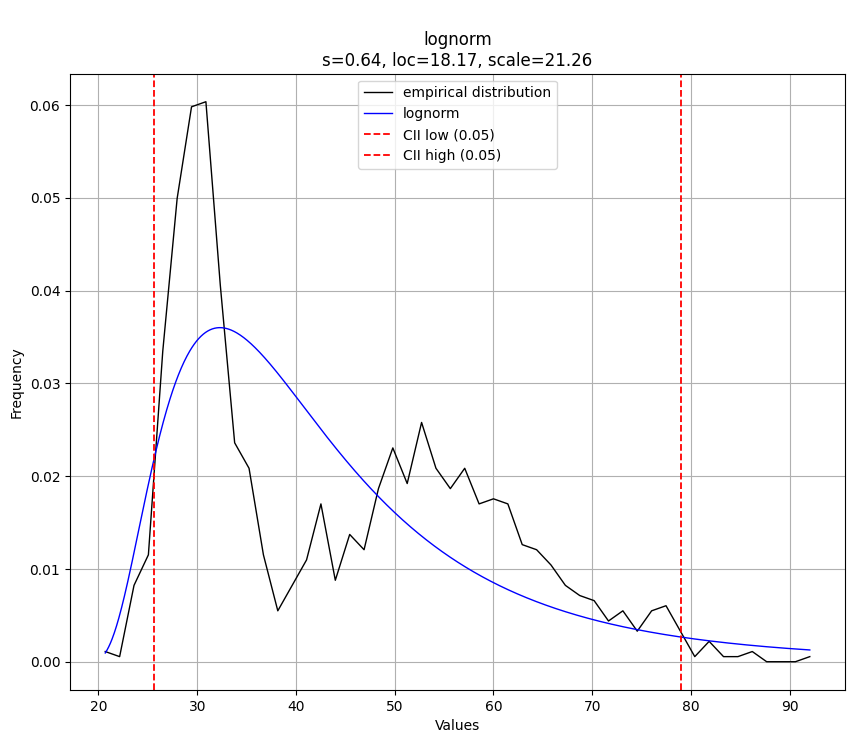

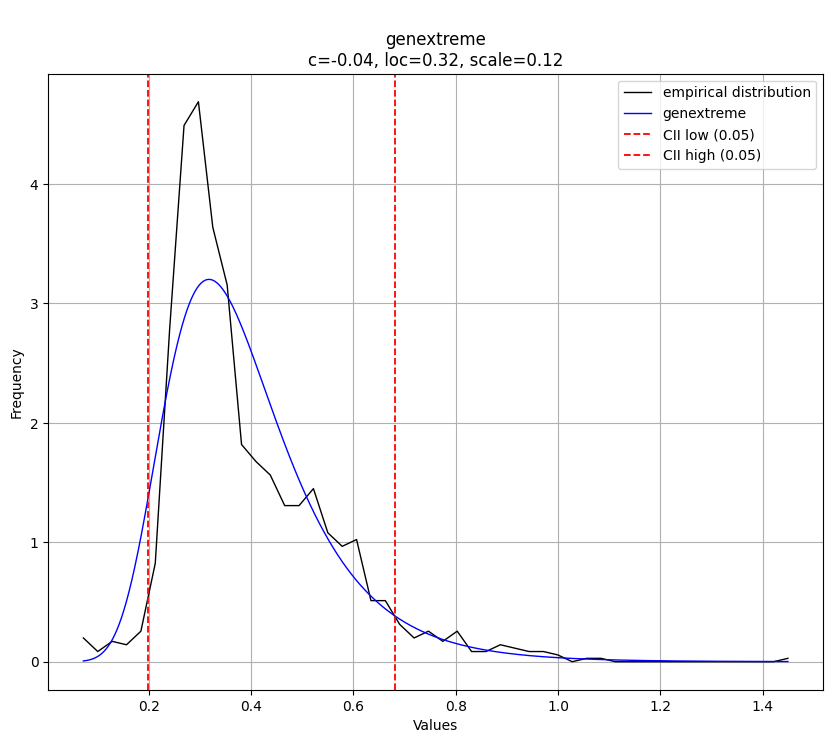

In [21]:
# plot the probability distribution fit
for i, feat in enumerate(data.columns):
    print()
    print(f'******* {feat} Best Matching Distribution *******')
    dist[i].plot()

#### 4.1.2 Gaussian Mapping

In [22]:
# create a function for performing transformation of the test set to normal distribution
def transform(data, dist_fit):
    # data: dataframe to be transformed
    # dist_fit: model from the training set
    
    dist = dist_fit.transform(data)
    dist = pd.DataFrame(dist, index=data.index, columns=data.columns)
    
    return dist

##### 4.1.2.1 Power Transform

In [23]:
# perform power transform of the train set to normal distribution
power_dist_fit = PowerTransformer(method='yeo-johnson').fit(X_train)
power_dist_train = power_dist_fit.transform(X_train)
power_dist_train = pd.DataFrame(power_dist_train, index=X_train.index, columns=X_train.columns)

In [24]:
# perform power transform of the test set to normal distribution
power_dist_test = transform(data=X_test, dist_fit=power_dist_fit)

In [25]:
# merge the train and test sets
power_dist = pd.concat([power_dist_train, power_dist_test], axis=0)
power_dist = power_dist.sort_index()

In [26]:
# perform automated goodness-of-fit (GOF) test on the power transformed data
dist_p, bm_dist_p = gof_test(data=power_dist)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.0 sec] [RSS: 0.1553656] [loc=-0.028 scale=1.012]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.3190164] [loc=-5.718 scale=5.690]
[distfit] >[pareto    ] [0.00 sec] [RSS: 1.3190164] [loc=-1073741829.718 scale=1073741824.000]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 0.1333748] [loc=-0.025 scale=0.751]
[distfit] >[t         ] [0.17 sec] [RSS: 0.1298879] [loc=-0.038 scale=0.726]
[distfit] >[genextreme] [0.29 sec] [RSS: 0.2708704] [loc=-0.446 scale=1.190]
[distfit] >[gamma     ] [0.19 sec] [RSS: 0.1582947] [loc=-25.157 scale=0.042]
[distfit] >[lognorm   ] [0.40 sec] [RSS: 0.1538552] [loc=-223.663 scale=223.632]
[distfit] >[beta      ] [0.32 sec] [RSS: 0.1560466] [loc=-343.702 scale=398.471]
[distfit] >[uniform   ] [0.00 sec] [RSS: 1.1586289] [loc=-5.718 scale=12.005]
[distfit] >[loggamma  ] [0.16 sec] [RSS: 0.1564227] [loc=-105.445 scale=18.227]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >tra

In [27]:
# check the best matching distribution
for i, feat in enumerate(power_dist.columns):
    print(f'{feat}: ', bm_dist_p[i]['model']['distr'])

DTC:  <scipy.stats._continuous_distns.t_gen object at 0x000002879C4861D0>
DEN:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000002879C433430>
GR:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000002879C433430>
NEU:  <scipy.stats._continuous_distns.gamma_gen object at 0x000002879C448520>



******* DTC Best Matching Distribution *******
[distfit] >plot..

******* DEN Best Matching Distribution *******
[distfit] >plot..

******* GR Best Matching Distribution *******
[distfit] >plot..

******* NEU Best Matching Distribution *******
[distfit] >plot..


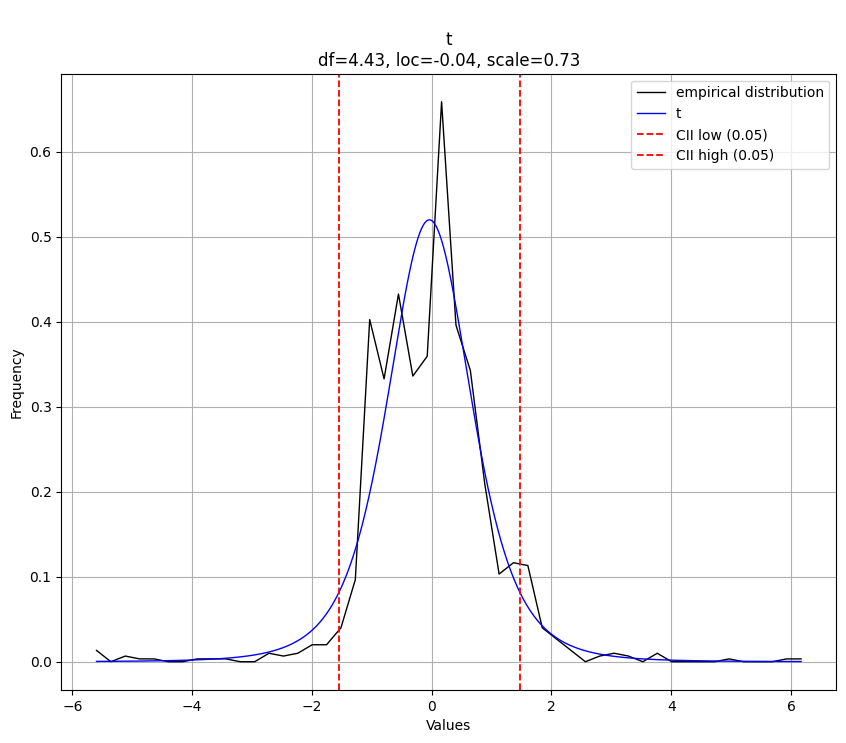

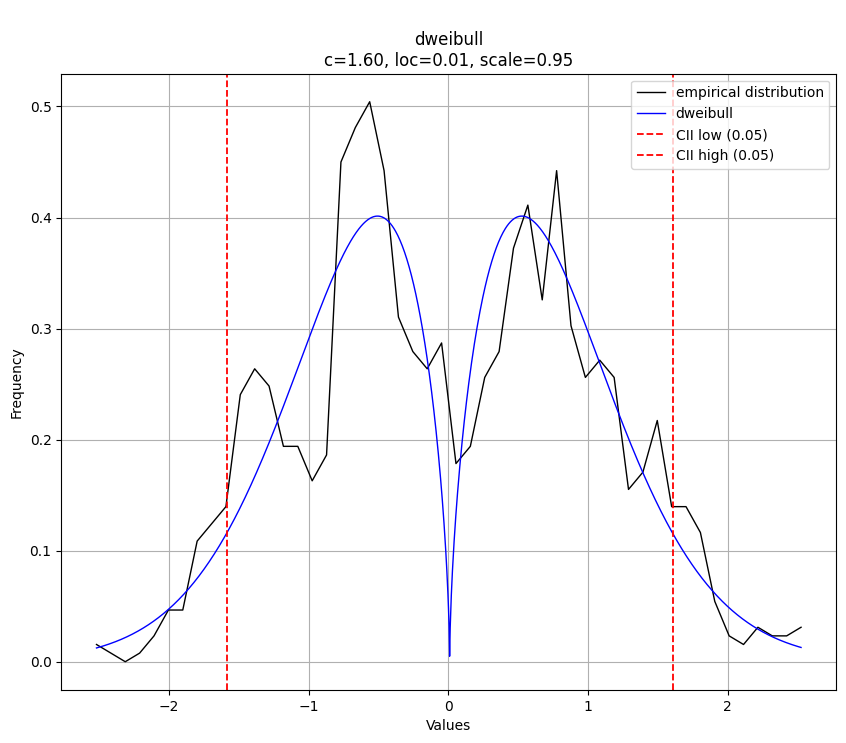

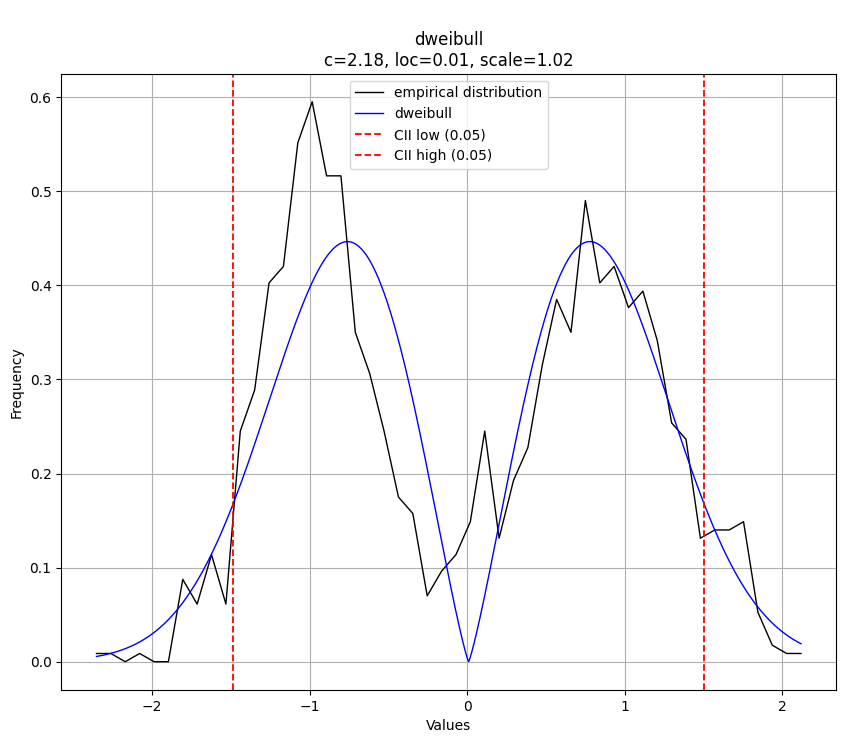

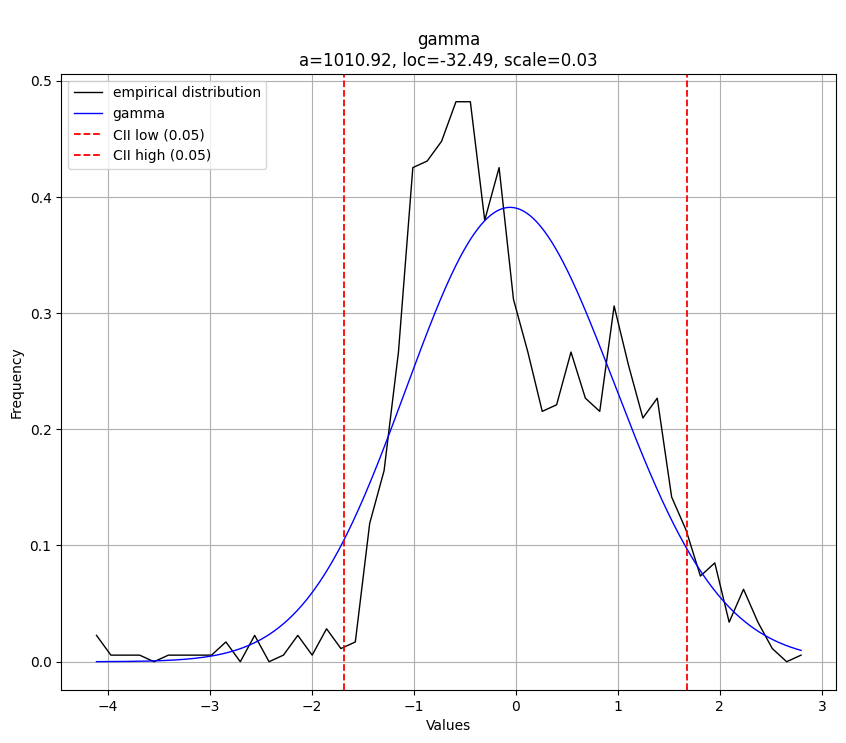

In [28]:
# plot the probability distribution fit
for i, feat in enumerate(power_dist.columns):
    print()
    print(f'******* {feat} Best Matching Distribution *******')
    dist_p[i].plot()

##### 4.1.2.2 Quantile Transform

In [29]:
# perform quantile transform of the train set to normal distribution
quantile_dist_fit = QuantileTransformer(n_quantiles=len(X_train), 
                                        output_distribution='normal', 
                                        subsample=len(X_train), 
                                        random_state=1234).fit(X_train)
quantile_dist_train = quantile_dist_fit.transform(X_train)
quantile_dist_train = pd.DataFrame(quantile_dist_train, index=X_train.index, columns=X_train.columns)

In [30]:
# perform quantile transform of the test set to normal distribution
quantile_dist_test = transform(data=X_test, dist_fit=quantile_dist_fit)

In [31]:
# merge the train and test sets
quantile_dist = pd.concat([quantile_dist_train, quantile_dist_test], axis=0)
quantile_dist = quantile_dist.sort_index()

In [32]:
# perform automated goodness-of-fit (GOF) test on the quantile transformed data
dist_q, bm_dist_q = gof_test(data=quantile_dist)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.01 sec] [RSS: 0.0079800] [loc=-0.027 scale=1.032]
[distfit] >[expon     ] [0.0 sec] [RSS: 1.1250050] [loc=-5.199 scale=5.172]
[distfit] >[pareto    ] [0.0 sec] [RSS: 1.1250050] [loc=-1073741829.199 scale=1073741824.000]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 0.0138143] [loc=-0.020 scale=0.851]
[distfit] >[t         ] [0.20 sec] [RSS: 0.0060913] [loc=-0.021 scale=0.933]
[distfit] >[genextreme] [0.32 sec] [RSS: 0.0391709] [loc=-0.446 scale=1.089]
[distfit] >[gamma     ] [0.18 sec] [RSS: 0.0101470] [loc=-22.230 scale=0.049]
[distfit] >[lognorm   ] [0.40 sec] [RSS: 0.0079059] [loc=-226.327 scale=226.294]
[distfit] >[beta      ] [0.31 sec] [RSS: 0.0084243] [loc=-565.923 scale=587.439]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.9043161] [loc=-5.199 scale=10.399]
[distfit] >[loggamma  ] [0.11 sec] [RSS: 0.0086204] [loc=-39.891 scale=9.137]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transfo

In [33]:
# check the best matching distribution
for i, feat in enumerate(quantile_dist.columns):
    print(f'{feat}: ', bm_dist_q[i]['model']['distr'])

DTC:  <scipy.stats._continuous_distns.t_gen object at 0x000002879C4861D0>
DEN:  <scipy.stats._continuous_distns.norm_gen object at 0x000002879C357610>
GR:  <scipy.stats._continuous_distns.loggamma_gen object at 0x000002879C486080>
NEU:  <scipy.stats._continuous_distns.lognorm_gen object at 0x000002879C484DF0>



******* DTC Best Matching Distribution *******
[distfit] >plot..

******* DEN Best Matching Distribution *******
[distfit] >plot..

******* GR Best Matching Distribution *******
[distfit] >plot..

******* NEU Best Matching Distribution *******
[distfit] >plot..


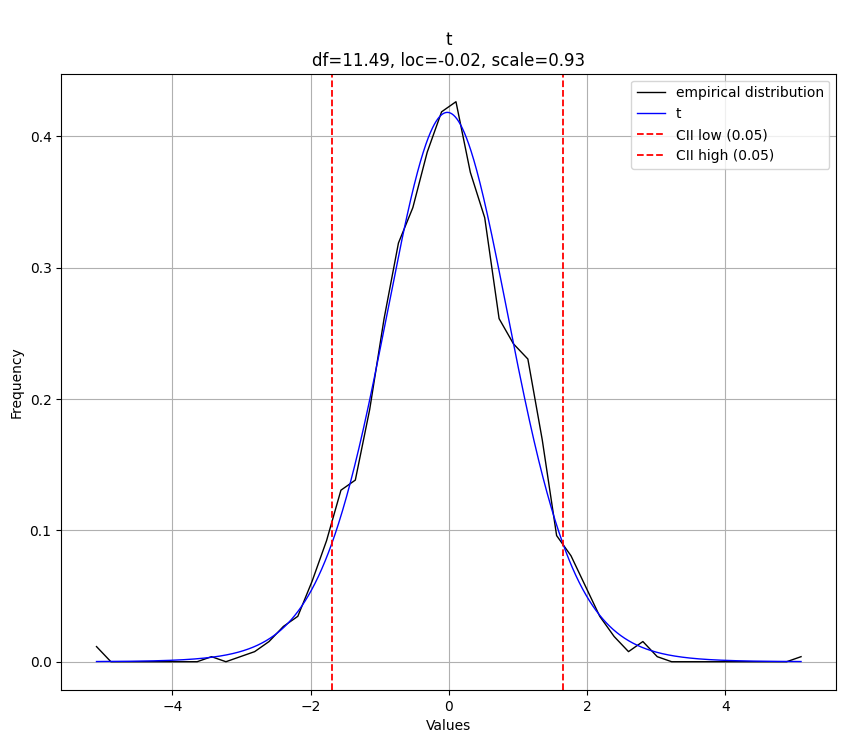

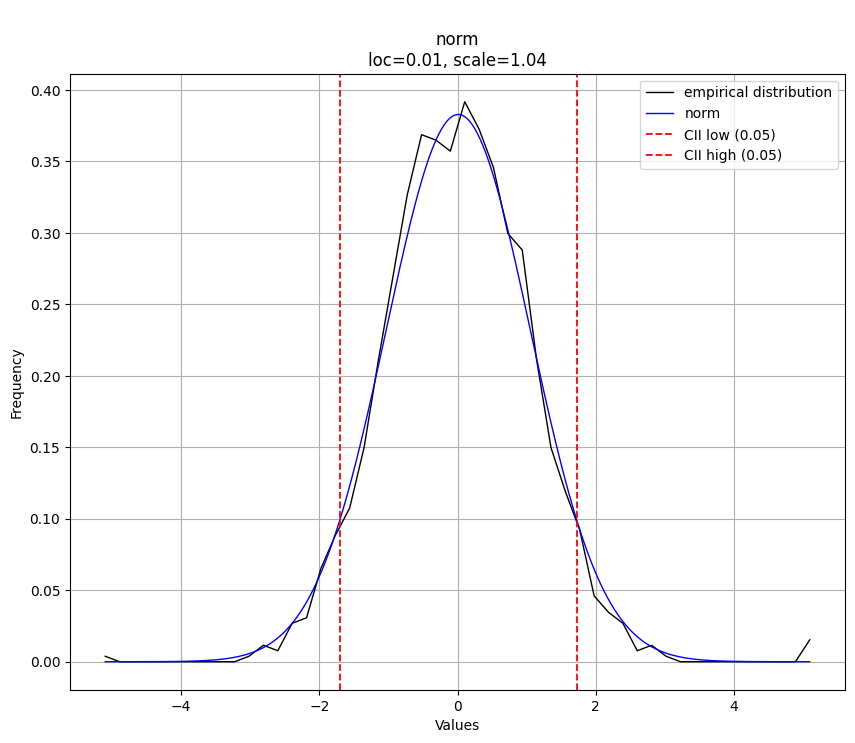

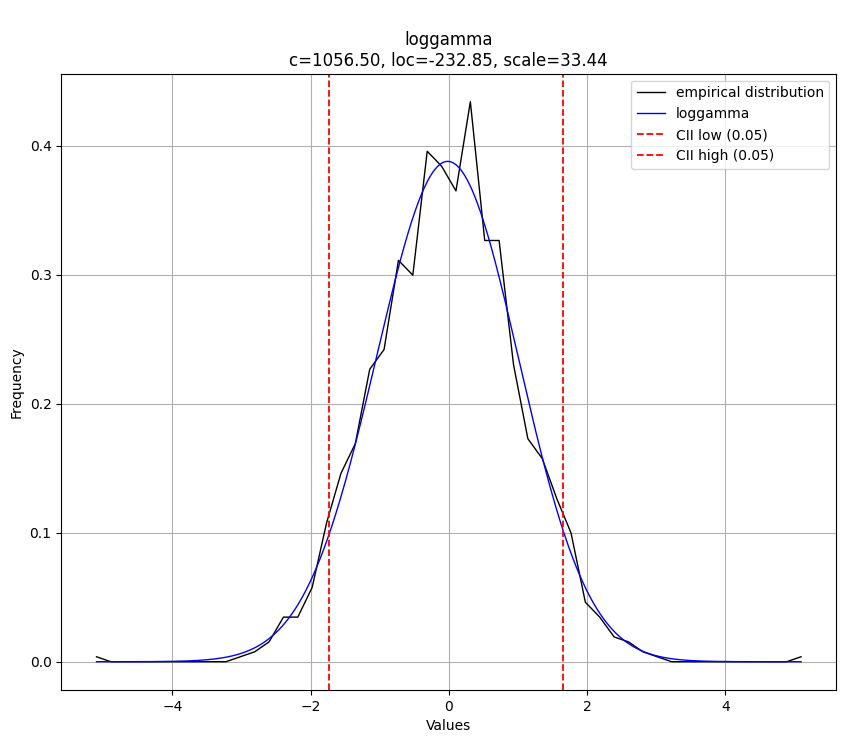

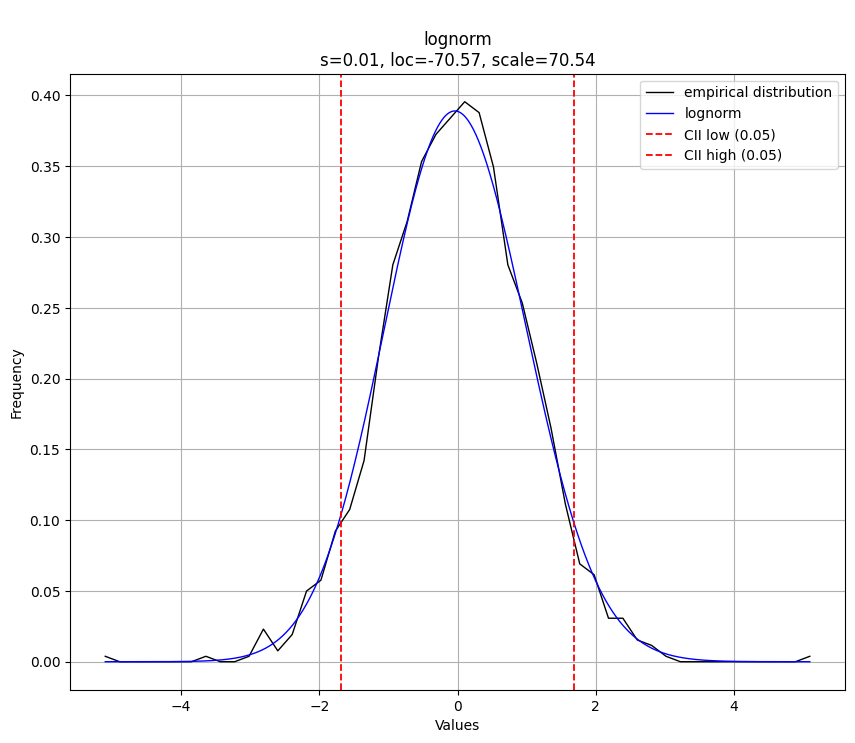

In [34]:
# plot the probability distribution fit
for i, feat in enumerate(quantile_dist.columns):
    print()
    print(f'******* {feat} Best Matching Distribution *******')
    dist_q[i].plot()

##### 4.1.2.3 Standard Scaling

In [35]:
# perform standard scaling of the train set to normal distribution
standard_dist_fit = StandardScaler().fit(X_train)
standard_dist_train = standard_dist_fit.transform(X_train)
standard_dist_train = pd.DataFrame(standard_dist_train, index=X_train.index, columns=X_train.columns)

In [36]:
# perform standard scaling of the test set to normal distribution
standard_dist_test = transform(data=X_test, dist_fit=standard_dist_fit)

In [37]:
# merge the train and test sets
standard_dist = pd.concat([standard_dist_train, standard_dist_test], axis=0)
standard_dist = standard_dist.sort_index()

In [38]:
# perform automated goodness-of-fit (GOF) test on the standard scaled data
dist_s, bm_dist_s = gof_test(data=standard_dist)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.01 sec] [RSS: 0.1456175] [loc=-0.027 scale=1.003]
[distfit] >[expon     ] [0.0 sec] [RSS: 1.2842087] [loc=-5.073 scale=5.046]
[distfit] >[pareto    ] [0.0 sec] [RSS: 1.2842087] [loc=-268435461.073 scale=268435456.000]
[distfit] >[dweibull  ] [0.05 sec] [RSS: 0.1359843] [loc=-0.024 scale=0.743]
[distfit] >[t         ] [0.18 sec] [RSS: 0.1196925] [loc=-0.054 scale=0.723]
[distfit] >[genextreme] [0.29 sec] [RSS: 0.2322647] [loc=-0.446 scale=1.128]
[distfit] >[gamma     ] [0.19 sec] [RSS: 0.1426712] [loc=-19.830 scale=0.051]
[distfit] >[lognorm   ] [0.36 sec] [RSS: 0.1431310] [loc=-56.938 scale=56.902]
[distfit] >[beta      ] [0.31 sec] [RSS: 0.1434609] [loc=-36.358 scale=485.960]
[distfit] >[uniform   ] [0.0 sec] [RSS: 1.1491200] [loc=-5.073 scale=12.039]
[distfit] >[loggamma  ] [0.18 sec] [RSS: 0.1514440] [loc=-272.073 scale=37.670]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transform.

In [39]:
# check the best matching distribution
for i, feat in enumerate(standard_dist.columns):
    print(f'{feat}: ', bm_dist_s[i]['model']['distr'])

DTC:  <scipy.stats._continuous_distns.t_gen object at 0x000002879C4861D0>
DEN:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000002879C433430>
GR:  <scipy.stats._continuous_distns.lognorm_gen object at 0x000002879C484DF0>
NEU:  <scipy.stats._continuous_distns.genextreme_gen object at 0x000002879C449870>



******* DTC Best Matching Distribution *******
[distfit] >plot..

******* DEN Best Matching Distribution *******
[distfit] >plot..

******* GR Best Matching Distribution *******
[distfit] >plot..

******* NEU Best Matching Distribution *******
[distfit] >plot..


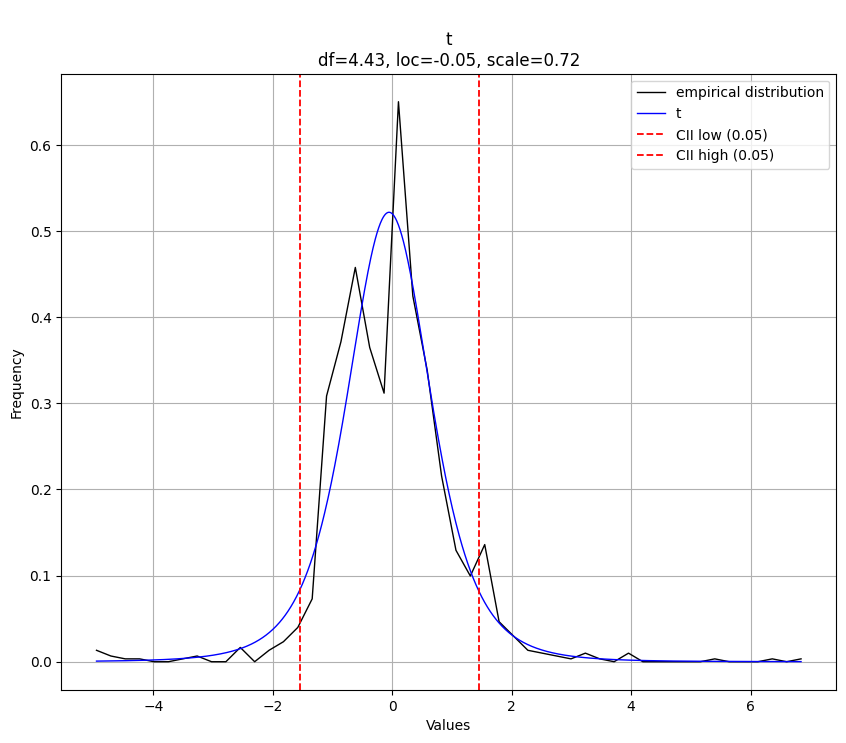

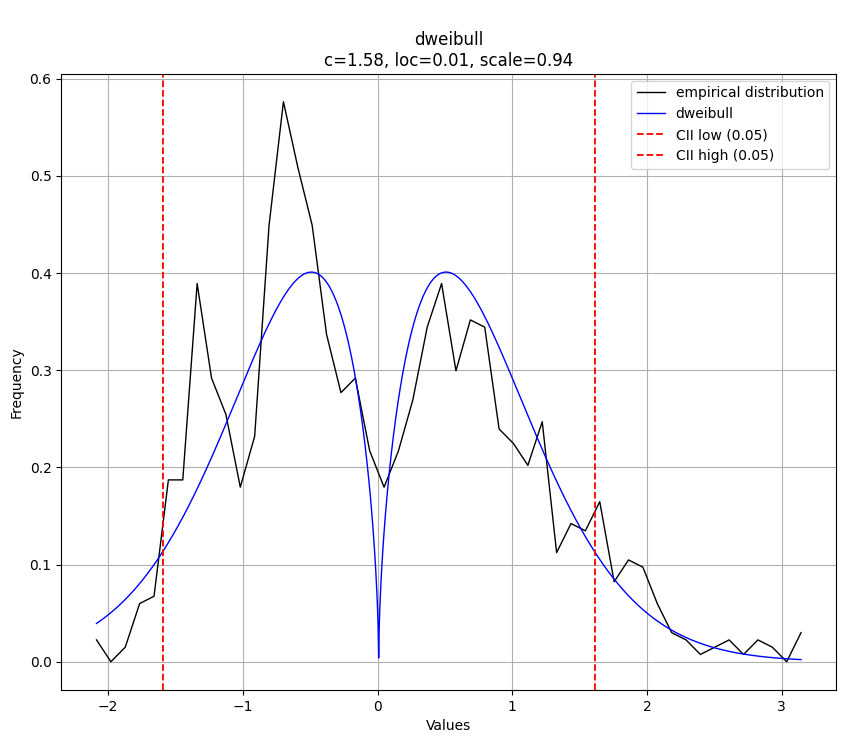

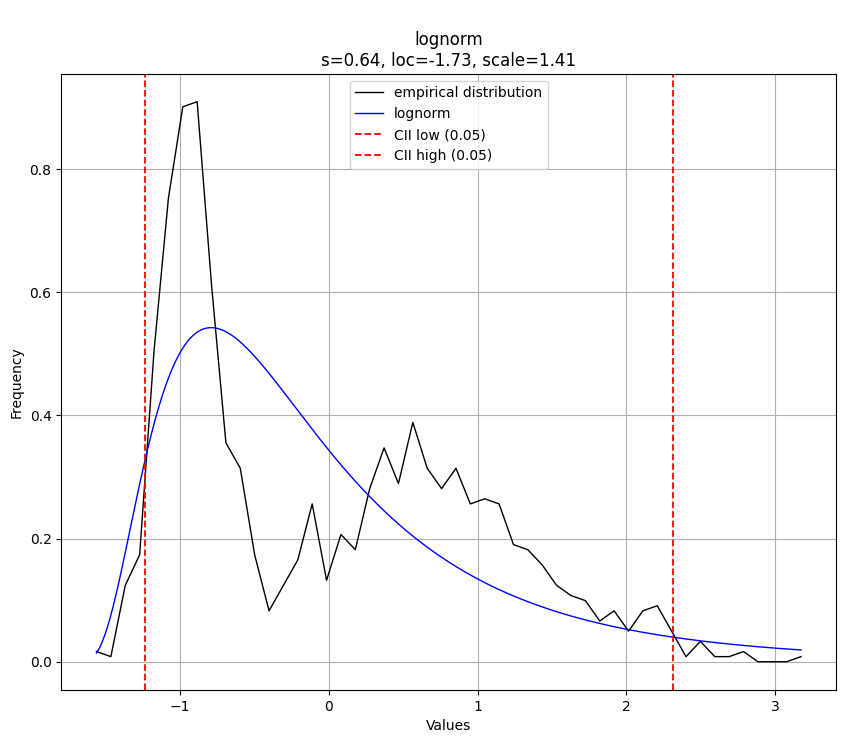

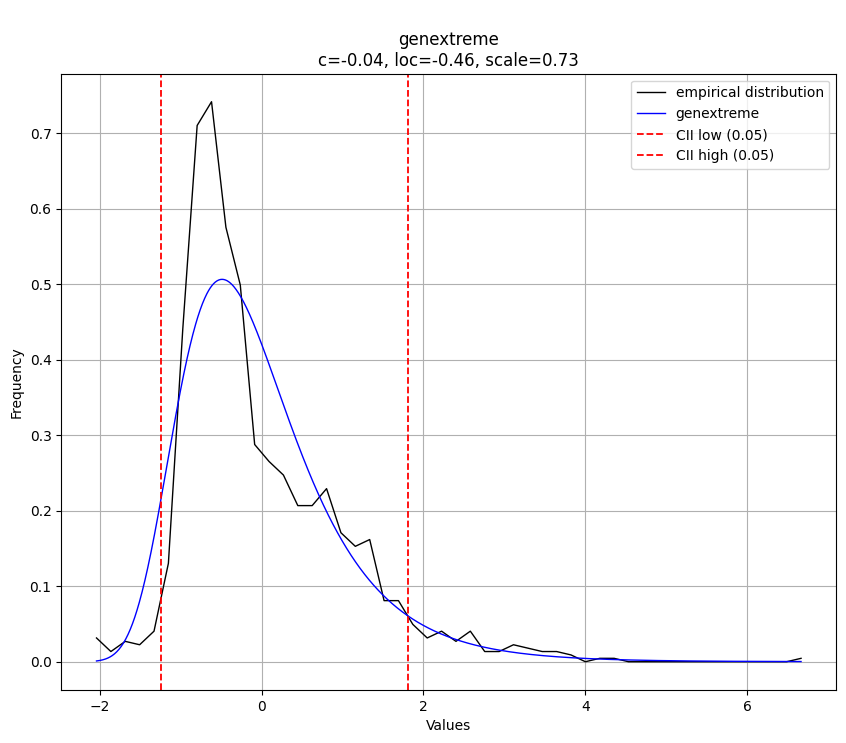

In [40]:
# plot the probability distribution fit
for i, feat in enumerate(standard_dist.columns):
    print()
    print(f'******* {feat} Best Matching Distribution *******')
    dist_s[i].plot()

##### 4.1.2.4 Robust Scaling

In [41]:
# perform robust scaling of the train set to normal distribution
robust_dist_fit = RobustScaler(unit_variance=True).fit(X_train)
robust_dist_train = robust_dist_fit.transform(X_train)
robust_dist_train = pd.DataFrame(robust_dist_train, index=X_train.index, columns=X_train.columns)

In [42]:
# perform standard scaling of the test set to normal distribution
robust_dist_test = transform(data=X_test, dist_fit=robust_dist_fit)

In [43]:
# merge the train and test sets
robust_dist = pd.concat([robust_dist_train, robust_dist_test], axis=0)
robust_dist = robust_dist.sort_index()

In [44]:
# perform automated goodness-of-fit (GOF) test on the standard scaled data
dist_r, bm_dist_r = gof_test(data=robust_dist)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.1060077] [loc=-0.063 scale=1.176]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.9348875] [loc=-5.977 scale=5.914]
[distfit] >[pareto    ] [0.01 sec] [RSS: 0.9348875] [loc=-4294967301.977 scale=4294967296.000]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 0.0987331] [loc=-0.062 scale=0.871]
[distfit] >[t         ] [0.17 sec] [RSS: 0.0871348] [loc=-0.095 scale=0.847]
[distfit] >[genextreme] [0.31 sec] [RSS: 0.1690589] [loc=-0.554 scale=1.322]
[distfit] >[gamma     ] [0.19 sec] [RSS: 0.1055840] [loc=-24.420 scale=0.058]
[distfit] >[lognorm   ] [0.39 sec] [RSS: 0.1041975] [loc=-66.764 scale=66.691]
[distfit] >[beta      ] [0.25 sec] [RSS: 0.1045426] [loc=-52.351 scale=1130.616]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.8365447] [loc=-5.977 scale=14.110]
[distfit] >[loggamma  ] [0.20 sec] [RSS: 0.1095771] [loc=-323.748 scale=44.646]
[distfit] >Compute confidence interval [parametric]
[distfit] >fit..
[distfit] >transf

In [45]:
# check the best matching distribution
for i, feat in enumerate(robust_dist.columns):
    print(f'{feat}: ', bm_dist_r[i]['model']['distr'])

DTC:  <scipy.stats._continuous_distns.t_gen object at 0x000002879C4861D0>
DEN:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000002879C433430>
GR:  <scipy.stats._continuous_distns.dweibull_gen object at 0x000002879C433430>
NEU:  <scipy.stats._continuous_distns.beta_gen object at 0x000002879C357550>



******* DTC Best Matching Distribution *******
[distfit] >plot..

******* DEN Best Matching Distribution *******
[distfit] >plot..

******* GR Best Matching Distribution *******
[distfit] >plot..

******* NEU Best Matching Distribution *******
[distfit] >plot..


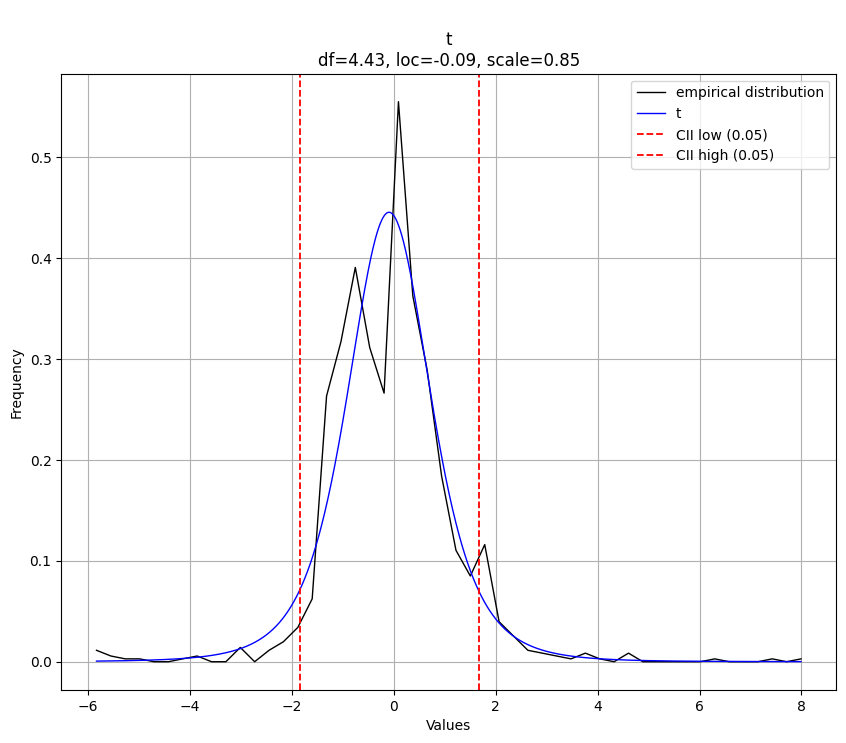

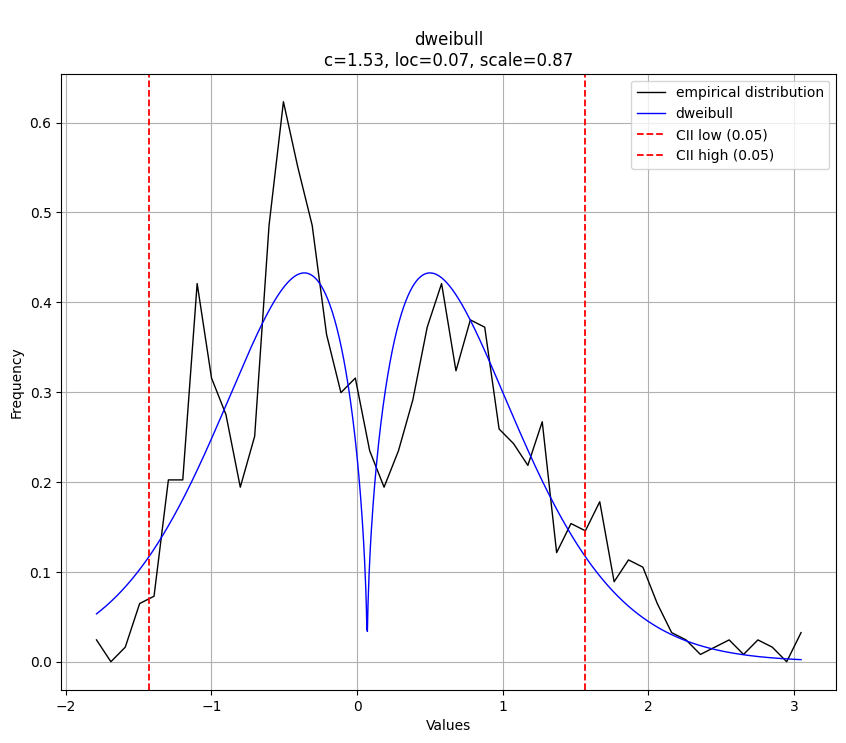

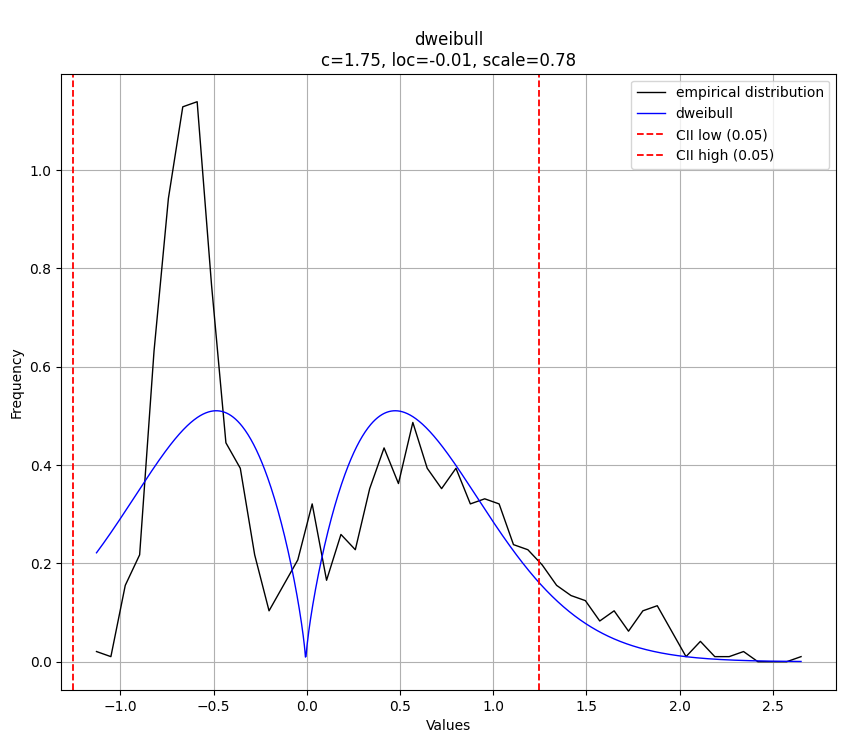

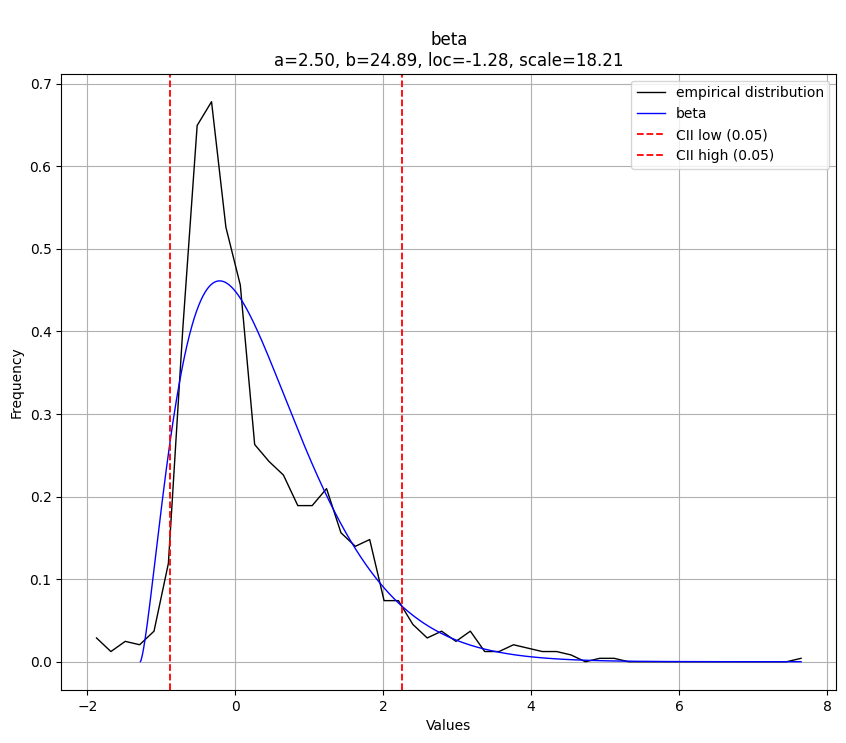

In [46]:
# plot the probability distribution fit
for i, feat in enumerate(robust_dist.columns):
    print()
    print(f'******* {feat} Best Matching Distribution *******')
    dist_r[i].plot()

##### 4.1.2.5 Gaussian Mapping Inspection

In [47]:
# create a dataframe of the transformed features from the best method
feat_trans = quantile_dist.copy()
feat_trans.head()

DTC       DEN        GR       NEU
0  2.172065  0.418056  1.131141  0.409323
1  1.603873  0.510347  0.544127  1.782751
2  0.926965  0.253899  0.465196  0.575383
3  1.412569  0.295528  0.810052  0.741447
4  1.809570  0.737934  0.748501  1.238983

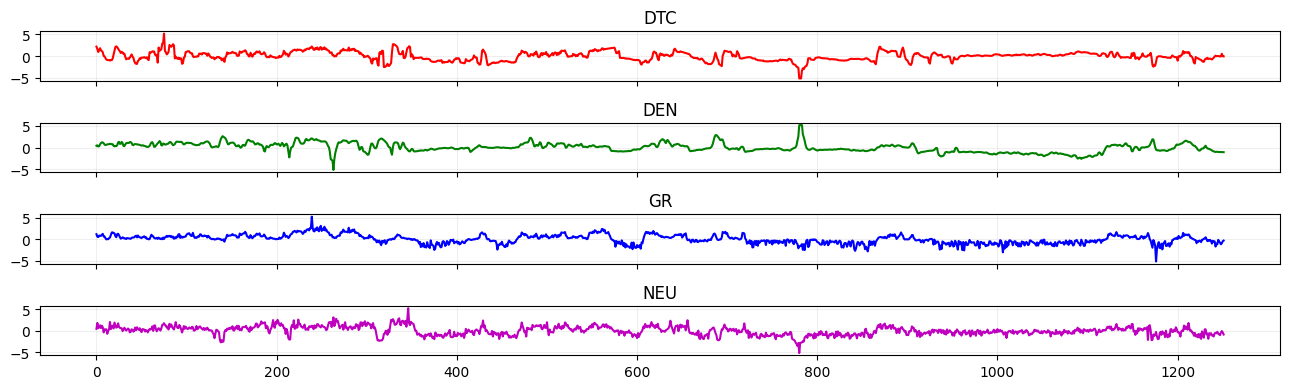

In [48]:
# plot the transformed features
fig, axs = plt.subplots(figsize=(13, feat_trans.shape[1]), nrows=feat_trans.shape[1], sharex=True)

colors = ['r', 'g', 'b', 'm']
for i in range(feat_trans.shape[1]):
    axs[i].plot(feat_trans.iloc[:, i], color=colors[i])
    axs[i].set_title(feat_trans.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

### 4.2 Covariance Estimation

In [49]:
# merge the transformed features and the target
data_corr = pd.concat([data.iloc[:, 0], feat_trans], axis=1)
data_corr.head()

PHIF       DTC       DEN        GR       NEU
0  0.184759  2.172065  0.418056  1.131141  0.409323
1  0.180910  1.603873  0.510347  0.544127  1.782751
2  0.172497  0.926965  0.253899  0.465196  0.575383
3  0.161982  1.412569  0.295528  0.810052  0.741447
4  0.149478  1.809570  0.737934  0.748501  1.238983

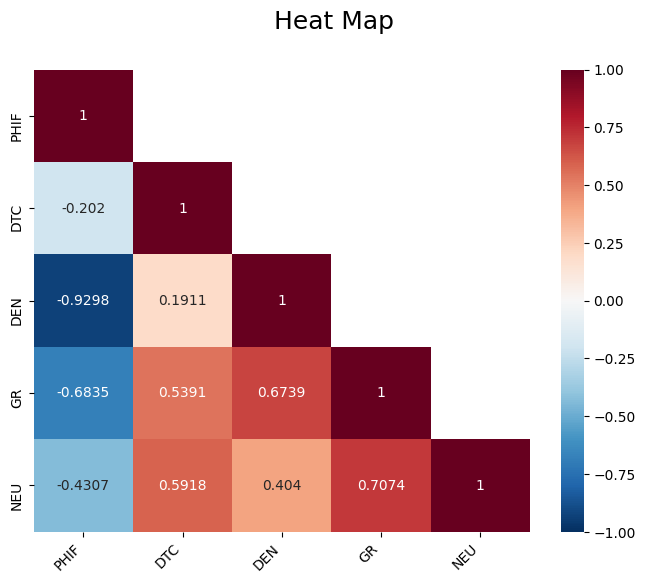

In [50]:
# plot the heat map of the correlation matrix of the transformed data 
corr_mat = np.round(data_corr.corr(method='spearman'), decimals=4)
corr_mask = np.triu(data_corr.corr(method='spearman'), k=1)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_mat, vmin=-1, vmax=1, cmap='RdBu_r', center=0, annot=True, fmt='.4g', 
            square=False, mask=corr_mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right')
plt.suptitle('Heat Map', size=18)
plt.show()

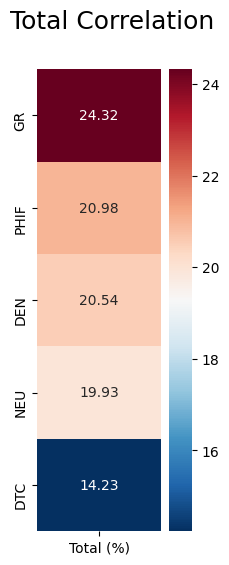

In [51]:
# plot a heat map of the normalized total correlation (ratio of the total absolute correlation of each variable 
# to the total absolute correlation of all variables)
corr_tt = ((corr_mat.abs().sum(axis=1)-1)/((corr_mat.abs().sum(axis=1)-1).sum()))*100
corr_total = pd.DataFrame(corr_tt, columns=['Total (%)']).sort_values(by='Total (%)', ascending=False)

fig, ax = plt.subplots(figsize=(2, 6))
sns.heatmap(corr_total, cmap='RdBu_r', annot=True, fmt='.4g')
plt.suptitle('Total Correlation', size=18)
plt.show()

Features with strong correlation to the target

- DEN

DEN is the most important feature describing the target

### 4.3 Statistical Features

In [52]:
from matplotlib import cm
from matplotlib import colors

#### 4.3.1 Rolling Statistics

In [53]:
# create a function for computing rolling statistics features on the train or test set
def roll_stats_func(data):
    # data: dataframe to compute rolling statistics features on
    
    mean = []
    median = []
    mini = []
    maxi = []
    diff = []
    
    for i, feat in enumerate(data.columns.unique()):

        mean.append(data[feat].rolling(window=3, center=True, min_periods=1).mean())
        median.append(data[feat].rolling(window=3, center=True, min_periods=1).median())
        mini.append(data[feat].rolling(window=3, center=True, min_periods=1).min())
        maxi.append(data[feat].rolling(window=3, center=True, min_periods=1).max())
        diff.append(data[feat].rolling(window=7).apply(lambda x: x.iloc[-1] - x.iloc[0]) / 
                    pd.DataFrame([data.index]).T[0].rolling(window=7).apply(lambda x: x.iloc[-1] - x.iloc[0]))
            
    mean = pd.DataFrame(np.asarray(mean).T, index=data.index, columns=['{}_mn_roll'.format(i) for i in data.columns])
    median = pd.DataFrame(np.asarray(median).T, index=data.index, columns=['{}_md_roll'.format(i) for i in data.columns])
    mini = pd.DataFrame(np.asarray(mini).T, index=data.index, columns=['{}_min_roll'.format(i) for i in data.columns])
    maxi = pd.DataFrame(np.asarray(maxi).T, index=data.index, columns=['{}_max_roll'.format(i) for i in data.columns])
    diff = pd.DataFrame(np.asarray(diff).T, index=data.index, columns=['{}_df_roll'.format(i) for i in data.columns])
    diff = diff.fillna(0)
            
    stats_feat = pd.concat([mean, median, mini, maxi, diff], axis=1)
        
    return stats_feat

In [54]:
# perform statistical features computation on the train and test sets
feat_roll = roll_stats_func(data=feat_trans)

In [55]:
feat_roll.head()

DTC_mn_roll  DEN_mn_roll  GR_mn_roll  NEU_mn_roll  DTC_md_roll  \
0     1.887969     0.464202    0.837634     1.096037     1.887969   
1     1.567635     0.394101    0.713488     0.922486     1.603873   
2     1.314469     0.353258    0.606458     1.033194     1.412569   
3     1.383035     0.429120    0.674583     0.851938     1.412569   
4     1.500826     0.693336    0.767841     0.855100     1.412569   

   DEN_md_roll  GR_md_roll  NEU_md_roll  DTC_min_roll  DEN_min_roll  \
0     0.464202    0.837634     1.096037      1.603873      0.418056   
1     0.418056    0.544127     0.575383      0.926965      0.253899   
2     0.295528    0.544127     0.741447      0.926965      0.253899   
3     0.295528    0.748501     0.741447      0.926965      0.253899   
4     0.737934    0.748501     0.741447      1.280338      0.295528   

   GR_min_roll  NEU_min_roll  DTC_max_roll  DEN_max_roll  GR_max_roll  \
0     0.544127      0.409323      2.172065      0.510347     1.131141   
1     0.465196      0.409323      2.172065      0.510347     1.131141   
2     0.465196      0.575383      1.603873      0.510347     0.810052   
3     0.465196      0.575383      1.809570      0.737934     0.810052   
4     0.744970      0.584870      1.809570      1.046546     0.810052   

   NEU_max_roll  DTC_df_roll  DEN_df_roll  GR_df_roll  NEU_df_roll  
0      1.782751          0.0          0.0         0.0          0.0  
1      1.782751          0.0          0.0         0.0          0.0  
2      1.782751          0.0          0.0         0.0          0.0  
3      1.238983          0.0          0.0         0.0          0.0  
4      1.238983          0.0          0.0         0.0          0.0

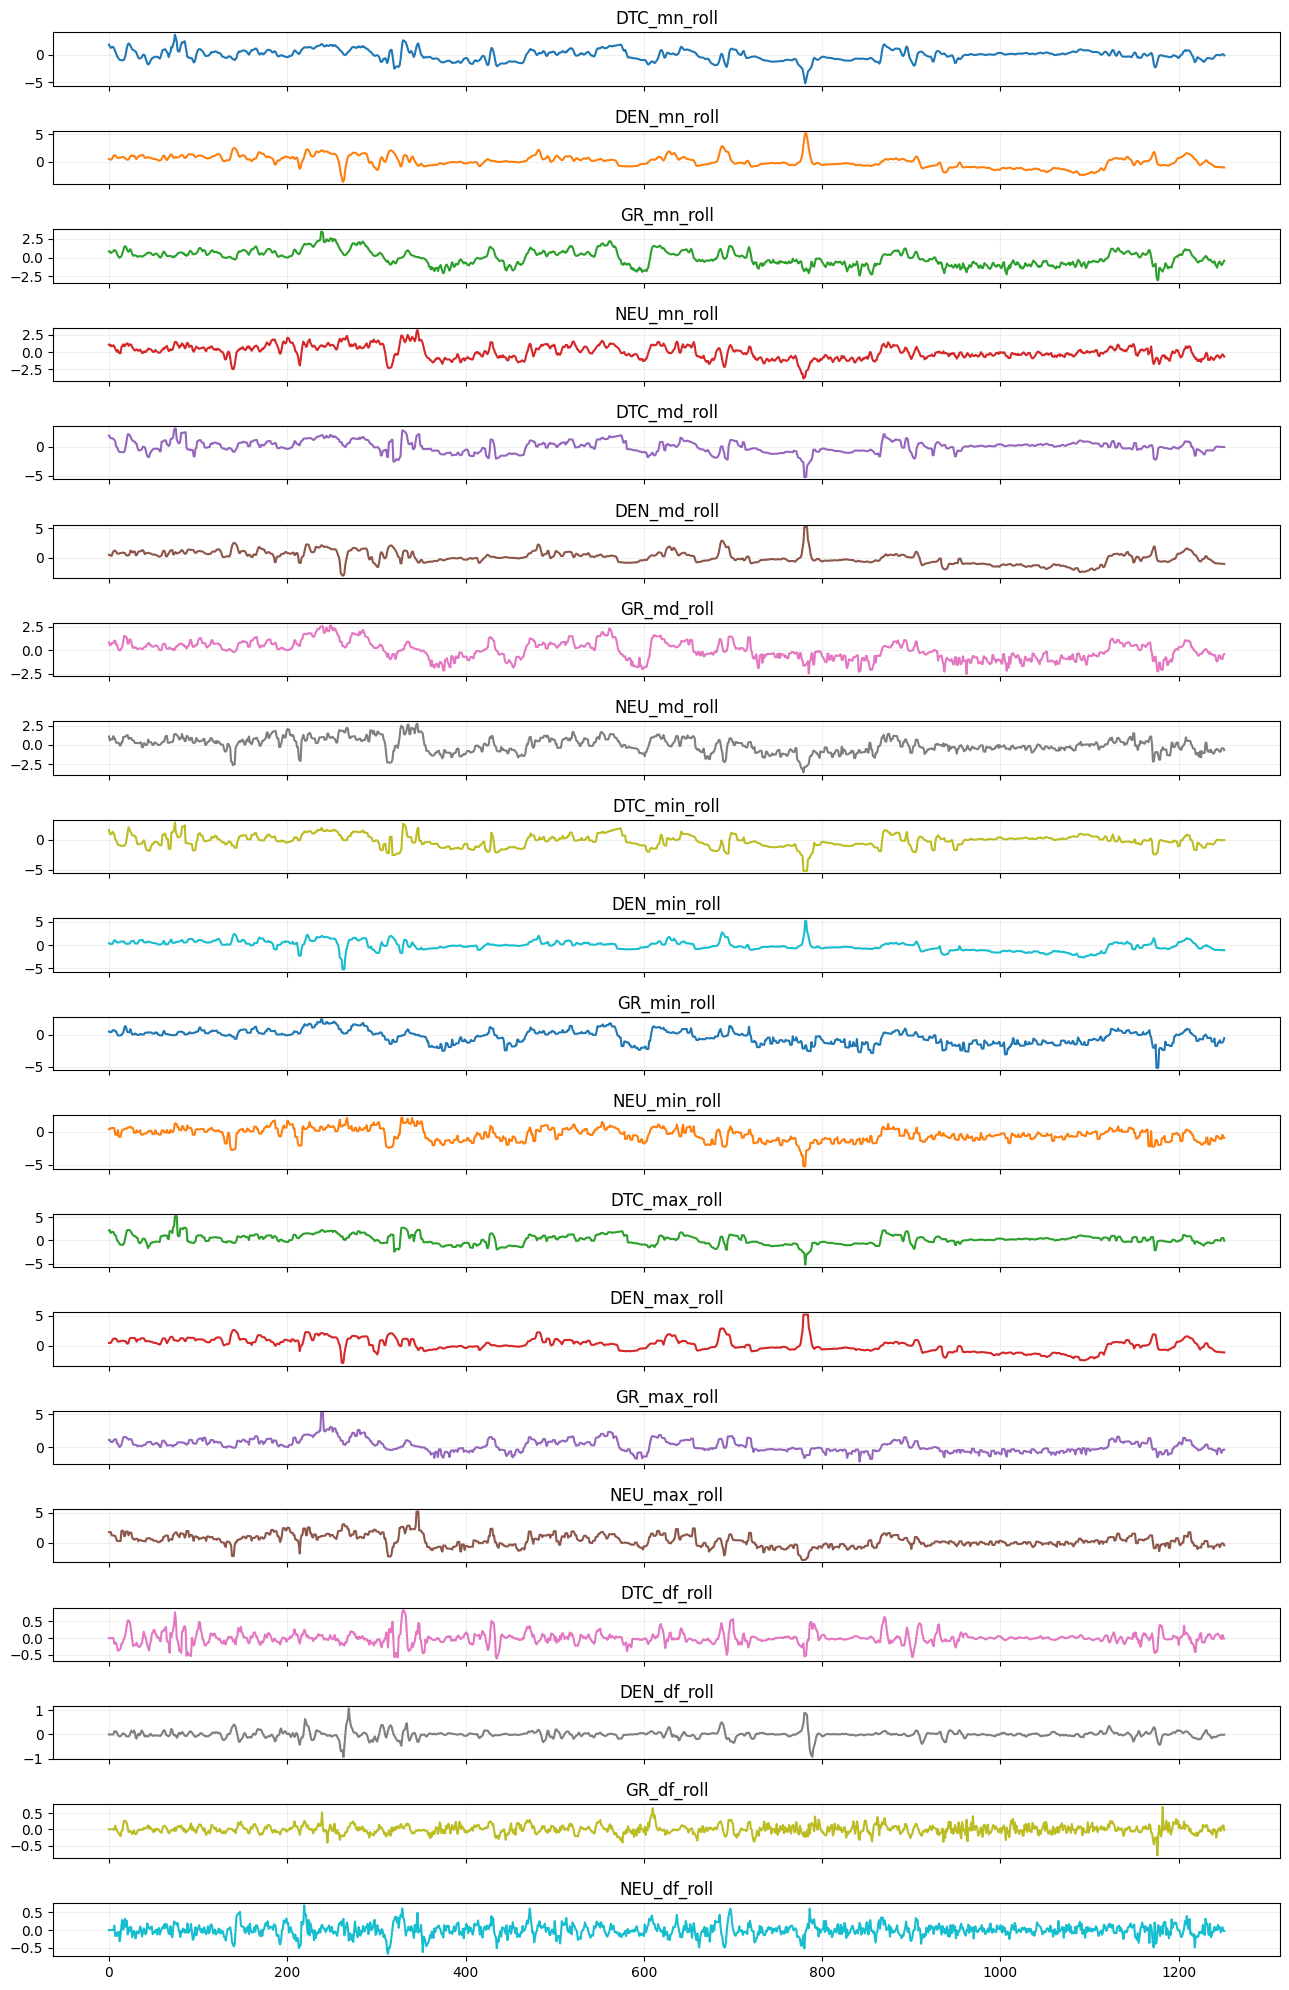

In [56]:
# plot the statistical features
fig, axs = plt.subplots(figsize=(13, feat_roll.shape[1]), nrows=feat_roll.shape[1], sharex=True)

#colors = [cm.get_cmap('gist_ncar_r', len(feat_roll.columns)+1)(n) for n in np.linspace(0,1,len(feat_roll.columns)+1)][1:]
colors = cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors
for i in range(feat_roll.shape[1]):
    axs[i].plot(feat_roll.iloc[:, i], color=colors[i])
    axs[i].set_title(feat_roll.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

#### 4.3.2 Expanding Statistics

In [57]:
# create a function for computing expanding statistics features on the train or test set
def exp_stats_func(data):
    # data: dataframe to compute expanding statistics features on
    
    mean = []
    median = []
    mini = []
    maxi = []
    diff = []
    lagf = []
    lagb = []
    
    for i, feat in enumerate(data.columns.unique()):

        mean.append(data[feat].expanding(min_periods=1).mean())
        median.append(data[feat].expanding(min_periods=1).median())
        mini.append(data[feat].expanding(min_periods=1).min())
        maxi.append(data[feat].expanding(min_periods=1).max())
        diff.append(data[feat].expanding().apply(lambda x: x.iloc[-1] - x.iloc[0]) / 
                    pd.DataFrame([data.index]).T[0].expanding().apply(lambda x: x.iloc[-1] - x.iloc[0]))
        lagf.append(data[feat].shift(periods=11))
        lagb.append(data[feat].shift(periods=-11))
            
    mean = pd.DataFrame(np.asarray(mean).T, index=data.index, columns=['{}_mn_exp'.format(i) for i in data.columns])
    median = pd.DataFrame(np.asarray(median).T, index=data.index, columns=['{}_md_exp'.format(i) for i in data.columns])
    mini = pd.DataFrame(np.asarray(mini).T, index=data.index, columns=['{}_min_exp'.format(i) for i in data.columns])
    maxi = pd.DataFrame(np.asarray(maxi).T, index=data.index, columns=['{}_max_exp'.format(i) for i in data.columns])
    diff = pd.DataFrame(np.asarray(diff).T, index=data.index, columns=['{}_df_exp'.format(i) for i in data.columns])
    diff = diff.fillna(0)
    lagf = pd.DataFrame(np.asarray(lagf).T, index=data.index, columns=['{}_lagf_exp'.format(i) for i in data.columns])
    lagf = lagf.fillna(0)
    lagb = pd.DataFrame(np.asarray(lagb).T, index=data.index, columns=['{}_lagb_exp'.format(i) for i in data.columns])
    lagb = lagb.fillna(0)
            
    stats_feat = pd.concat([mean, median, mini, maxi, diff, lagf, lagb], axis=1)
        
    return stats_feat

In [58]:
# perform statistical features computation on the train and test sets
feat_exp = exp_stats_func(data=feat_trans)

In [59]:
feat_exp.head()

DTC_mn_exp  DEN_mn_exp  GR_mn_exp  NEU_mn_exp  DTC_md_exp  DEN_md_exp  \
0    2.172065    0.418056   1.131141    0.409323    2.172065    0.418056   
1    1.887969    0.464202   0.837634    1.096037    1.887969    0.464202   
2    1.567635    0.394101   0.713488    0.922486    1.603873    0.418056   
3    1.528868    0.369458   0.737629    0.877226    1.508221    0.356792   
4    1.585009    0.443153   0.739803    0.949578    1.603873    0.418056   

   GR_md_exp  NEU_md_exp  DTC_min_exp  DEN_min_exp  ...  GR_df_exp  \
0   1.131141    0.409323     2.172065     0.418056  ...   0.000000   
1   0.837634    1.096037     1.603873     0.418056  ...  -0.587014   
2   0.544127    0.575383     0.926965     0.253899  ...  -0.332972   
3   0.677089    0.658415     0.926965     0.253899  ...  -0.107030   
4   0.748501    0.741447     0.926965     0.253899  ...  -0.095660   

   NEU_df_exp  DTC_lagf_exp  DEN_lagf_exp  GR_lagf_exp  NEU_lagf_exp  \
0    0.000000           0.0           0.0          0.0           0.0   
1    1.373428           0.0           0.0          0.0           0.0   
2    0.083030           0.0           0.0          0.0           0.0   
3    0.110708           0.0           0.0          0.0           0.0   
4    0.207415           0.0           0.0          0.0           0.0   

   DTC_lagb_exp  DEN_lagb_exp  GR_lagb_exp  NEU_lagb_exp  
0     -0.836062      0.653208    -0.079778      0.287435  
1     -0.918783      0.730935     0.029400     -0.748501  
2     -0.951893      0.777099    -0.029400     -0.072215  
3     -0.943518      0.764511     0.207242      0.309515  
4     -1.053502      0.861204     0.366106      2.006752  

[5 rows x 28 columns]

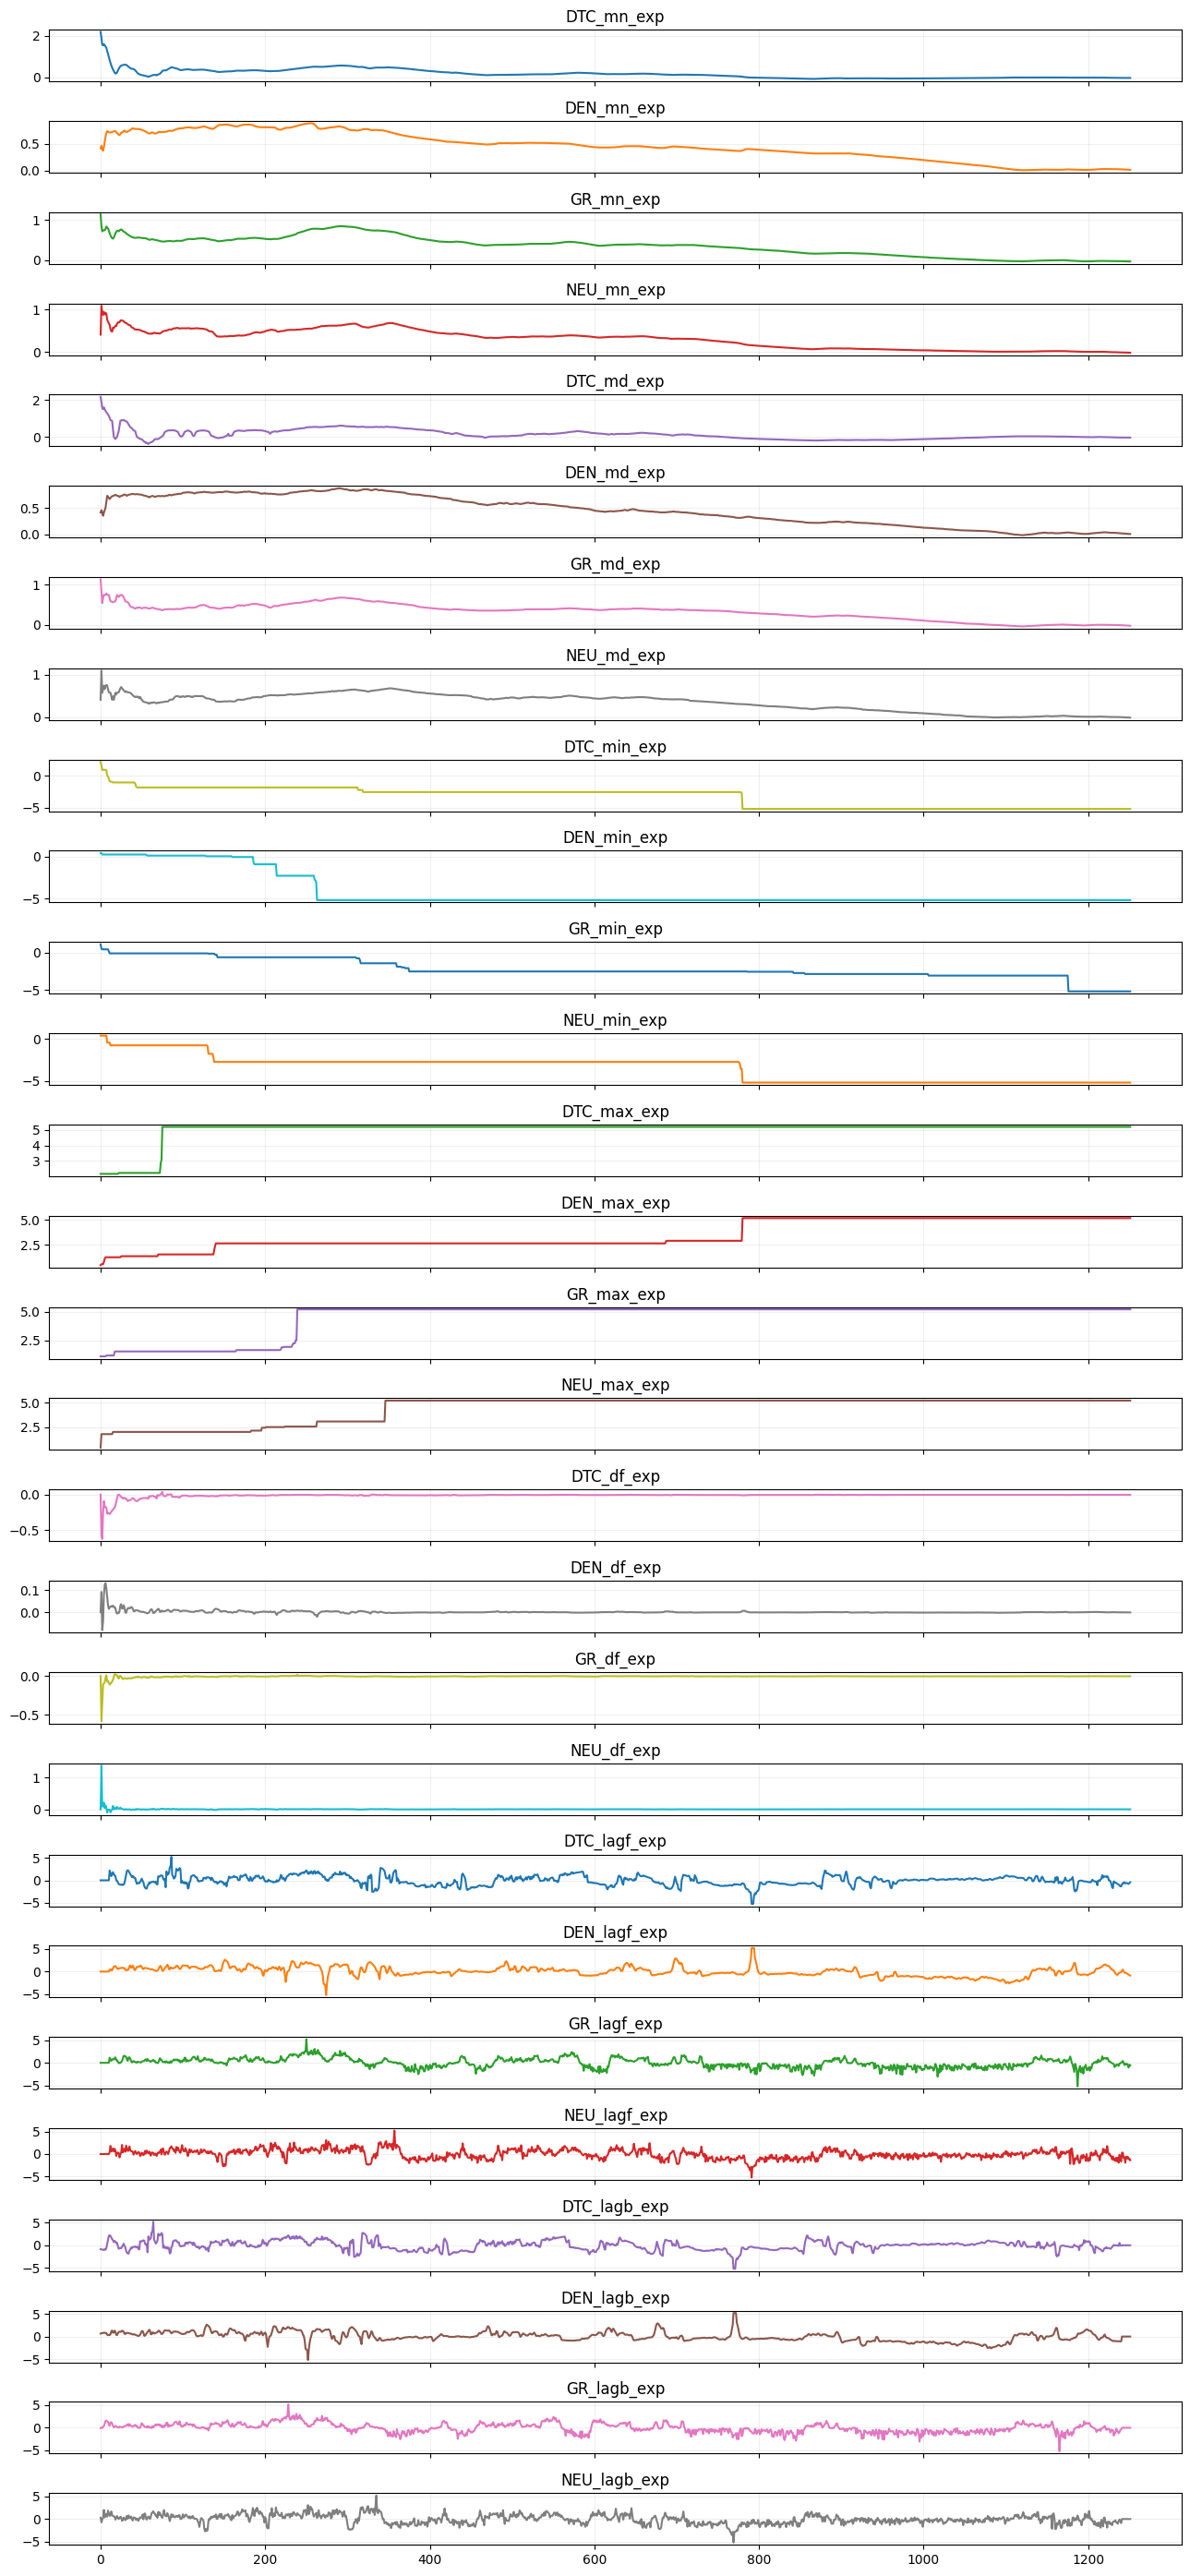

In [60]:
# plot the statistical features
fig, axs = plt.subplots(figsize=(13, feat_exp.shape[1]), nrows=feat_exp.shape[1], sharex=True)

#colors = [cm.get_cmap('gist_ncar_r', len(feat_exp.columns)+1)(n) for n in np.linspace(0,1,len(feat_exp.columns)+1)][1:]
colors = cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors
for i in range(feat_exp.shape[1]):
    axs[i].plot(feat_exp.iloc[:, i], color=colors[i])
    axs[i].set_title(feat_exp.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

### 4.4 Principal Component Analysis

In [61]:
from sklearn.decomposition import PCA

In [62]:
# split the data to train and test sets
feat_trans_train = feat_trans.iloc[X_train.index, :]
feat_trans_test = feat_trans.iloc[X_test.index, :]

In [63]:
feat_trans_train.head()

DTC       DEN        GR       NEU
458 -1.419854 -0.115163 -0.343339 -1.623523
224  1.391153  2.144624  1.757156  2.553619
509  0.843908  0.244251  1.008045  1.067571
795 -0.894598 -0.185447 -0.245628 -1.286427
519  1.199645  0.870925  1.481052  0.855410

In [64]:
feat_trans_test.head()

DTC       DEN        GR       NEU
632  0.330368  1.025974  0.528420  0.103190
859 -1.177782 -0.533827 -1.391765 -0.828630
582 -0.456966 -0.847730 -1.209969 -0.030596
456 -1.202944 -0.087534 -1.655868 -0.869140
156  0.050190  0.300417  0.355540  1.132018

In [65]:
# check pca attributes
pca_all_fit = PCA(n_components=len(feat_trans_train.columns), whiten=False, random_state=1234).fit(feat_trans_train)
pca_attributes = pd.DataFrame(np.asarray([pca_all_fit.explained_variance_ratio_, 
                                          np.cumsum(pca_all_fit.explained_variance_ratio_), 
                                          pca_all_fit.singular_values_, 
                                          np.cumsum(pca_all_fit.singular_values_)]).T, 
                              columns=['explained_variance_ratio', 'evr_cumulative', 'singular_values', 'sv_cumulative'])
pca_attributes.index = ['PC{}'.format(i) for i in range(1, len(feat_trans_train.columns)+1)]
pca_attributes

explained_variance_ratio  evr_cumulative  singular_values  sv_cumulative
PC1                  0.583321        0.583321        47.799525      47.799525
PC2                  0.249191        0.832511        31.241776      79.041301
PC3                  0.102464        0.934975        20.033424      99.074725
PC4                  0.065025        1.000000        15.959166     115.033891

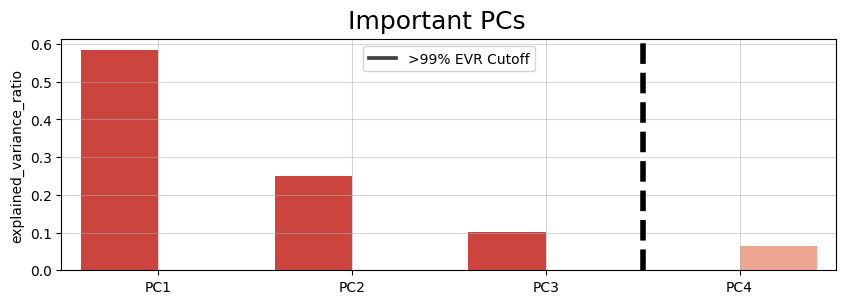

In [66]:
# select important principal components which explain >99% of the variance
fig, ax = plt.subplots(figsize=(10, 3))

pca_attributes['low_evr'] = pca_attributes.index.isin(pca_attributes[pca_attributes.evr_cumulative>0.99].index)
sns.barplot(x=pca_attributes.index, y='explained_variance_ratio', hue='low_evr', data=pca_attributes, palette='Reds_r')
ax.axvline(len(pca_attributes[pca_attributes.evr_cumulative<0.99])-0.5, 
           ymin=0, ymax=1, label='>99% EVR Cutoff', ls='--', lw=4, color='k')
ax.legend(['>99% EVR Cutoff'], loc='upper center')
ax.grid(alpha=0.5)
plt.suptitle('Important PCs', size=18)
plt.show()

In [67]:
# perform principal components extraction on the train set
pca_fit = PCA(n_components=len(pca_attributes[pca_attributes.evr_cumulative<0.99]), 
              whiten=False, random_state=1234).fit(feat_trans_train)
feat_pca_train = pca_fit.transform(feat_trans_train)
feat_pca_train = pd.DataFrame(feat_pca_train, index=feat_trans_train.index, 
                              columns=['PC{}'.format(i) for i in range(1, feat_pca_train.shape[1]+1)])

In [68]:
# create a function for performing principal components extraction on the test set
def pca_func(data, pca_fit):
    # data: dataframe to be transformed to principal components
    # pca_fit: model from the training set
    
    pcomps = pca_fit.transform(data)
    pcomps = pd.DataFrame(pcomps, index=data.index, columns=['PC{}'.format(i) for i in range(1, pcomps.shape[1]+1)])
    
    return pcomps

In [69]:
# perform principal components extraction on the test set
feat_pca_test = pca_func(data=feat_trans_test, pca_fit=pca_fit)

In [70]:
# merge the train and validation sets
feat_pca = pd.concat([feat_pca_train, feat_pca_test], axis=0)
feat_pca = feat_pca.sort_index()
feat_pca.head()

PC1       PC2       PC3
0  2.096429 -0.622581 -1.246748
1  2.242799 -0.811876  0.100176
2  1.126166 -0.332420 -0.258023
3  1.669955 -0.517890 -0.474954
4  2.254314 -0.522857 -0.458551

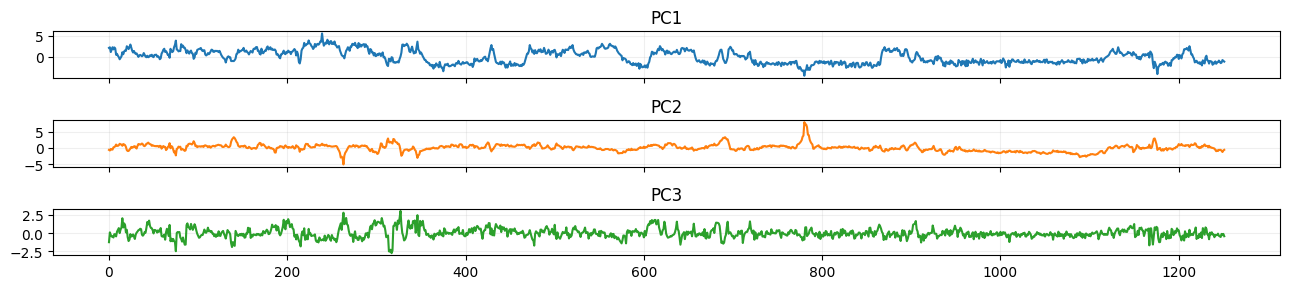

In [71]:
# plot the principal components
fig, axs = plt.subplots(figsize=(13, feat_pca.shape[1]), nrows=feat_pca.shape[1], sharex=True)

#colors = [cm.get_cmap('gist_ncar_r', len(feat_pca.columns)+1)(n) for n in np.linspace(0,1,len(feat_pca.columns)+1)][1:]
colors = cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors
for i in range(feat_pca.shape[1]):
    axs[i].plot(feat_pca.iloc[:, i], color=colors[i])
    axs[i].set_title(feat_pca.columns[i])
    axs[i].grid(alpha=0.2)
plt.tight_layout()

## 5. Dimensionality Reduction

### 5.1 Feature Selection

In [72]:
from sklearn.feature_selection import SelectFromModel

In [73]:
# merge all features
feat_all = pd.concat([feat_trans, feat_roll, feat_exp, feat_pca], axis=1)
feat_all_train = feat_all.iloc[X_train.index, :]
feat_all_test = feat_all.iloc[X_test.index, :]

In [74]:
# select from model (SFM)
sfm_est = RandomForestRegressor(random_state=1234).fit(X=feat_all_train, y=y_train)

sfm_fit = SelectFromModel(estimator=sfm_est, threshold='0.02*median', 
                          prefit=True, norm_order=2, max_features=None)
feat_sfm_train = sfm_fit.transform(X=feat_all_train)
feat_sfm_train = pd.DataFrame(feat_sfm_train, index=feat_all_train.index, 
                              columns=feat_all_train.columns[sfm_fit.get_support()==True])

In [75]:
# create a function for performing feature selection on the test set
def sfm_selection(data, sfm_fit):
    # data: dataframe to be evaluated
    # sfm_fit: model from the training set 
    feat_sfm = sfm_fit.transform(X=data)
    feat_sfm = pd.DataFrame(feat_sfm, index=data.index, 
                            columns=data.columns[sfm_fit.get_support()==True])
        
    return feat_sfm

In [76]:
# perform feature selection on the test set
feat_sfm_test = sfm_selection(data=feat_all_test, sfm_fit=sfm_fit)

In [77]:
# merge the train and test sets
feat_sfm = pd.concat([feat_sfm_train, feat_sfm_test], axis=0)
feat_sfm = feat_sfm.sort_index()
feat_sfm.head()

DTC       DEN        GR       NEU  DTC_mn_roll  DEN_mn_roll  \
0  2.172065  0.418056  1.131141  0.409323     1.887969     0.464202   
1  1.603873  0.510347  0.544127  1.782751     1.567635     0.394101   
2  0.926965  0.253899  0.465196  0.575383     1.314469     0.353258   
3  1.412569  0.295528  0.810052  0.741447     1.383035     0.429120   
4  1.809570  0.737934  0.748501  1.238983     1.500826     0.693336   

   GR_mn_roll  NEU_mn_roll  DTC_md_roll  DEN_md_roll  ...  DEN_lagf_exp  \
0    0.837634     1.096037     1.887969     0.464202  ...           0.0   
1    0.713488     0.922486     1.603873     0.418056  ...           0.0   
2    0.606458     1.033194     1.412569     0.295528  ...           0.0   
3    0.674583     0.851938     1.412569     0.295528  ...           0.0   
4    0.767841     0.855100     1.412569     0.737934  ...           0.0   

   GR_lagf_exp  NEU_lagf_exp  DTC_lagb_exp  DEN_lagb_exp  GR_lagb_exp  \
0          0.0           0.0     -0.836062      0.653208    -0.079778   
1          0.0           0.0     -0.918783      0.730935     0.029400   
2          0.0           0.0     -0.951893      0.777099    -0.029400   
3          0.0           0.0     -0.943518      0.764511     0.207242   
4          0.0           0.0     -1.053502      0.861204     0.366106   

   NEU_lagb_exp       PC1       PC2       PC3  
0      0.287435  2.096429 -0.622581 -1.246748  
1     -0.748501  2.242799 -0.811876  0.100176  
2     -0.072215  1.126166 -0.332420 -0.258023  
3      0.309515  1.669955 -0.517890 -0.474954  
4      2.006752  2.254314 -0.522857 -0.458551  

[5 rows x 53 columns]

In [78]:
# determine the sfm thresholds
sfm_thresh = SelectFromModel(estimator=RandomForestRegressor(random_state=1234), threshold='0.02*median', 
                             prefit=False, norm_order=2, max_features=None).fit(X=feat_all_train, y=y_train).threshold_

In [79]:
# obtain the sfm feature importances
sfm_imp = pd.DataFrame(sfm_fit.estimator.feature_importances_, 
                       index=feat_all_train.columns, columns=['Importance'])
sfm_imp = sfm_imp.sort_values(by='Importance', ascending=False)

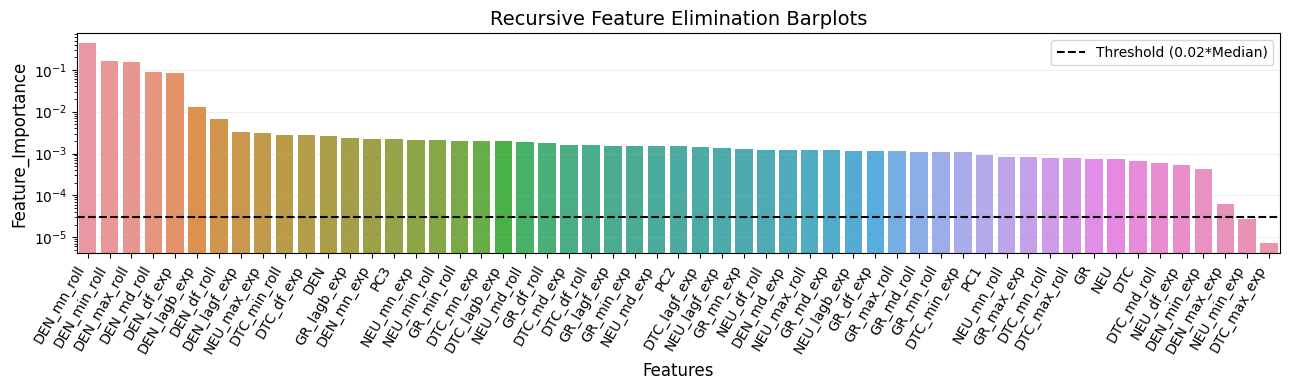

In [80]:
# plot the barplot to compare the values of the feature importances
fig, ax = plt.subplots(figsize=(13, 4))

sns.barplot(x=sfm_imp.index, y=sfm_imp['Importance'])
ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation='60')
ax.set_xlabel('Features', size=12)
ax.set_ylabel('Feature_Importance', size=12)
ax.set_yscale('log')
ax.set_title('Recursive Feature Elimination Barplots', size=14)
ax.grid(axis='y', alpha=0.2)
ax.axhline(y=sfm_thresh, ls='--', c='k', label='Threshold (0.02*Median)')
ax.legend()
plt.tight_layout()

## 6. Supervised Regression

### 6.1 Model Selection and Evaluation

In [81]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.pipeline import make_pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import learning_curve

In [82]:
# specify the train and test sets
feat_final = feat_sfm
X_train, X_test, y_train, y_test = feat_final.iloc[X_train.index, :], feat_final.iloc[X_test.index, :], y_train, y_test

In [83]:
feat_final.shape

(1252, 53)

#### 6.1.1 Cross-Validation and Hyper-Parameterization

##### 6.1.1.1 Model Training

In [84]:
# specify the names of the estimators
estimator_names = ['Linear', 'SVM', 
                   'KNN', 'Decision_Tree', 
                   'Random_Forest', 'Extra_Trees', 
                   'Adaptive_Boosting', 'Gradient_Boosting', 
                   'Histogram_GBM', 'Extreme_GBM', 
                   'Light_GBM', 'MLP']

In [85]:
# wrap the mlpregressor to make it compatible with bayessearchcv
class MLPWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, layer1=200, activation='identity', solver='lbfgs', 
                 alpha=0.0001, max_iter=70, random_state=None):
        self.layer1 = layer1
        self.activation = activation
        self.solver = solver
        self.alpha = alpha
        self.max_iter = max_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        model = MLPRegressor(hidden_layer_sizes=[self.layer1], activation=self.activation, solver=self.solver, 
                             alpha=self.alpha, max_iter=self.max_iter, random_state=self.random_state)
        model.fit(X, y)
        self.model = model
        return model
    
    def predict(self, X):
        return self.model.predict(X)
    
    def score(self, X, y):
        return self.model.score(X, y)

In [86]:
# create a function for bayesian optimization for cross-validation and hyper-parameter tuning
def model_cv_hp(X_train, y_train, X_test, y_test):
    # X_train: training features
    # y_train: training target
    # X_test: testing features
    # y_test: testing target 
    
    estimator = [LinearRegression(), SVR(), 
                 KNeighborsRegressor(), DecisionTreeRegressor(random_state=1234), 
                 RandomForestRegressor(random_state=1234), ExtraTreesRegressor(random_state=1234), 
                 AdaBoostRegressor(random_state=1234), GradientBoostingRegressor(random_state=1234), 
                 HGBRegressor(random_state=1234), XGBRegressor(random_state=1234), 
                 LGBMRegressor(random_state=1234), MLPWrapper(random_state=1234)]
    
    estimator_names = ['Linear', 'SVM', 
                       'KNN', 'Decision_Tree', 
                       'Random_Forest', 'Extra_Trees', 
                       'Adaptive_Boosting', 'Gradient_Boosting', 
                       'Histogram_GBM', 'Extreme_GBM', 
                       'Light_GBM', 'MLP']

    val_keys = (['split{}_test_score'.format(i) for i in range(3)] + 
                ['mean_test_score', 'std_test_score'])

    search_spaces = [{'linearregression__fit_intercept': Categorical([True]), 
                      'linearregression__normalize': Categorical([True])}, 
                     
                     {'svr__kernel': Categorical(['linear', 'rbf']), 
                      'svr__C': Real(1.0, 100.0), 
                      'svr__epsilon': Real(0.0001, 0.01)}, 
                     
                     {'kneighborsregressor__n_neighbors': Integer(5, 500), 
                      'kneighborsregressor__weights': Categorical(['uniform', 'distance']), 
                      'kneighborsregressor__leaf_size': Integer(10, 50)}, 
                     
                     {'decisiontreeregressor__max_depth': Integer(5, 500), 
                      'decisiontreeregressor__min_samples_split': Integer(5, 50), 
                      'decisiontreeregressor__min_samples_leaf': Integer(5, 50), 
                      'decisiontreeregressor__min_weight_fraction_leaf': Real(0.0, 0.5)}, 
                     
                     {'randomforestregressor__n_estimators': Integer(50, 500), 
                      'randomforestregressor__max_depth': Integer(5, 500), 
                      'randomforestregressor__min_samples_split': Integer(5, 50), 
                      'randomforestregressor__min_samples_leaf': Integer(5, 50), 
                      'randomforestregressor__min_weight_fraction_leaf': Real(0.0, 0.5)}, 
                     
                     {'extratreesregressor__n_estimators': Integer(50, 500), 
                      'extratreesregressor__max_depth': Integer(5, 500), 
                      'extratreesregressor__min_samples_split': Integer(5, 50), 
                      'extratreesregressor__min_samples_leaf': Integer(5, 50), 
                      'extratreesregressor__min_weight_fraction_leaf': Real(0.0, 0.5)}, 
                     
                     {'adaboostregressor__n_estimators': Integer(50, 500), 
                      'adaboostregressor__learning_rate': Real(0.001, 1.0), 
                      'adaboostregressor__loss': Categorical(['linear', 'square', 'exponential'])}, 
                     
                     {'gradientboostingregressor__n_estimators': Integer(50, 500), 
                      'gradientboostingregressor__max_depth': Integer(5, 500), 
                      'gradientboostingregressor__min_samples_split': Integer(5, 50), 
                      'gradientboostingregressor__learning_rate': Real(0.001, 1.0), 
                      'gradientboostingregressor__min_samples_leaf': Integer(5, 50), 
                      'gradientboostingregressor__min_weight_fraction_leaf': Real(0.0, 0.5)}, 
                     
                     {'histgradientboostingregressor__max_iter': Integer(50, 500), 
                      'histgradientboostingregressor__max_depth': Integer(5, 500), 
                      'histgradientboostingregressor__learning_rate': Real(0.001, 1.0), 
                      'histgradientboostingregressor__min_samples_leaf': Integer(5, 50)}, 
                     
                     {'xgbregressor__n_estimators': Integer(50, 500), 
                      'xgbregressor__max_depth': Integer(5, 500), 
                      'xgbregressor__learning_rate': Real(0.001, 1.0), 
                      'xgbregressor__min_child_weight': Real(0.0, 1.0)}, 

                     {'lgbmregressor__n_estimators': Integer(50, 500), 
                      'lgbmregressor__max_depth': Integer(5, 500), 
                      'lgbmregressor__learning_rate': Real(0.001, 1.0), 
                      'lgbmregressor__min_child_samples': Integer(5, 50), 
                      'lgbmregressor__min_child_weight': Real(0.0, 1.0)}, 
                     
                     {'mlpwrapper__layer1': Integer(50, 200), 
                      'mlpwrapper__activation': Categorical(['identity']), 
                      'mlpwrapper__solver': Categorical(['lbfgs']), 
                      'mlpwrapper__alpha': Real(0.00005, 0.0005), 
                      'mlpwrapper__max_iter': Integer(50, 200)}]

    optimizer_kwargs = {'base_estimator': 'RF'}

    #def early_stop(best_result):
        #score = model_cv_hp.best_score_
        #if score >= 0.98:
            #print('Early Stop!')
            #return True

    scrs_fit = []
    scrs_val = [[] for est in estimator]
    scrs_test = [[] for est in estimator]
    ests = [est for est in estimator]
    best_fit = [est for est in estimator]

    for i in range(len(estimator)):
        print()
        print('*******{} estimator cross-validation/hyper-parameterization******* \n'.format(estimator_names[i]))
        start_time = time.time()
        ests[i] = make_pipeline(estimator[i])
        cv_hp = BayesSearchCV(estimator=ests[i], search_spaces=search_spaces[i], n_iter=50, 
                              optimizer_kwargs=optimizer_kwargs, scoring='neg_root_mean_squared_error', 
                              n_points=1, refit=True, cv=3, verbose=2, random_state=1234)
        scrs_fit.append(cv_hp.fit(X=X_train.values, y=y_train.values))
        scrs_test[i].append(scrs_fit[i].score(X=X_test.values, y=y_test.values))

        for key in val_keys:
            scrs_val[i].append(scrs_fit[i].cv_results_[key][scrs_fit[i].best_index_])
            
        best_fit[i] = scrs_fit[i].best_estimator_

        end_time = time.time()
        print(f'Training time: {end_time - start_time} seconds')
    
    scrs_val_df = pd.DataFrame(scrs_val, index=estimator_names, 
                               columns=val_keys[:3]+['mean_val_score', 'std_val_score'])
    scrs_val_df.iloc[:, :-1] = scrs_val_df.iloc[:, :-1]*-1
    scrs_test_df = pd.DataFrame(scrs_test, index=estimator_names, 
                                columns=['test_score'])
    scrs_test_df = scrs_test_df*-1
    scrs_df = pd.concat([scrs_val_df, scrs_test_df], axis=1)
    
    return scrs_fit, best_fit, scrs_df

In [87]:
# cross-validation and hyper-parameterization
scrs_fit, best_fit, cv_scrs_df = model_cv_hp(X_train=X_train, y_train=y_train, 
                                             X_test=X_test, y_test=y_test)


*******Linear estimator cross-validation/hyper-parameterization******* 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, li

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregressi

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregression__fit_intercept=True, linearregression__normalize=True; total time=   0.0s
[CV] END linearregressi

[CV] END svr__C=10.456505242813295, svr__epsilon=0.00913080217368248, svr__kernel=rbf; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END svr__C=6.207782336380578, svr__epsilon=0.009596543032411522, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=6.207782336380578, svr__epsilon=0.009596543032411522, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=6.207782336380578, svr__epsilon=0.009596543032411522, svr__kernel=rbf; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END svr__C=10.329759722368715, svr__epsilon=0.009905431505311327, svr__kernel=linear; total time=  13.1s
[CV] END svr__C=10.329759722368715, svr__epsilon=0.009905431505311327, svr__kernel=linear; total time=  14.0s
[CV] END svr__C=10.329759722368715, svr__epsilon=0.009905431505311327, svr__kernel=linear; total time=  13.8s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END svr__C=13.998544101064024, svr__epsilon=0.003130455949639095

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END svr__C=1.0145123790236272, svr__epsilon=0.009520168704553866, svr__kernel=linear; total time=   1.6s
[CV] END svr__C=1.0145123790236272, svr__epsilon=0.009520168704553866, svr__kernel=linear; total time=   1.6s
[CV] END svr__C=1.0145123790236272, svr__epsilon=0.009520168704553866, svr__kernel=linear; total time=   2.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END svr__C=2.5724635759467347, svr__epsilon=0.0018716152020141106, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=2.5724635759467347, svr__epsilon=0.0018716152020141106, svr__kernel=rbf; total time=   0.1s
[CV] END svr__C=2.5724635759467347, svr__epsilon=0.0018716152020141106, svr__kernel=rbf; total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END svr__C=2.5891438736857655, svr__epsilon=0.002880182159112345, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=2.5891438736857655, svr__epsilon=0.00288018215

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=35, kneighborsregressor__n_neighbors=77, kneighborsregressor__weights=uniform; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=35, kneighborsregressor__n_neighbors=77, kneighborsregressor__weights=uniform; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=35, kneighborsregressor__n_neighbors=77, kneighborsregressor__weights=uniform; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=36, kneighborsregressor__n_neighbors=205, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=36, kneighborsregressor__n_neighbors=205, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=36, kneighborsregressor__n_neighbors=205, kneighborsregressor__weights=distance; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totall

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=11, kneighborsregressor__n_neighbors=11, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=11, kneighborsregressor__n_neighbors=11, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=11, kneighborsregressor__n_neighbors=11, kneighborsregressor__weights=distance; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=10, kneighborsregressor__n_neighbors=28, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=10, kneighborsregressor__n_neighbors=28, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=10, kneighborsregressor__n_neighbors=28, kneighborsregressor__weights=distance; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totall

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=42, kneighborsregressor__n_neighbors=412, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=42, kneighborsregressor__n_neighbors=412, kneighborsregressor__weights=distance; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=42, kneighborsregressor__n_neighbors=412, kneighborsregressor__weights=distance; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END kneighborsregressor__leaf_size=10, kneighborsregressor__n_neighbors=36, kneighborsregressor__weights=uniform; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=10, kneighborsregressor__n_neighbors=36, kneighborsregressor__weights=uniform; total time=   0.0s
[CV] END kneighborsregressor__leaf_size=10, kneighborsregressor__n_neighbors=36, kneighborsregressor__weights=uniform; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totall

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=94, decisiontreeregressor__min_samples_leaf=13, decisiontreeregressor__min_samples_split=32, decisiontreeregressor__min_weight_fraction_leaf=0.27833545262691883; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=94, decisiontreeregressor__min_samples_leaf=13, decisiontreeregressor__min_samples_split=32, decisiontreeregressor__min_weight_fraction_leaf=0.27833545262691883; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=94, decisiontreeregressor__min_samples_leaf=13, decisiontreeregressor__min_samples_split=32, decisiontreeregressor__min_weight_fraction_leaf=0.27833545262691883; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=334, decisiontreeregressor__min_samples_leaf=22, decisiontreeregressor__min_samples_split=30, decisiontreeregressor__min_weight_fraction_leaf=0.16978402880890106; total ti

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=72, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=10, decisiontreeregressor__min_weight_fraction_leaf=0.08906130302188488; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=72, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=10, decisiontreeregressor__min_weight_fraction_leaf=0.08906130302188488; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=72, decisiontreeregressor__min_samples_leaf=8, decisiontreeregressor__min_samples_split=10, decisiontreeregressor__min_weight_fraction_leaf=0.08906130302188488; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=67, decisiontreeregressor__min_samples_leaf=37, decisiontreeregressor__min_samples_split=32, decisiontreeregressor__min_weight_fraction_leaf=0.23517042446149855; total time= 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=78, decisiontreeregressor__min_samples_leaf=39, decisiontreeregressor__min_samples_split=40, decisiontreeregressor__min_weight_fraction_leaf=0.023791222995816493; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=78, decisiontreeregressor__min_samples_leaf=39, decisiontreeregressor__min_samples_split=40, decisiontreeregressor__min_weight_fraction_leaf=0.023791222995816493; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=78, decisiontreeregressor__min_samples_leaf=39, decisiontreeregressor__min_samples_split=40, decisiontreeregressor__min_weight_fraction_leaf=0.023791222995816493; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=390, decisiontreeregressor__min_samples_leaf=46, decisiontreeregressor__min_samples_split=5, decisiontreeregressor__min_weight_fraction_leaf=0.25760504243591814; total 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=381, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5, decisiontreeregressor__min_weight_fraction_leaf=0.016953390012282247; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=381, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5, decisiontreeregressor__min_weight_fraction_leaf=0.016953390012282247; total time=   0.0s
[CV] END decisiontreeregressor__max_depth=381, decisiontreeregressor__min_samples_leaf=12, decisiontreeregressor__min_samples_split=5, decisiontreeregressor__min_weight_fraction_leaf=0.016953390012282247; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END decisiontreeregressor__max_depth=339, decisiontreeregressor__min_samples_leaf=37, decisiontreeregressor__min_samples_split=22, decisiontreeregressor__min_weight_fraction_leaf=0.09399313930782141; total

[CV] END randomforestregressor__max_depth=126, randomforestregressor__min_samples_leaf=13, randomforestregressor__min_samples_split=30, randomforestregressor__min_weight_fraction_leaf=0.1247743201110654, randomforestregressor__n_estimators=198; total time=   1.2s
[CV] END randomforestregressor__max_depth=126, randomforestregressor__min_samples_leaf=13, randomforestregressor__min_samples_split=30, randomforestregressor__min_weight_fraction_leaf=0.1247743201110654, randomforestregressor__n_estimators=198; total time=   1.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=82, randomforestregressor__min_samples_leaf=36, randomforestregressor__min_samples_split=36, randomforestregressor__min_weight_fraction_leaf=0.2126486164797176, randomforestregressor__n_estimators=360; total time=   1.7s
[CV] END randomforestregressor__max_depth=82, randomforestregressor__min_samples_leaf=36, randomforestregressor__min_samples_split=36, randomforestreg

[CV] END randomforestregressor__max_depth=344, randomforestregressor__min_samples_leaf=39, randomforestregressor__min_samples_split=10, randomforestregressor__min_weight_fraction_leaf=0.23000179094519713, randomforestregressor__n_estimators=167; total time=   0.7s
[CV] END randomforestregressor__max_depth=344, randomforestregressor__min_samples_leaf=39, randomforestregressor__min_samples_split=10, randomforestregressor__min_weight_fraction_leaf=0.23000179094519713, randomforestregressor__n_estimators=167; total time=   0.7s
[CV] END randomforestregressor__max_depth=344, randomforestregressor__min_samples_leaf=39, randomforestregressor__min_samples_split=10, randomforestregressor__min_weight_fraction_leaf=0.23000179094519713, randomforestregressor__n_estimators=167; total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=263, randomforestregressor__min_samples_leaf=18, randomforestregressor__min_samples_split=10, randomfore

[CV] END randomforestregressor__max_depth=218, randomforestregressor__min_samples_leaf=15, randomforestregressor__min_samples_split=13, randomforestregressor__min_weight_fraction_leaf=0.10293448834214194, randomforestregressor__n_estimators=270; total time=   1.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=106, randomforestregressor__min_samples_leaf=29, randomforestregressor__min_samples_split=39, randomforestregressor__min_weight_fraction_leaf=0.22181238279795046, randomforestregressor__n_estimators=424; total time=   2.0s
[CV] END randomforestregressor__max_depth=106, randomforestregressor__min_samples_leaf=29, randomforestregressor__min_samples_split=39, randomforestregressor__min_weight_fraction_leaf=0.22181238279795046, randomforestregressor__n_estimators=424; total time=   2.0s
[CV] END randomforestregressor__max_depth=106, randomforestregressor__min_samples_leaf=29, randomforestregressor__min_samples_split=39, randomfore

[CV] END randomforestregressor__max_depth=376, randomforestregressor__min_samples_leaf=6, randomforestregressor__min_samples_split=31, randomforestregressor__min_weight_fraction_leaf=0.042130601318662426, randomforestregressor__n_estimators=250; total time=   2.1s
[CV] END randomforestregressor__max_depth=376, randomforestregressor__min_samples_leaf=6, randomforestregressor__min_samples_split=31, randomforestregressor__min_weight_fraction_leaf=0.042130601318662426, randomforestregressor__n_estimators=250; total time=   2.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=488, randomforestregressor__min_samples_leaf=19, randomforestregressor__min_samples_split=18, randomforestregressor__min_weight_fraction_leaf=0.0047515087589642966, randomforestregressor__n_estimators=406; total time=   3.3s
[CV] END randomforestregressor__max_depth=488, randomforestregressor__min_samples_leaf=19, randomforestregressor__min_samples_split=18, randomfo

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=432, randomforestregressor__min_samples_leaf=42, randomforestregressor__min_samples_split=6, randomforestregressor__min_weight_fraction_leaf=0.011844285292422155, randomforestregressor__n_estimators=213; total time=   1.2s
[CV] END randomforestregressor__max_depth=432, randomforestregressor__min_samples_leaf=42, randomforestregressor__min_samples_split=6, randomforestregressor__min_weight_fraction_leaf=0.011844285292422155, randomforestregressor__n_estimators=213; total time=   1.2s
[CV] END randomforestregressor__max_depth=432, randomforestregressor__min_samples_leaf=42, randomforestregressor__min_samples_split=6, randomforestregressor__min_weight_fraction_leaf=0.011844285292422155, randomforestregressor__n_estimators=213; total time=   1.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END randomforestregressor__max_depth=124, randomforestregressor__min_samples_leaf=

[CV] END extratreesregressor__max_depth=112, extratreesregressor__min_samples_leaf=34, extratreesregressor__min_samples_split=21, extratreesregressor__min_weight_fraction_leaf=0.37755409427708375, extratreesregressor__n_estimators=291; total time=   0.3s
[CV] END extratreesregressor__max_depth=112, extratreesregressor__min_samples_leaf=34, extratreesregressor__min_samples_split=21, extratreesregressor__min_weight_fraction_leaf=0.37755409427708375, extratreesregressor__n_estimators=291; total time=   0.3s
[CV] END extratreesregressor__max_depth=112, extratreesregressor__min_samples_leaf=34, extratreesregressor__min_samples_split=21, extratreesregressor__min_weight_fraction_leaf=0.37755409427708375, extratreesregressor__n_estimators=291; total time=   0.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END extratreesregressor__max_depth=126, extratreesregressor__min_samples_leaf=13, extratreesregressor__min_samples_split=30, extratreesregressor__min_weight_fraction_leaf=

[CV] END extratreesregressor__max_depth=481, extratreesregressor__min_samples_leaf=18, extratreesregressor__min_samples_split=27, extratreesregressor__min_weight_fraction_leaf=0.2171845379858104, extratreesregressor__n_estimators=55; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END extratreesregressor__max_depth=132, extratreesregressor__min_samples_leaf=32, extratreesregressor__min_samples_split=33, extratreesregressor__min_weight_fraction_leaf=0.22658611804773782, extratreesregressor__n_estimators=89; total time=   0.0s
[CV] END extratreesregressor__max_depth=132, extratreesregressor__min_samples_leaf=32, extratreesregressor__min_samples_split=33, extratreesregressor__min_weight_fraction_leaf=0.22658611804773782, extratreesregressor__n_estimators=89; total time=   0.0s
[CV] END extratreesregressor__max_depth=132, extratreesregressor__min_samples_leaf=32, extratreesregressor__min_samples_split=33, extratreesregressor__min_weight_fraction_leaf=0.22

[CV] END extratreesregressor__max_depth=329, extratreesregressor__min_samples_leaf=43, extratreesregressor__min_samples_split=23, extratreesregressor__min_weight_fraction_leaf=0.30245853990964133, extratreesregressor__n_estimators=330; total time=   0.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END extratreesregressor__max_depth=219, extratreesregressor__min_samples_leaf=8, extratreesregressor__min_samples_split=23, extratreesregressor__min_weight_fraction_leaf=0.1512468454522561, extratreesregressor__n_estimators=116; total time=   0.1s
[CV] END extratreesregressor__max_depth=219, extratreesregressor__min_samples_leaf=8, extratreesregressor__min_samples_split=23, extratreesregressor__min_weight_fraction_leaf=0.1512468454522561, extratreesregressor__n_estimators=116; total time=   0.1s
[CV] END extratreesregressor__max_depth=219, extratreesregressor__min_samples_leaf=8, extratreesregressor__min_samples_split=23, extratreesregressor__min_weight_fraction_leaf=0.151

[CV] END extratreesregressor__max_depth=364, extratreesregressor__min_samples_leaf=37, extratreesregressor__min_samples_split=45, extratreesregressor__min_weight_fraction_leaf=0.13410633360948512, extratreesregressor__n_estimators=449; total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END extratreesregressor__max_depth=296, extratreesregressor__min_samples_leaf=34, extratreesregressor__min_samples_split=34, extratreesregressor__min_weight_fraction_leaf=0.017720552509592428, extratreesregressor__n_estimators=216; total time=   0.4s
[CV] END extratreesregressor__max_depth=296, extratreesregressor__min_samples_leaf=34, extratreesregressor__min_samples_split=34, extratreesregressor__min_weight_fraction_leaf=0.017720552509592428, extratreesregressor__n_estimators=216; total time=   0.4s
[CV] END extratreesregressor__max_depth=296, extratreesregressor__min_samples_leaf=34, extratreesregressor__min_samples_split=34, extratreesregressor__min_weight_fraction_lea

[CV] END extratreesregressor__max_depth=387, extratreesregressor__min_samples_leaf=42, extratreesregressor__min_samples_split=17, extratreesregressor__min_weight_fraction_leaf=0.1433562553343292, extratreesregressor__n_estimators=159; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END extratreesregressor__max_depth=411, extratreesregressor__min_samples_leaf=42, extratreesregressor__min_samples_split=44, extratreesregressor__min_weight_fraction_leaf=0.01078655281217661, extratreesregressor__n_estimators=250; total time=   0.5s
[CV] END extratreesregressor__max_depth=411, extratreesregressor__min_samples_leaf=42, extratreesregressor__min_samples_split=44, extratreesregressor__min_weight_fraction_leaf=0.01078655281217661, extratreesregressor__n_estimators=250; total time=   0.4s
[CV] END extratreesregressor__max_depth=411, extratreesregressor__min_samples_leaf=42, extratreesregressor__min_samples_split=44, extratreesregressor__min_weight_fraction_leaf=0

[CV] END adaboostregressor__learning_rate=0.45374248653682625, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=252; total time=   1.5s
[CV] END adaboostregressor__learning_rate=0.45374248653682625, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=252; total time=   1.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.21912424084109977, adaboostregressor__loss=linear, adaboostregressor__n_estimators=187; total time=   1.3s
[CV] END adaboostregressor__learning_rate=0.21912424084109977, adaboostregressor__loss=linear, adaboostregressor__n_estimators=187; total time=   1.3s
[CV] END adaboostregressor__learning_rate=0.21912424084109977, adaboostregressor__loss=linear, adaboostregressor__n_estimators=187; total time=   1.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.1373880527176784, adaboostregressor__loss=linear, adaboostregressor__n_es

[CV] END adaboostregressor__learning_rate=0.07420730081232592, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=237; total time=   1.9s
[CV] END adaboostregressor__learning_rate=0.07420730081232592, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=237; total time=   2.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.05664131093985173, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=274; total time=   2.3s
[CV] END adaboostregressor__learning_rate=0.05664131093985173, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=274; total time=   2.2s
[CV] END adaboostregressor__learning_rate=0.05664131093985173, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=274; total time=   2.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.06854575937928147, adaboostregressor__loss=linear, adaboos

[CV] END adaboostregressor__learning_rate=0.03597952656482413, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=242; total time=   2.2s
[CV] END adaboostregressor__learning_rate=0.03597952656482413, adaboostregressor__loss=exponential, adaboostregressor__n_estimators=242; total time=   2.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.5312131925150022, adaboostregressor__loss=linear, adaboostregressor__n_estimators=97; total time=   0.6s
[CV] END adaboostregressor__learning_rate=0.5312131925150022, adaboostregressor__loss=linear, adaboostregressor__n_estimators=97; total time=   0.7s
[CV] END adaboostregressor__learning_rate=0.5312131925150022, adaboostregressor__loss=linear, adaboostregressor__n_estimators=97; total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END adaboostregressor__learning_rate=0.036421736890441335, adaboostregressor__loss=exponential, adaboostregressor__n_e

[CV] END gradientboostingregressor__learning_rate=0.3049286634294897, gradientboostingregressor__max_depth=191, gradientboostingregressor__min_samples_leaf=47, gradientboostingregressor__min_samples_split=22, gradientboostingregressor__min_weight_fraction_leaf=0.11677809107050277, gradientboostingregressor__n_estimators=155; total time=   1.4s
[CV] END gradientboostingregressor__learning_rate=0.3049286634294897, gradientboostingregressor__max_depth=191, gradientboostingregressor__min_samples_leaf=47, gradientboostingregressor__min_samples_split=22, gradientboostingregressor__min_weight_fraction_leaf=0.11677809107050277, gradientboostingregressor__n_estimators=155; total time=   1.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.8730162923662121, gradientboostingregressor__max_depth=432, gradientboostingregressor__min_samples_leaf=38, gradientboostingregressor__min_samples_split=7, gradientboostingregressor__min_weight_fra

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.30115598829959545, gradientboostingregressor__max_depth=227, gradientboostingregressor__min_samples_leaf=10, gradientboostingregressor__min_samples_split=48, gradientboostingregressor__min_weight_fraction_leaf=0.14471197446940406, gradientboostingregressor__n_estimators=184; total time=   1.5s
[CV] END gradientboostingregressor__learning_rate=0.30115598829959545, gradientboostingregressor__max_depth=227, gradientboostingregressor__min_samples_leaf=10, gradientboostingregressor__min_samples_split=48, gradientboostingregressor__min_weight_fraction_leaf=0.14471197446940406, gradientboostingregressor__n_estimators=184; total time=   1.5s
[CV] END gradientboostingregressor__learning_rate=0.30115598829959545, gradientboostingregressor__max_depth=227, gradientboostingregressor__min_samples_leaf=10, gradientboostingregressor__min_samples_split=48, gradientboostingregressor__min_weight

[CV] END gradientboostingregressor__learning_rate=0.451725807529964, gradientboostingregressor__max_depth=74, gradientboostingregressor__min_samples_leaf=20, gradientboostingregressor__min_samples_split=45, gradientboostingregressor__min_weight_fraction_leaf=0.1700022576196006, gradientboostingregressor__n_estimators=474; total time=   3.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.9328852866105803, gradientboostingregressor__max_depth=306, gradientboostingregressor__min_samples_leaf=31, gradientboostingregressor__min_samples_split=18, gradientboostingregressor__min_weight_fraction_leaf=0.2989321657366291, gradientboostingregressor__n_estimators=60; total time=   0.1s
[CV] END gradientboostingregressor__learning_rate=0.9328852866105803, gradientboostingregressor__max_depth=306, gradientboostingregressor__min_samples_leaf=31, gradientboostingregressor__min_samples_split=18, gradientboostingregressor__min_weight_fractio

[CV] END gradientboostingregressor__learning_rate=0.13902864210710894, gradientboostingregressor__max_depth=356, gradientboostingregressor__min_samples_leaf=14, gradientboostingregressor__min_samples_split=6, gradientboostingregressor__min_weight_fraction_leaf=0.32806331103823955, gradientboostingregressor__n_estimators=64; total time=   0.2s
[CV] END gradientboostingregressor__learning_rate=0.13902864210710894, gradientboostingregressor__max_depth=356, gradientboostingregressor__min_samples_leaf=14, gradientboostingregressor__min_samples_split=6, gradientboostingregressor__min_weight_fraction_leaf=0.32806331103823955, gradientboostingregressor__n_estimators=64; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.02882503862218416, gradientboostingregressor__max_depth=439, gradientboostingregressor__min_samples_leaf=5, gradientboostingregressor__min_samples_split=21, gradientboostingregressor__min_weight_frac

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.7672141716550244, gradientboostingregressor__max_depth=460, gradientboostingregressor__min_samples_leaf=6, gradientboostingregressor__min_samples_split=26, gradientboostingregressor__min_weight_fraction_leaf=0.3178508615582125, gradientboostingregressor__n_estimators=175; total time=   0.6s
[CV] END gradientboostingregressor__learning_rate=0.7672141716550244, gradientboostingregressor__max_depth=460, gradientboostingregressor__min_samples_leaf=6, gradientboostingregressor__min_samples_split=26, gradientboostingregressor__min_weight_fraction_leaf=0.3178508615582125, gradientboostingregressor__n_estimators=175; total time=   0.6s
[CV] END gradientboostingregressor__learning_rate=0.7672141716550244, gradientboostingregressor__max_depth=460, gradientboostingregressor__min_samples_leaf=6, gradientboostingregressor__min_samples_split=26, gradientboostingregressor__min_weight_fractio

[CV] END gradientboostingregressor__learning_rate=0.008844476243262876, gradientboostingregressor__max_depth=245, gradientboostingregressor__min_samples_leaf=23, gradientboostingregressor__min_samples_split=32, gradientboostingregressor__min_weight_fraction_leaf=0.24063200770556958, gradientboostingregressor__n_estimators=138; total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.03839848184623092, gradientboostingregressor__max_depth=453, gradientboostingregressor__min_samples_leaf=10, gradientboostingregressor__min_samples_split=45, gradientboostingregressor__min_weight_fraction_leaf=0.07837379975703525, gradientboostingregressor__n_estimators=431; total time=   5.5s
[CV] END gradientboostingregressor__learning_rate=0.03839848184623092, gradientboostingregressor__max_depth=453, gradientboostingregressor__min_samples_leaf=10, gradientboostingregressor__min_samples_split=45, gradientboostingregressor__min_weigh

[CV] END gradientboostingregressor__learning_rate=0.010384543495828406, gradientboostingregressor__max_depth=395, gradientboostingregressor__min_samples_leaf=27, gradientboostingregressor__min_samples_split=18, gradientboostingregressor__min_weight_fraction_leaf=0.21516213752951718, gradientboostingregressor__n_estimators=171; total time=   1.0s
[CV] END gradientboostingregressor__learning_rate=0.010384543495828406, gradientboostingregressor__max_depth=395, gradientboostingregressor__min_samples_leaf=27, gradientboostingregressor__min_samples_split=18, gradientboostingregressor__min_weight_fraction_leaf=0.21516213752951718, gradientboostingregressor__n_estimators=171; total time=   0.9s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END gradientboostingregressor__learning_rate=0.015560935557403743, gradientboostingregressor__max_depth=314, gradientboostingregressor__min_samples_leaf=15, gradientboostingregressor__min_samples_split=21, gradientboostingregressor__min_wei

[CV] END histgradientboostingregressor__learning_rate=0.21912424084109977, histgradientboostingregressor__max_depth=353, histgradientboostingregressor__max_iter=492, histgradientboostingregressor__min_samples_leaf=14; total time=  10.5s
[CV] END histgradientboostingregressor__learning_rate=0.21912424084109977, histgradientboostingregressor__max_depth=353, histgradientboostingregressor__max_iter=492, histgradientboostingregressor__min_samples_leaf=14; total time=  10.4s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.1373880527176784, histgradientboostingregressor__max_depth=224, histgradientboostingregressor__max_iter=54, histgradientboostingregressor__min_samples_leaf=45; total time=   0.4s
[CV] END histgradientboostingregressor__learning_rate=0.1373880527176784, histgradientboostingregressor__max_depth=224, histgradientboostingregressor__max_iter=54, histgradientboostingregressor__min_samples_leaf=45; total time=   0.

[CV] END histgradientboostingregressor__learning_rate=0.784613319190213, histgradientboostingregressor__max_depth=313, histgradientboostingregressor__max_iter=256, histgradientboostingregressor__min_samples_leaf=5; total time=   5.8s
[CV] END histgradientboostingregressor__learning_rate=0.784613319190213, histgradientboostingregressor__max_depth=313, histgradientboostingregressor__max_iter=256, histgradientboostingregressor__min_samples_leaf=5; total time=   5.9s
[CV] END histgradientboostingregressor__learning_rate=0.784613319190213, histgradientboostingregressor__max_depth=313, histgradientboostingregressor__max_iter=256, histgradientboostingregressor__min_samples_leaf=5; total time=   6.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.04384250627160817, histgradientboostingregressor__max_depth=170, histgradientboostingregressor__max_iter=328, histgradientboostingregressor__min_samples_leaf=11; total time=   7.0s
[C

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.6501753435581534, histgradientboostingregressor__max_depth=439, histgradientboostingregressor__max_iter=132, histgradientboostingregressor__min_samples_leaf=7; total time=   2.8s
[CV] END histgradientboostingregressor__learning_rate=0.6501753435581534, histgradientboostingregressor__max_depth=439, histgradientboostingregressor__max_iter=132, histgradientboostingregressor__min_samples_leaf=7; total time=   2.9s
[CV] END histgradientboostingregressor__learning_rate=0.6501753435581534, histgradientboostingregressor__max_depth=439, histgradientboostingregressor__max_iter=132, histgradientboostingregressor__min_samples_leaf=7; total time=   3.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.04405983165938432, histgradientboostingregressor__max_depth=125, histgradientboostingregressor__max_iter=144, histgradien

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.0016418984599716347, histgradientboostingregressor__max_depth=55, histgradientboostingregressor__max_iter=202, histgradientboostingregressor__min_samples_leaf=13; total time=   4.0s
[CV] END histgradientboostingregressor__learning_rate=0.0016418984599716347, histgradientboostingregressor__max_depth=55, histgradientboostingregressor__max_iter=202, histgradientboostingregressor__min_samples_leaf=13; total time=   4.0s
[CV] END histgradientboostingregressor__learning_rate=0.0016418984599716347, histgradientboostingregressor__max_depth=55, histgradientboostingregressor__max_iter=202, histgradientboostingregressor__min_samples_leaf=13; total time=   4.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END histgradientboostingregressor__learning_rate=0.008652119191435968, histgradientboostingregressor__max_depth=72, histgradientboostingregressor__max_iter=313, hi

[CV] END xgbregressor__learning_rate=0.3049286634294897, xgbregressor__max_depth=191, xgbregressor__min_child_weight=0.6729756821350507, xgbregressor__n_estimators=97; total time=   0.2s
[CV] END xgbregressor__learning_rate=0.3049286634294897, xgbregressor__max_depth=191, xgbregressor__min_child_weight=0.6729756821350507, xgbregressor__n_estimators=97; total time=   0.2s
[CV] END xgbregressor__learning_rate=0.3049286634294897, xgbregressor__max_depth=191, xgbregressor__min_child_weight=0.6729756821350507, xgbregressor__n_estimators=97; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.8730162923662121, xgbregressor__max_depth=432, xgbregressor__min_child_weight=0.9989705472873712, xgbregressor__n_estimators=415; total time=   0.5s
[CV] END xgbregressor__learning_rate=0.8730162923662121, xgbregressor__max_depth=432, xgbregressor__min_child_weight=0.9989705472873712, xgbregressor__n_estimators=415; total time=   0.5s
[CV]

[CV] END xgbregressor__learning_rate=0.047930724158574724, xgbregressor__max_depth=112, xgbregressor__min_child_weight=0.954965683857302, xgbregressor__n_estimators=402; total time=   1.6s
[CV] END xgbregressor__learning_rate=0.047930724158574724, xgbregressor__max_depth=112, xgbregressor__min_child_weight=0.954965683857302, xgbregressor__n_estimators=402; total time=   1.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.491822021921929, xgbregressor__max_depth=472, xgbregressor__min_child_weight=0.6823538006437586, xgbregressor__n_estimators=380; total time=   0.5s
[CV] END xgbregressor__learning_rate=0.491822021921929, xgbregressor__max_depth=472, xgbregressor__min_child_weight=0.6823538006437586, xgbregressor__n_estimators=380; total time=   0.5s
[CV] END xgbregressor__learning_rate=0.491822021921929, xgbregressor__max_depth=472, xgbregressor__min_child_weight=0.6823538006437586, xgbregressor__n_estimators=380; total time=   0.5s
Fi

[CV] END xgbregressor__learning_rate=0.6651081370074855, xgbregressor__max_depth=280, xgbregressor__min_child_weight=0.9619566668369949, xgbregressor__n_estimators=422; total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.7545233787704944, xgbregressor__max_depth=259, xgbregressor__min_child_weight=0.5792275911868778, xgbregressor__n_estimators=408; total time=   0.5s
[CV] END xgbregressor__learning_rate=0.7545233787704944, xgbregressor__max_depth=259, xgbregressor__min_child_weight=0.5792275911868778, xgbregressor__n_estimators=408; total time=   0.5s
[CV] END xgbregressor__learning_rate=0.7545233787704944, xgbregressor__max_depth=259, xgbregressor__min_child_weight=0.5792275911868778, xgbregressor__n_estimators=408; total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.7335794931307043, xgbregressor__max_depth=306, xgbregressor__min_child_weight=0.99765583370

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.17532866393665383, xgbregressor__max_depth=409, xgbregressor__min_child_weight=0.03716026523653294, xgbregressor__n_estimators=326; total time=   0.6s
[CV] END xgbregressor__learning_rate=0.17532866393665383, xgbregressor__max_depth=409, xgbregressor__min_child_weight=0.03716026523653294, xgbregressor__n_estimators=326; total time=   0.6s
[CV] END xgbregressor__learning_rate=0.17532866393665383, xgbregressor__max_depth=409, xgbregressor__min_child_weight=0.03716026523653294, xgbregressor__n_estimators=326; total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END xgbregressor__learning_rate=0.7865041508073629, xgbregressor__max_depth=355, xgbregressor__min_child_weight=0.8013473269185468, xgbregressor__n_estimators=220; total time=   0.2s
[CV] END xgbregressor__learning_rate=0.7865041508073629, xgbregressor__max_depth=355, xgbregressor__min_child_weight=0.80134

[CV] END lgbmregressor__learning_rate=0.3049252936490857, lgbmregressor__max_depth=469, lgbmregressor__min_child_samples=17, lgbmregressor__min_child_weight=0.6898679330879605, lgbmregressor__n_estimators=98; total time=   0.2s
[CV] END lgbmregressor__learning_rate=0.3049252936490857, lgbmregressor__max_depth=469, lgbmregressor__min_child_samples=17, lgbmregressor__min_child_weight=0.6898679330879605, lgbmregressor__n_estimators=98; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END lgbmregressor__learning_rate=0.8414726714257917, lgbmregressor__max_depth=461, lgbmregressor__min_child_samples=30, lgbmregressor__min_child_weight=0.2495486402221308, lgbmregressor__n_estimators=198; total time=   0.3s
[CV] END lgbmregressor__learning_rate=0.8414726714257917, lgbmregressor__max_depth=461, lgbmregressor__min_child_samples=30, lgbmregressor__min_child_weight=0.2495486402221308, lgbmregressor__n_estimators=198; total time=   0.3s
[CV] END lgbmregressor__lea

[CV] END lgbmregressor__learning_rate=0.44225804137096386, lgbmregressor__max_depth=487, lgbmregressor__min_child_samples=44, lgbmregressor__min_child_weight=0.8476687327867685, lgbmregressor__n_estimators=498; total time=   0.6s
[CV] END lgbmregressor__learning_rate=0.44225804137096386, lgbmregressor__max_depth=487, lgbmregressor__min_child_samples=44, lgbmregressor__min_child_weight=0.8476687327867685, lgbmregressor__n_estimators=498; total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END lgbmregressor__learning_rate=0.6909029689789125, lgbmregressor__max_depth=211, lgbmregressor__min_child_samples=48, lgbmregressor__min_child_weight=0.8392587968272625, lgbmregressor__n_estimators=347; total time=   0.3s
[CV] END lgbmregressor__learning_rate=0.6909029689789125, lgbmregressor__max_depth=211, lgbmregressor__min_child_samples=48, lgbmregressor__min_child_weight=0.8392587968272625, lgbmregressor__n_estimators=347; total time=   0.4s
[CV] END lgbmregressor_

[CV] END lgbmregressor__learning_rate=0.6137827926136403, lgbmregressor__max_depth=464, lgbmregressor__min_child_samples=15, lgbmregressor__min_child_weight=0.8987316435933547, lgbmregressor__n_estimators=498; total time=   1.7s
[CV] END lgbmregressor__learning_rate=0.6137827926136403, lgbmregressor__max_depth=464, lgbmregressor__min_child_samples=15, lgbmregressor__min_child_weight=0.8987316435933547, lgbmregressor__n_estimators=498; total time=   1.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END lgbmregressor__learning_rate=0.1328244477158028, lgbmregressor__max_depth=43, lgbmregressor__min_child_samples=13, lgbmregressor__min_child_weight=0.044489786147151274, lgbmregressor__n_estimators=497; total time=   1.7s
[CV] END lgbmregressor__learning_rate=0.1328244477158028, lgbmregressor__max_depth=43, lgbmregressor__min_child_samples=13, lgbmregressor__min_child_weight=0.044489786147151274, lgbmregressor__n_estimators=497; total time=   1.8s
[CV] END lgbmregressor_

[CV] END lgbmregressor__learning_rate=0.3043174448306867, lgbmregressor__max_depth=306, lgbmregressor__min_child_samples=13, lgbmregressor__min_child_weight=0.024056176865160046, lgbmregressor__n_estimators=89; total time=   0.2s
[CV] END lgbmregressor__learning_rate=0.3043174448306867, lgbmregressor__max_depth=306, lgbmregressor__min_child_samples=13, lgbmregressor__min_child_weight=0.024056176865160046, lgbmregressor__n_estimators=89; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END lgbmregressor__learning_rate=0.6134377552465287, lgbmregressor__max_depth=130, lgbmregressor__min_child_samples=35, lgbmregressor__min_child_weight=0.011823796051501082, lgbmregressor__n_estimators=241; total time=   0.3s
[CV] END lgbmregressor__learning_rate=0.6134377552465287, lgbmregressor__max_depth=130, lgbmregressor__min_child_samples=35, lgbmregressor__min_child_weight=0.011823796051501082, lgbmregressor__n_estimators=241; total time=   0.3s
[CV] END lgbmregres

[CV] END lgbmregressor__learning_rate=0.6649665036095872, lgbmregressor__max_depth=125, lgbmregressor__min_child_samples=35, lgbmregressor__min_child_weight=0.1932918806950809, lgbmregressor__n_estimators=64; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END lgbmregressor__learning_rate=0.6817345932811059, lgbmregressor__max_depth=75, lgbmregressor__min_child_samples=35, lgbmregressor__min_child_weight=0.15518854533769647, lgbmregressor__n_estimators=89; total time=   0.0s
[CV] END lgbmregressor__learning_rate=0.6817345932811059, lgbmregressor__max_depth=75, lgbmregressor__min_child_samples=35, lgbmregressor__min_child_weight=0.15518854533769647, lgbmregressor__n_estimators=89; total time=   0.0s
[CV] END lgbmregressor__learning_rate=0.6817345932811059, lgbmregressor__max_depth=75, lgbmregressor__min_child_samples=35, lgbmregressor__min_child_weight=0.15518854533769647, lgbmregressor__n_estimators=89; total time=   0.0s
Training time: 185.7011189460

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00014501865373183547, mlpwrapper__layer1=153, mlpwrapper__max_iter=119, mlpwrapper__solver=lbfgs; total time=   0.4s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00014501865373183547, mlpwrapper__layer1=153, mlpwrapper__max_iter=119, mlpwrapper__solver=lbfgs; total time=   0.4s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00014501865373183547, mlpwrapper__layer1=153, mlpwrapper__max_iter=119, mlpwrapper__solver=lbfgs; total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00038432374375964827, mlpwrapper__layer1=124, mlpwrapper__max_iter=139, mlpwrapper__solver=lbfgs; total time=   0.4s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00038432374375964827, mlpwrapper__layer1=124, mlpwrapper__max_iter=139, mlpwrapper__solver=lbfgs; total 

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0002755092184769247, mlpwrapper__layer1=87, mlpwrapper__max_iter=183, mlpwrapper__solver=lbfgs; total time=   0.4s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0002755092184769247, mlpwrapper__layer1=87, mlpwrapper__max_iter=183, mlpwrapper__solver=lbfgs; total time=   0.5s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0002755092184769247, mlpwrapper__layer1=87, mlpwrapper__max_iter=183, mlpwrapper__solver=lbfgs; total time=   0.5s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0003641687833866532, mlpwrapper__layer1=94, mlpwrapper__max_iter=129, mlpwrapper__solver=lbfgs; total time=   1.0s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.0003641687833866532, mlpwrapper__layer1=94, mlpwrapper__max_iter=129, mlpwrapper__solver=lbfgs; total time=   1.

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00015499634278671323, mlpwrapper__layer1=102, mlpwrapper__max_iter=173, mlpwrapper__solver=lbfgs; total time=   0.4s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00015499634278671323, mlpwrapper__layer1=102, mlpwrapper__max_iter=173, mlpwrapper__solver=lbfgs; total time=   0.5s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00015499634278671323, mlpwrapper__layer1=102, mlpwrapper__max_iter=173, mlpwrapper__solver=lbfgs; total time=   0.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00016633838470667155, mlpwrapper__layer1=105, mlpwrapper__max_iter=183, mlpwrapper__solver=lbfgs; total time=   0.5s
[CV] END mlpwrapper__activation=identity, mlpwrapper__alpha=0.00016633838470667155, mlpwrapper__layer1=105, mlpwrapper__max_iter=183, mlpwrapper__solver=lbfgs; total 

In [88]:
# best parameters
for i, est in enumerate(estimator_names):
    print()
    print(est, 'Estimator Best Parameters:')
    print(scrs_fit[i].cv_results_['params'][scrs_fit[i].best_index_])


Linear Estimator Best Parameters:
OrderedDict([('linearregression__fit_intercept', True), ('linearregression__normalize', True)])

SVM Estimator Best Parameters:
OrderedDict([('svr__C', 2.5356051938157957), ('svr__epsilon', 0.0009627607674781434), ('svr__kernel', 'rbf')])

KNN Estimator Best Parameters:
OrderedDict([('kneighborsregressor__leaf_size', 23), ('kneighborsregressor__n_neighbors', 9), ('kneighborsregressor__weights', 'distance')])

Decision_Tree Estimator Best Parameters:
OrderedDict([('decisiontreeregressor__max_depth', 381), ('decisiontreeregressor__min_samples_leaf', 12), ('decisiontreeregressor__min_samples_split', 5), ('decisiontreeregressor__min_weight_fraction_leaf', 0.016953390012282247)])

Random_Forest Estimator Best Parameters:
OrderedDict([('randomforestregressor__max_depth', 485), ('randomforestregressor__min_samples_leaf', 6), ('randomforestregressor__min_samples_split', 9), ('randomforestregressor__min_weight_fraction_leaf', 0.0005956642990875839), ('randomfo

##### 6.1.1.2 Model Prediction

In [89]:
# create a function for predicting on the test set
def test_prediction(X_test, est_fit, estimator_names):
    # X_test: test features
    # est_fit: fitted estimators to use for prediction
    
    y_pred = pd.DataFrame(index=X_test.index, columns=estimator_names)

    for i, est in enumerate(estimator_names):
        print()
        print('*******{} estimator prediction******* \n'.format(estimator_names[i]))
        start_time = time.time()

        y_pred[est] = est_fit[i].predict(X_test)

        end_time = time.time()
        print(f'Predicting time: {end_time - start_time} seconds')
        
    return y_pred

In [90]:
# model prediction
y_pred = test_prediction(X_test=X_test, est_fit=best_fit, estimator_names=estimator_names)


*******Linear estimator prediction******* 

Predicting time: 0.0049855709075927734 seconds

*******SVM estimator prediction******* 

Predicting time: 0.08115267753601074 seconds

*******KNN estimator prediction******* 

Predicting time: 0.020310401916503906 seconds

*******Decision_Tree estimator prediction******* 

Predicting time: 0.003989219665527344 seconds

*******Random_Forest estimator prediction******* 

Predicting time: 0.10696816444396973 seconds

*******Extra_Trees estimator prediction******* 

Predicting time: 0.0413365364074707 seconds

*******Adaptive_Boosting estimator prediction******* 

Predicting time: 0.03305768966674805 seconds

*******Gradient_Boosting estimator prediction******* 

Predicting time: 0.011985063552856445 seconds

*******Histogram_GBM estimator prediction******* 

Predicting time: 0.02989959716796875 seconds

*******Extreme_GBM estimator prediction******* 

Predicting time: 0.01210474967956543 seconds

*******Light_GBM estimator prediction******* 

P

#### 6.1.2 Metrics and Scoring

##### 6.1.2.1 Machine Learning Models

In [91]:
# CV scores
cv_scrs_df.style.highlight_min(subset=['mean_val_score', 'std_val_score', 'test_score'], color='lightblue')

In [92]:
# obtain the mean validation scores and test scores
cv_hp_scrs = cv_scrs_df.reset_index().melt(id_vars='index', value_vars=['mean_val_score', 'test_score'])

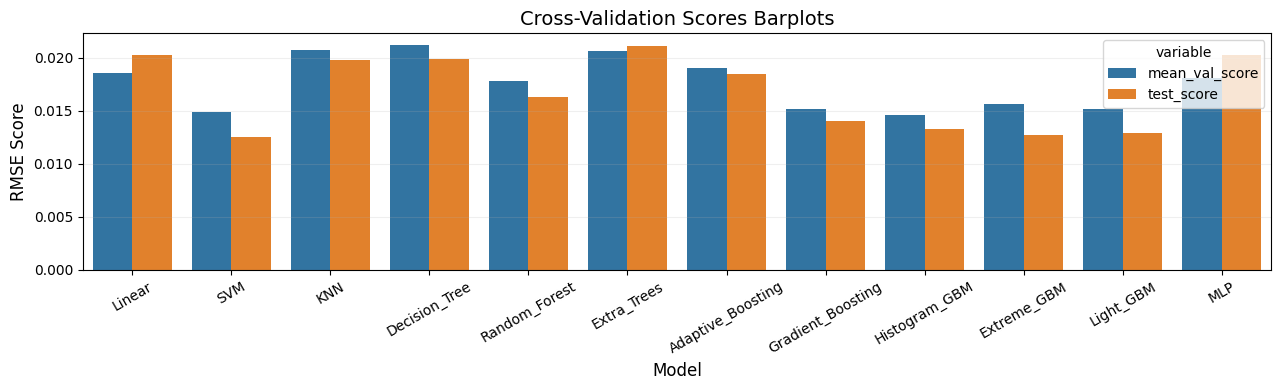

In [93]:
# plot the barplot to compare the values of the cv scores
fig, ax = plt.subplots(figsize=(13, 4))

sns.barplot(data=cv_hp_scrs, x='index', y='value', hue='variable')
ax.set_xlabel('Model', size=12)
ax.set_ylabel('RMSE Score', size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation='30')
ax.set_title('Cross-Validation Scores Barplots', size=14)
ax.grid(axis='y', alpha=0.2)
plt.tight_layout()

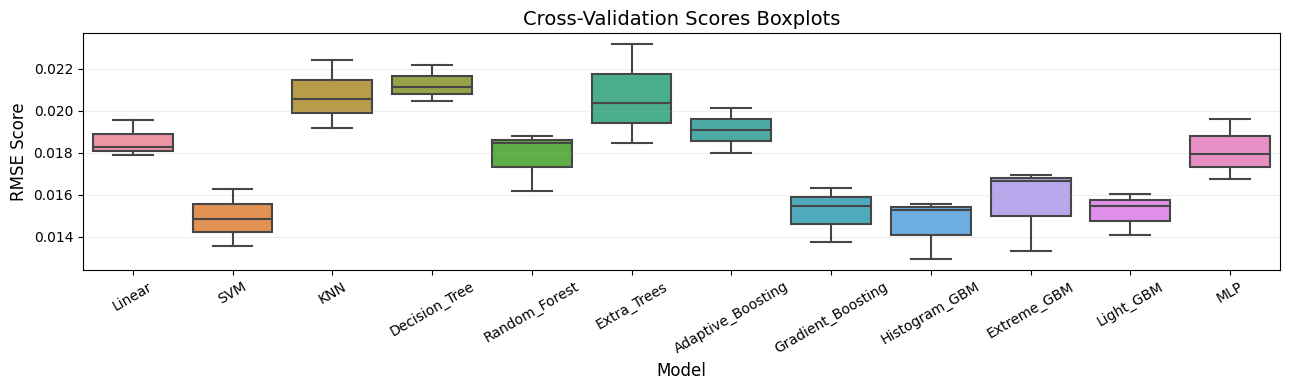

In [94]:
# plot the boxplot to compare the spread and centers of the cv scores
fig, ax = plt.subplots(figsize=(13, 4))

sns.boxplot(data=cv_scrs_df.iloc[:, :3].T)
ax.set_xlabel('Model', size=12)
ax.set_ylabel('RMSE Score', size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation='30')
ax.set_title('Cross-Validation Scores Boxplots', size=14)
ax.grid(axis='y', alpha=0.2)
plt.tight_layout()

In [95]:
# create a function for generating all scores for each method
def all_scores(y_test, y_pred, estimator_names):
    # y_test: test targets
    # y_pred: predicted targets
    # estimator_names: list of estimators
    
    scrs = [[] for i in range(4)]
    
    scrs_names = ['RMSE', 'MAPE', 'R-Squared', 'R']
    
    for est in estimator_names:
        scrs[0].append(mean_squared_error(y_test, y_pred[est], squared=False))
        scrs[1].append(mean_absolute_percentage_error(y_test, y_pred[est])*100)
        scrs[2].append(r2_score(y_test, y_pred[est]))
        scrs[3].append(pd.concat([y_test, y_pred[est]], axis=1).corr(method='spearman').values[0, 1])
        
    scrs_df = pd.DataFrame(np.asarray(scrs).T, index=estimator_names, columns=scrs_names)
    
    return scrs_df

In [96]:
# all scores
scrs_df = all_scores(y_test=y_test, y_pred=y_pred, estimator_names=estimator_names)
scrs_df.style.highlight_min(subset=['RMSE', 'MAPE'], color='lightblue').highlight_max(subset=['R-Squared', 'R'], color='pink')

#### 6.1.3 Validation Curves

##### 6.1.3.1 Learning Curve

In [97]:
# create a function for plotting learning curves
def validation_curve(est_fit, X_train, y_train):
    # est_fit: fitted estimators to be examined 
    # X_train: training features
    # y_train: training target
    
    train_sizes = [i for i in range(len(est_fit))] 
    train_scores = [i for i in range(len(est_fit))] 
    val_scores = [i for i in range(len(est_fit))] 
    fit_times = [i for i in range(len(est_fit))] 
    score_times = [i for i in range(len(est_fit))]
    
    for i in range(len(est_fit)):

        (train_sizes[i], train_scores[i], val_scores[i], 
         fit_times[i], score_times[i]) = learning_curve(estimator=est_fit[i], X=X_train, y=y_train, 
                                                        train_sizes=[0.25, 0.50, 0.75, 1.0], cv=3, scoring='r2', 
                                                        exploit_incremental_learning=False, verbose=0, shuffle=False, 
                                                        random_state=1234, error_score=np.nan, 
                                                        return_times=True, fit_params=None)

    train_scores_mean = [np.mean(est, axis=1) for est in train_scores]
    val_scores_mean = [np.mean(est, axis=1) for est in val_scores]
    fit_times_mean = [np.mean(est, axis=1) for est in fit_times]
    score_times_mean = [np.mean(est, axis=1) for est in score_times]

    train_scores_mean_df = pd.DataFrame(np.array(train_scores_mean).T, index=train_sizes[0], columns=estimator_names)
    val_scores_mean_df = pd.DataFrame(np.array(val_scores_mean).T, index=train_sizes[0], columns=estimator_names)
    fit_times_mean_df = pd.DataFrame(np.array(fit_times_mean).T, index=train_sizes[0], columns=estimator_names)
    score_times_mean_df = pd.DataFrame(np.array(score_times_mean).T, index=train_sizes[0], columns=estimator_names)

    train_scores_std = [np.std(est, axis=1) for est in train_scores]
    val_scores_std = [np.std(est, axis=1) for est in val_scores]
    fit_times_std = [np.std(est, axis=1) for est in fit_times]
    score_times_std = [np.std(est, axis=1) for est in score_times]

    train_scores_std_df = pd.DataFrame(np.array(train_scores_std).T, index=train_sizes[0], columns=estimator_names)
    val_scores_std_df = pd.DataFrame(np.array(val_scores_std).T, index=train_sizes[0], columns=estimator_names)
    fit_times_std_df = pd.DataFrame(np.array(fit_times_std).T, index=train_sizes[0], columns=estimator_names)
    score_times_std_df = pd.DataFrame(np.array(score_times_std).T, index=train_sizes[0], columns=estimator_names)
        
    fig, axs = plt.subplots(nrows=len(est_fit), ncols=3, figsize=(13, 2.5*len(est_fit)))
    titles = ['Learning Curve', 'Scalability', 'Performance']
    for i in range(len(train_sizes)):
        for j in range(3):
            # learning curve
            if j == 0:
                axs[i,j].plot(train_sizes[i], train_scores_mean_df.iloc[:,i], label='Training Score', c='r', marker='o')
                axs[i,j].plot(train_sizes[i], val_scores_mean_df.iloc[:,i], label='Validation Score', c='g', marker='o')
                axs[i,j].fill_between(train_sizes[i], train_scores_mean_df.iloc[:,i] - train_scores_std_df.iloc[:,i], 
                                      train_scores_mean_df.iloc[:,i] + train_scores_std_df.iloc[:,i], alpha=0.1, color='r')
                axs[i,j].fill_between(train_sizes[i], val_scores_mean_df.iloc[:,i] - val_scores_std_df.iloc[:,i], 
                                      val_scores_mean_df.iloc[:,i] + val_scores_std_df.iloc[:,i], alpha=0.1, color='g')
                axs[i,j].set_ylim([-0.05,1.05])
                axs[i,j].set_xlabel('Training Samples')
            # scalability
            elif j == 1:
                axs[i,j].plot(train_sizes[i], fit_times_mean_df.iloc[:,i], label='Scalability', marker='o')
                axs[i,j].fill_between(train_sizes[i], fit_times_mean_df.iloc[:,i] - fit_times_std_df.iloc[:,i], 
                                      fit_times_mean_df.iloc[:,i] + fit_times_std_df.iloc[:,i], alpha=0.1)
                axs[i,j].set_xlabel('Training Samples')
            # performance
            elif j == 2:
                axs[i,j].plot(fit_times_mean_df.iloc[:,i], val_scores_mean_df.iloc[:,i], label='Performance', marker='o')
                axs[i,j].fill_between(fit_times_mean_df.iloc[:,i], val_scores_mean_df.iloc[:,i] - val_scores_std_df.iloc[:,i], 
                                      val_scores_mean_df.iloc[:,i] + val_scores_std_df.iloc[:,i], alpha=0.1)
                axs[i,j].set_ylim([-0.05,1.05])
                axs[i,j].set_xlabel('Fit Time')

            if j in [0,2]:
                axs[i,j].set_ylabel('R2 Score')
            elif j == 1:
                axs[i,j].set_ylabel('Fit Time')
            if i == 0:
                axs[i,j].set_title(titles[j], size=12)
            axs[i,j].grid(which='both', alpha=0.2)
        axs[i,0].text(0.5, 0.5, estimator_names[i], va='center', rotation='90', size=12)
        axs[i,0].legend()

    plt.suptitle(y=1.001, t='Models Learning Curves', size=18)        
    plt.tight_layout()

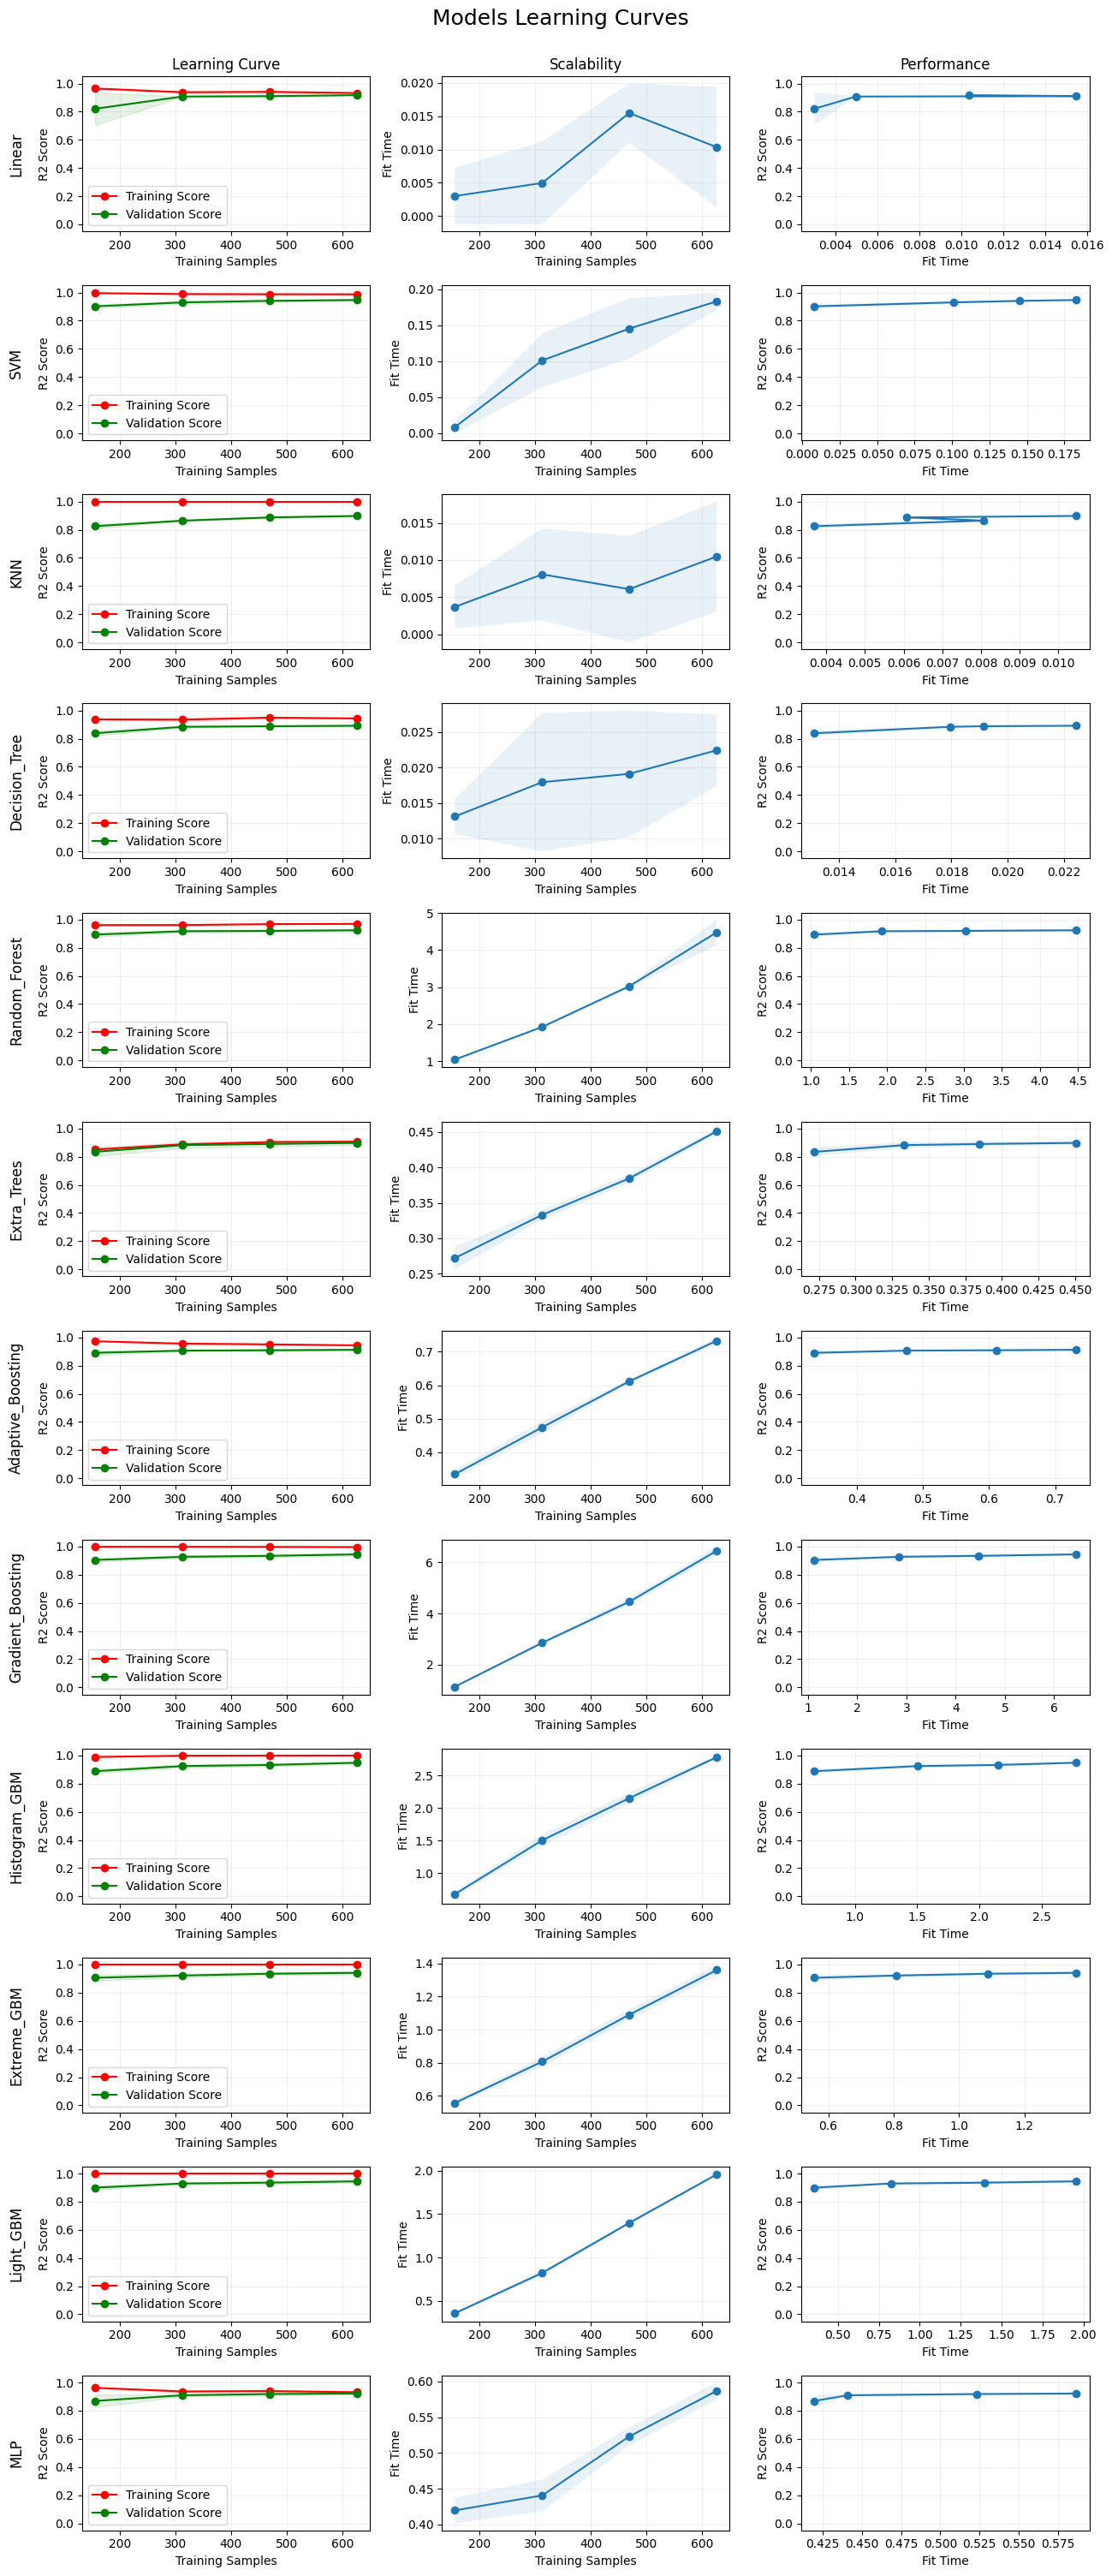

In [98]:
# learning curve
validation_curve(est_fit=best_fit, X_train=X_train, y_train=y_train)

#### 6.1.4 Voting Ensemble

In [99]:
from sklearn.ensemble import VotingRegressor

In [100]:
# obtain the estimators for voting
vote_est = [[] for est in range(len(estimator_names))]
for i in range(len(estimator_names)):
    for j in range(i+1):
        vote_est[i].append(best_fit[int(cv_scrs_df.iloc[:, [-1]].reset_index().nsmallest(len(cv_scrs_df.index), 
                                                                                         ['test_score']).index[j])].steps[0])
vote_est

[[('svr', SVR(C=2.5356051938157957, epsilon=0.0009627607674781434))],
 [('svr', SVR(C=2.5356051938157957, epsilon=0.0009627607674781434)),
  ('xgbregressor',
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.08017339393217202,
                max_delta_step=0, max_depth=470,
                min_child_weight=0.8577916995231063, missing=nan,
                monotone_constraints='()', n_estimators=374, n_jobs=8,
                num_parallel_tree=1, predictor='auto', random_state=1234,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None))],
 [('svr', SVR(C=2.5356051938157957, epsilon=0.0009627607674781434)),
  ('xgbregressor',
   XGBRegressor(base_score=0.5, booster='gbtree',

In [101]:
# voting model training
vote_fit = []
for i, est in enumerate(vote_est):
    print()
    print('*******{} estimator voting ensemble******* \n'.format(i+1))
    start_time = time.time()
    vote_fit.append(VotingRegressor(estimators=est, verbose=2).fit(X_train, y_train))
    
    end_time = time.time()
    print(f'Training time: {end_time - start_time} seconds')


*******1 estimator voting ensemble******* 

[Voting] ...................... (1 of 1) Processing svr, total=   0.4s
Training time: 0.4039733409881592 seconds

*******2 estimator voting ensemble******* 

[Voting] ...................... (1 of 2) Processing svr, total=   0.4s
[Voting] ............. (2 of 2) Processing xgbregressor, total=   1.9s
Training time: 2.265336513519287 seconds

*******3 estimator voting ensemble******* 

[Voting] ...................... (1 of 3) Processing svr, total=   0.4s
[Voting] ............. (2 of 3) Processing xgbregressor, total=   1.9s
[Voting] ............ (3 of 3) Processing lgbmregressor, total=   2.6s
Training time: 4.8625757694244385 seconds

*******4 estimator voting ensemble******* 

[Voting] ...................... (1 of 4) Processing svr, total=   0.5s
[Voting] ............. (2 of 4) Processing xgbregressor, total=   1.8s
[Voting] ............ (3 of 4) Processing lgbmregressor, total=   2.2s
[Voting]  (4 of 4) Processing histgradientboostingregres

In [102]:
# voting model prediction
vote_names = ['{}_Vote'.format(i+1) for i in range(len(estimator_names))]
y_vote = test_prediction(X_test=X_test, est_fit=vote_fit, estimator_names=vote_names)


*******1_Vote estimator prediction******* 

Predicting time: 0.05485367774963379 seconds

*******2_Vote estimator prediction******* 

Predicting time: 0.05983686447143555 seconds

*******3_Vote estimator prediction******* 

Predicting time: 0.11420488357543945 seconds

*******4_Vote estimator prediction******* 

Predicting time: 0.15002703666687012 seconds

*******5_Vote estimator prediction******* 

Predicting time: 0.16556024551391602 seconds

*******6_Vote estimator prediction******* 

Predicting time: 0.2682645320892334 seconds

*******7_Vote estimator prediction******* 

Predicting time: 0.2556431293487549 seconds

*******8_Vote estimator prediction******* 

Predicting time: 0.2804276943206787 seconds

*******9_Vote estimator prediction******* 

Predicting time: 0.31909775733947754 seconds

*******10_Vote estimator prediction******* 

Predicting time: 0.32433509826660156 seconds

*******11_Vote estimator prediction******* 

Predicting time: 0.32833099365234375 seconds

*******12_

In [103]:
# voting scores
scrs_vote_df = all_scores(y_test=y_test, y_pred=y_vote, estimator_names=vote_names)
scrs_vote_df.style.highlight_min(subset=['RMSE', 'MAPE'], color='lightblue').highlight_max(subset=['R-Squared', 'R'], color='pink')

#### 6.1.5 Stacking Ensemble

In [104]:
from sklearn.ensemble import StackingRegressor

In [105]:
# obtain the estimators for stacking
stack_est = []
for i in range(6):
    stack_est.append(best_fit[int(cv_scrs_df.iloc[:, [-1]].reset_index().nsmallest(len(cv_scrs_df.index), 
                                                                                   ['test_score']).index[i])].steps[0])
stack_est

[('svr', SVR(C=2.5356051938157957, epsilon=0.0009627607674781434)),
 ('xgbregressor',
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.08017339393217202,
               max_delta_step=0, max_depth=470,
               min_child_weight=0.8577916995231063, missing=nan,
               monotone_constraints='()', n_estimators=374, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=1234,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 ('lgbmregressor',
  LGBMRegressor(learning_rate=0.1328244477158028, max_depth=43,
                min_child_samples=13, min_child_weight=0.044489786147151274,
                n_estimators=497, random_state=1234)),
 ('hi

In [106]:
# stacking model training
stack_final_est = [LinearRegression(), SVR(C=10.0, epsilon=0.001), 
                   KNeighborsRegressor(), DecisionTreeRegressor(random_state=1234), 
                   RandomForestRegressor(random_state=1234), ExtraTreesRegressor(random_state=1234), 
                   AdaBoostRegressor(random_state=1234), GradientBoostingRegressor(random_state=1234), 
                   HGBRegressor(random_state=1234), XGBRegressor(random_state=1234), 
                   LGBMRegressor(random_state=1234), MLPRegressor(hidden_layer_sizes=(200,), 
                                                                  activation='identity', 
                                                                  solver='lbfgs', 
                                                                  alpha=0.0001, 
                                                                  max_iter=70, 
                                                                  random_state=1234)]
stack_fit = []
for i, est in enumerate(stack_final_est):
    print()
    print('*******{} estimator stacking ensemble******* \n'.format(estimator_names[i]))
    start_time = time.time()
    stack_fit.append(StackingRegressor(estimators=stack_est, final_estimator=est, 
                                       cv=3, passthrough=True, verbose=2).fit(X_train, y_train))
    
    end_time = time.time()
    print(f'Training time: {end_time - start_time} seconds')


*******Linear estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 81.52108478546143 seconds

*******SVM estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 83.6999843120575 seconds

*******KNN estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 83.23405623435974 seconds

*******Decision_Tree estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 82.15041708946228 seconds

*******Random_Forest estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 85.51362109184265 seconds

*******Extra_Trees estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 80.35516405105591 seconds

*******Adaptive_Boosting estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 84.78678607940674 seconds

*******Gradient_Boosting estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 85.58914136886597 seconds

*******Histogram_GBM estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 87.64985942840576 seconds

*******Extreme_GBM estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 86.24767422676086 seconds

*******Light_GBM estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 77.96282982826233 seconds

*******MLP estimator stacking ensemble******* 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

Training time: 77.38443756103516 seconds


In [107]:
# stacking model prediction
stack_names = ['{}_Stack'.format(i) for i in estimator_names]
y_stack = test_prediction(X_test=X_test, est_fit=stack_fit, estimator_names=stack_names)


*******Linear_Stack estimator prediction******* 

Predicting time: 0.2903125286102295 seconds

*******SVM_Stack estimator prediction******* 

Predicting time: 0.32297706604003906 seconds

*******KNN_Stack estimator prediction******* 

Predicting time: 0.26703357696533203 seconds

*******Decision_Tree_Stack estimator prediction******* 

Predicting time: 0.2771573066711426 seconds

*******Random_Forest_Stack estimator prediction******* 

Predicting time: 0.25395822525024414 seconds

*******Extra_Trees_Stack estimator prediction******* 

Predicting time: 0.2631106376647949 seconds

*******Adaptive_Boosting_Stack estimator prediction******* 

Predicting time: 0.25061535835266113 seconds

*******Gradient_Boosting_Stack estimator prediction******* 

Predicting time: 0.22537922859191895 seconds

*******Histogram_GBM_Stack estimator prediction******* 

Predicting time: 0.22991490364074707 seconds

*******Extreme_GBM_Stack estimator prediction******* 

Predicting time: 0.28348422050476074 seco

In [108]:
# stacking scores
scrs_stack_df = all_scores(y_test=y_test, y_pred=y_stack, estimator_names=stack_names)
scrs_stack_df.style.highlight_min(subset=['RMSE', 'MAPE'], color='lightblue').highlight_max(subset=['R-Squared', 'R'], color='pink')

### 6.2 Model Inspection and Visualization

In [109]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from matplotlib.ticker import MaxNLocator

#### 6.2.1 Inspection Plots

In [110]:
# plot the density plots to compare the distribution and trend of the predicted data to the true data
def density_plots(y_test, y_pred, estimator_names, method):
    fig, axs = plt.subplots(figsize=(13, 7), nrows=3, ncols=4, sharex=True, sharey=True)

    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):    
        sns.kdeplot(data=y_test, x='PHIF', label='True', lw=2, ax=ax)
        sns.kdeplot(data=y_pred.iloc[:, [i]], x=est, label='Predicted', lw=2, ax=ax)

        #if i not in range(len(estimator_names)):
            #ax.set_axis_off()

        ax.set(xlabel=None)
        ax.set(ylabel='Density')
        ax.set_title(est, size=12)
        ax.grid(alpha=0.2)
        ax.legend(fontsize='small')
        ax.set_ylim([0, 20])

    #axs[2,3].set_axis_off()

    plt.suptitle(x=0.52, y=1.001, t=method + ' Density Plots', ha='center', size=18)
    plt.tight_layout()

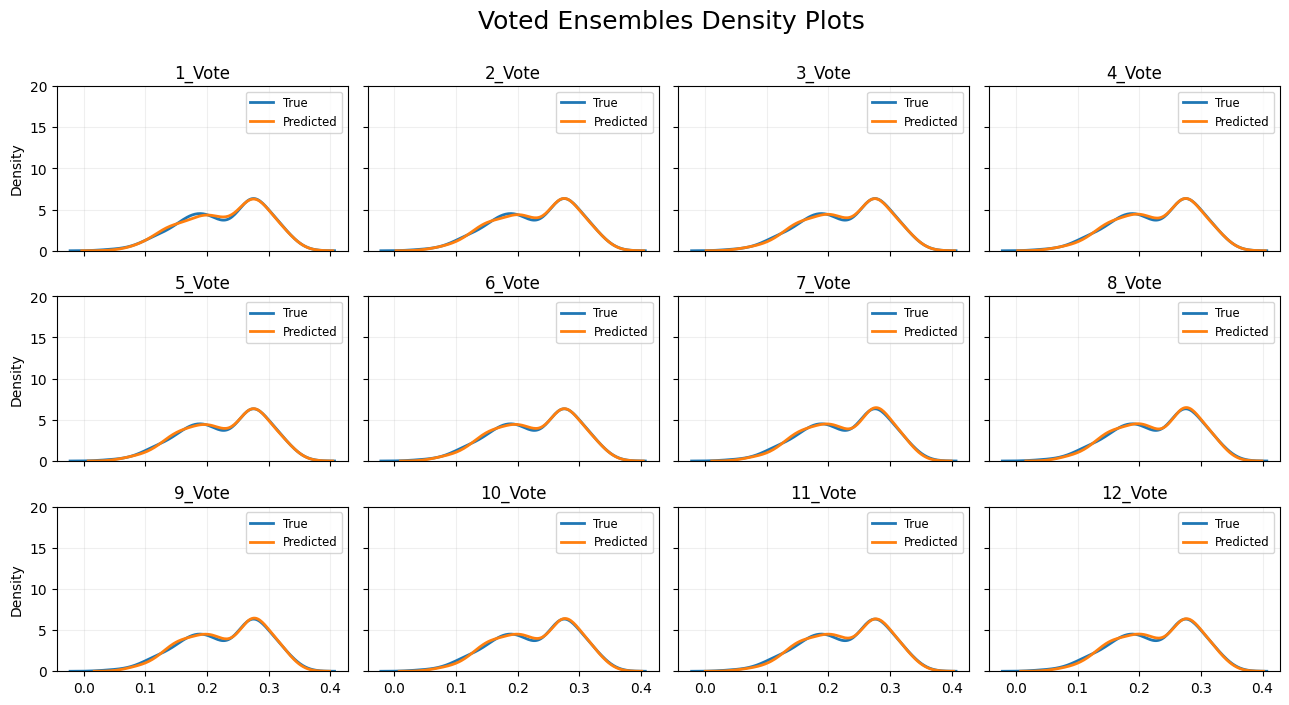

In [111]:
density_plots(y_test=y_test, y_pred=y_vote, estimator_names=vote_names, method='Voted Ensembles')

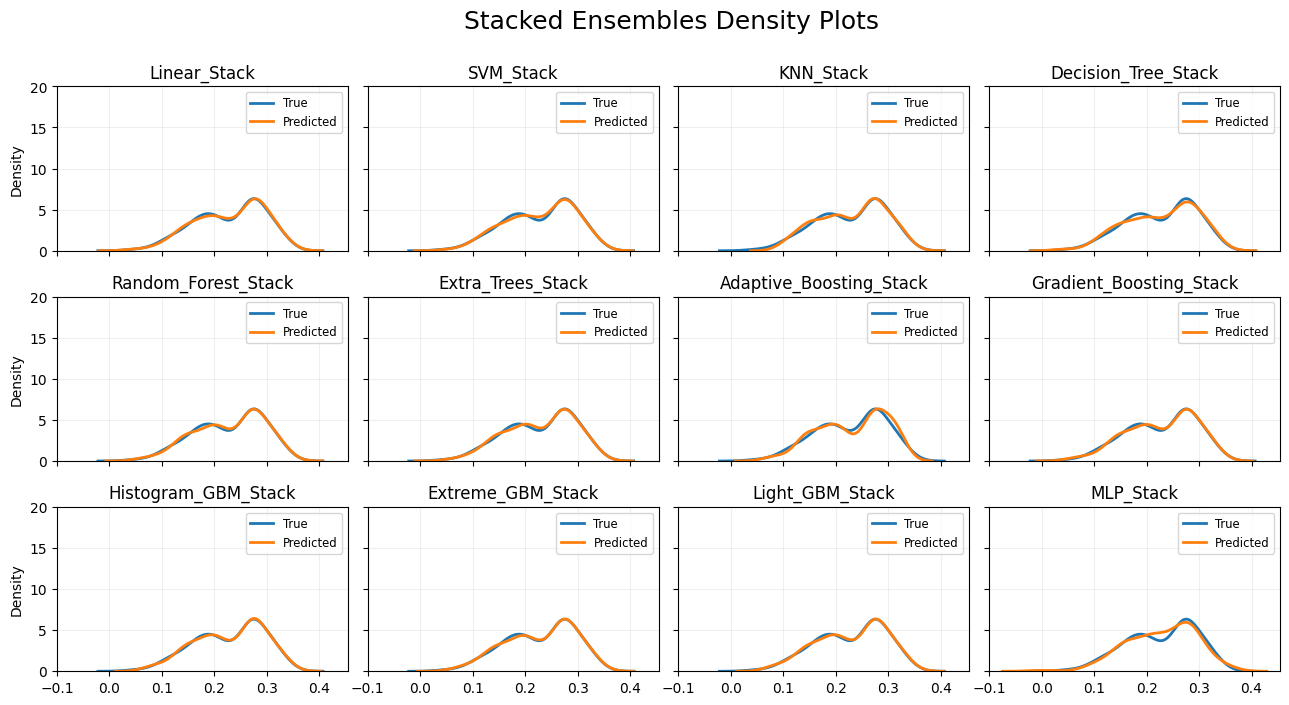

In [112]:
density_plots(y_test=y_test, y_pred=y_stack, estimator_names=stack_names, method='Stacked Ensembles')

In [113]:
# plot the correlation plots to inspect the relationship and correlation between the predicted data and the true data
def correlation_plots(y_test, y_pred, estimator_names, method):
    # method: machine learning or empirical correlation in string format
    
    fig, axs = plt.subplots(figsize=(13, 10), nrows=3, ncols=4, sharex=True, sharey=True)

    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):    
        sns.scatterplot(x=y_test.PHIF, y=y_pred.iloc[:, i], ax=ax)

        #if i not in range(len(estimator_names)):
            #ax.set_axis_off()

        ax.plot([0, 1], [0, 1], transform=ax.transAxes, c='k', lw=1.5)
        ax.set(xlabel='True')
        ax.set(ylabel='Pred')
        ax.set_title(est, size=12)
        ax.grid(alpha=0.2)
        ax.set_xlim([0, 0.5])
        ax.set_ylim([0, 0.5])
        ax.set_aspect(1.0 / ax.get_data_ratio(), adjustable='box')
        ax.xaxis.set_major_locator(MaxNLocator(4)) 
        ax.yaxis.set_major_locator(MaxNLocator(4)) 

    #axs[2,3].set_axis_off()

    plt.suptitle(x=0.52, y=1.001, t=method + ' Cross Plots', size=18)
    plt.tight_layout()

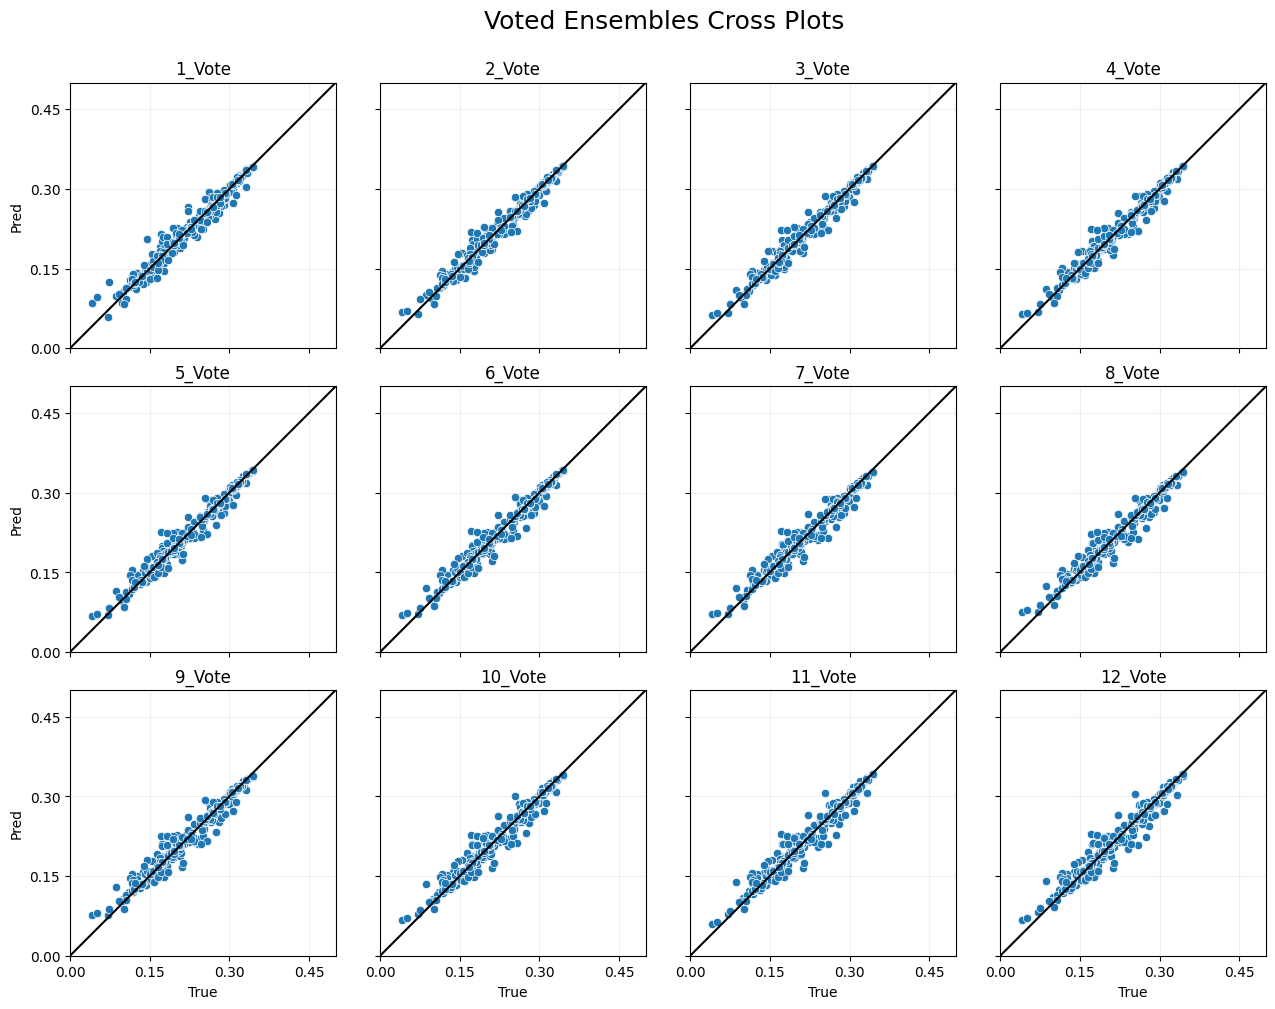

In [114]:
correlation_plots(y_test=y_test, y_pred=y_vote, estimator_names=vote_names, method='Voted Ensembles')

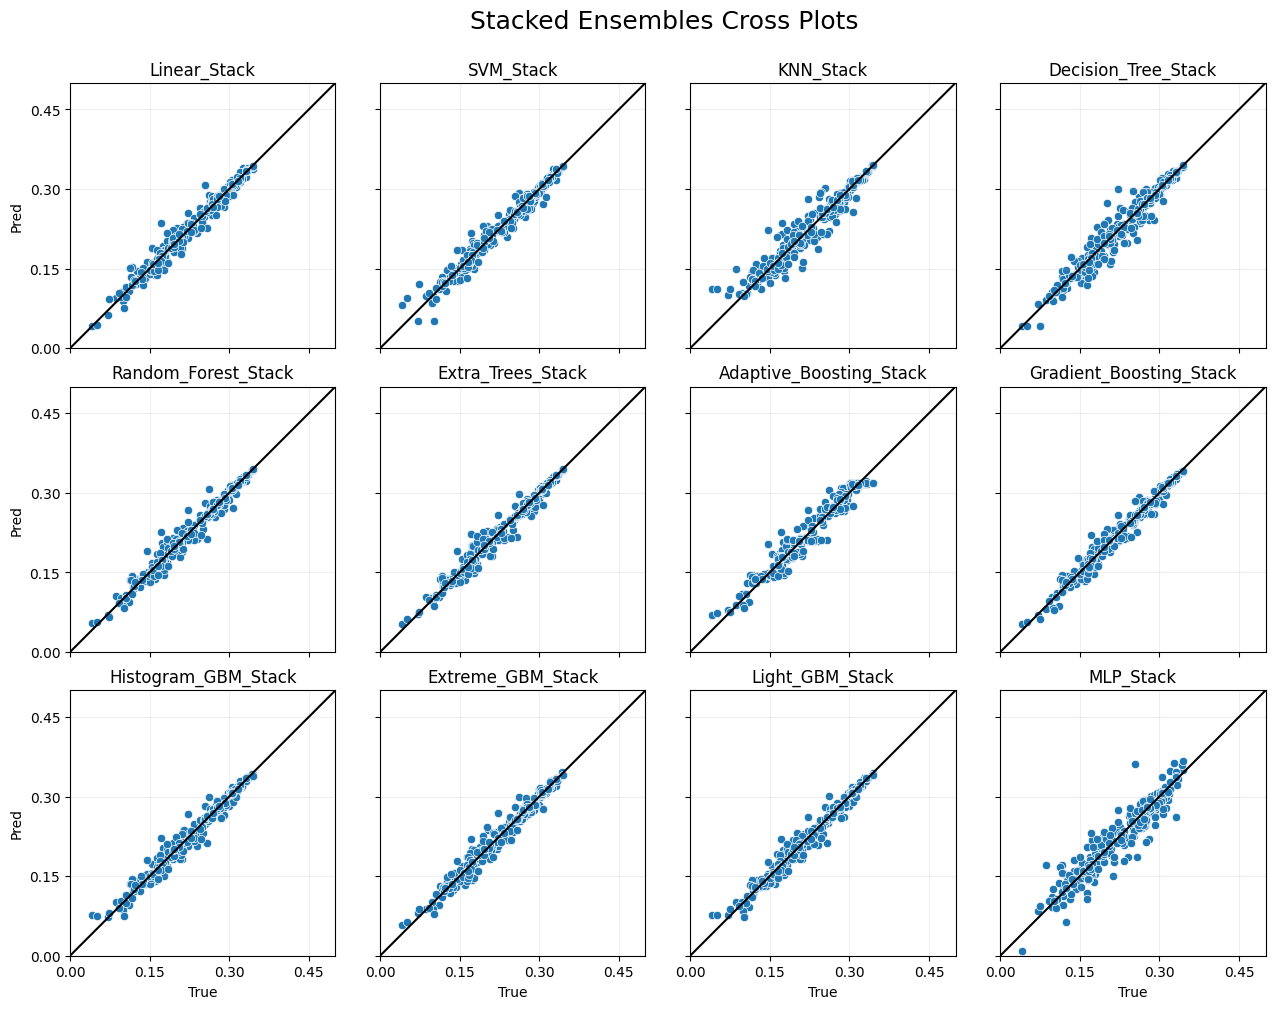

In [115]:
correlation_plots(y_test=y_test, y_pred=y_stack, estimator_names=stack_names, method='Stacked Ensembles')

In [116]:
# plot the residual plot to inspect the amount of deviation of the predicted data from the original data
def residual_plots(y_test, y_pred, estimator_names, method):
    # method: machine learning or empirical correlation in string format
    
    fig, axs = plt.subplots(figsize=(13, 7), ncols=y_pred.shape[1], sharex=True, sharey=True)

    y_res = y_pred.copy()
    y_res = y_res.sort_index()
    for est in y_res.columns.unique():
        y_res[est] = y_res[est] - y_test.sort_index()['PHIF']

    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):    
        sns.scatterplot(data=y_res[est], x=y_res[est].values, y=y_res[est].index, 
                        color='red', edgecolors=None, label='Residual', ax=ax)

        ax.set(xlabel=None)
        ax.set(ylabel='Index')
        ax.set_title(est, size=12, rotation='30')
        ax.grid(alpha=0.2)
        ax.legend(fontsize='small', loc='lower center')
        ax.set_xlim([-0.5, 0.5])
        ax.axvline(0, c='k', lw=1)
    
    plt.gca().invert_yaxis()
    plt.suptitle(x=0.52, y=1.001, t=method + ' Residual Plots', ha='center', size=18)
    plt.tight_layout()

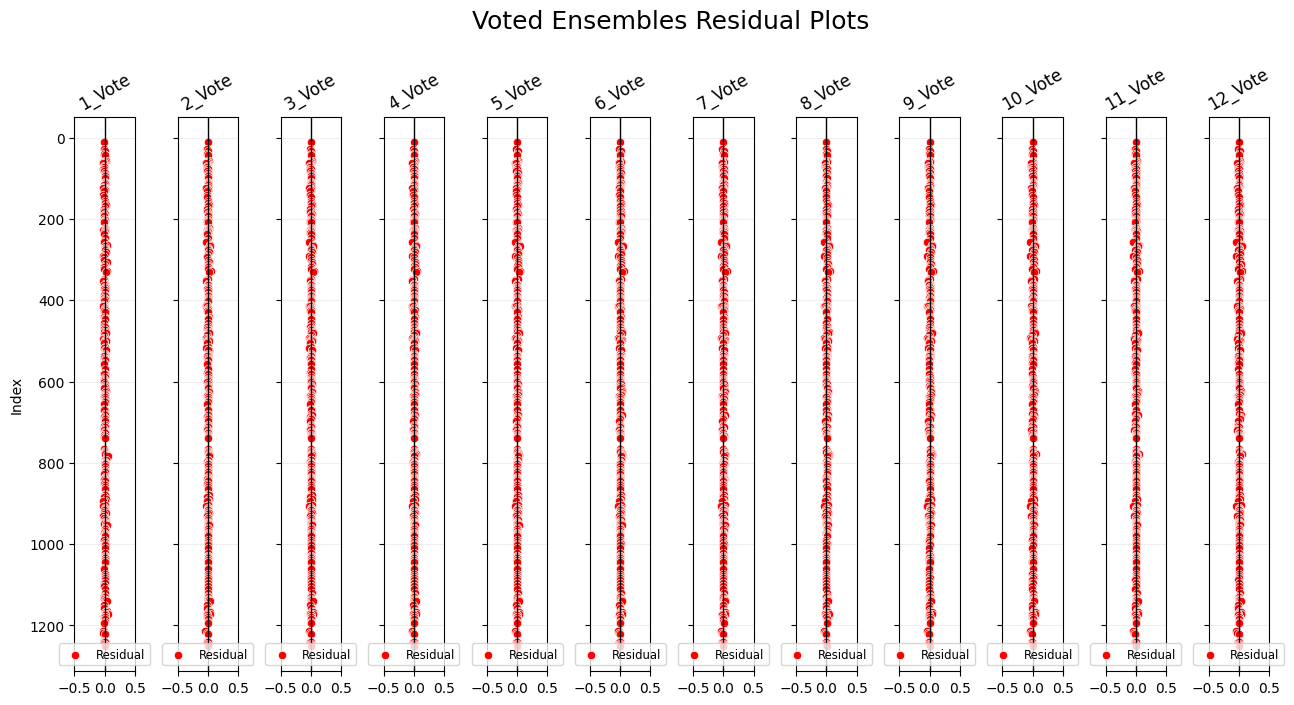

In [117]:
residual_plots(y_test=y_test, y_pred=y_vote, estimator_names=vote_names, method='Voted Ensembles')

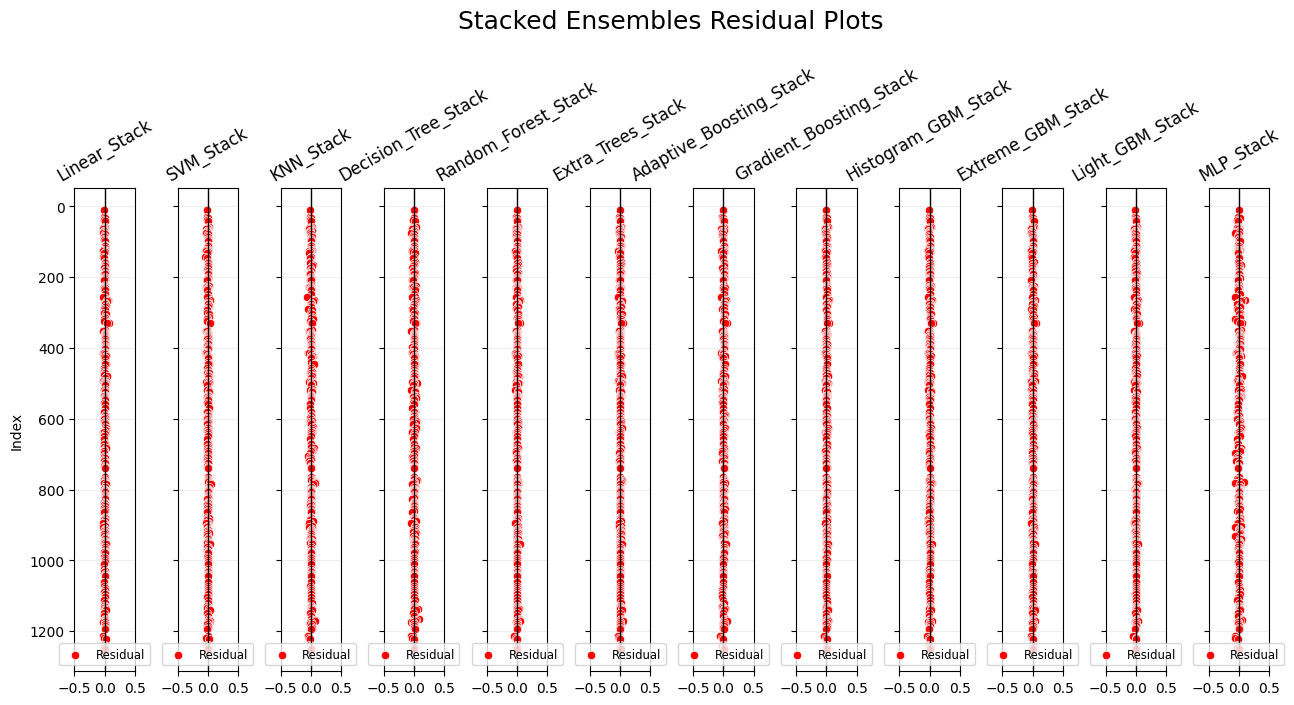

In [118]:
residual_plots(y_test=y_test, y_pred=y_stack, estimator_names=stack_names, method='Stacked Ensembles')

In [119]:
# plot the lineplot to inspect the amount of deviation of the predicted data from the original data
def line_plots(y_test, y_pred, estimator_names, method):
    fig, axs = plt.subplots(figsize=(13, 7), ncols=y_pred.shape[1], sharex=True, sharey=True)

    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):              
        ax.plot(y_test.sort_index(), y_test.sort_index().index, label='True', lw=1.5)
        ax.plot(y_pred.sort_index()[est], y_pred.sort_index()[est].index, label='Predicted', lw=1.5)

        ax.set(xlabel=None)
        if i == 0:
            ax.set(ylabel='Index')
        else:
            ax.set(ylabel=None)
        ax.set_title(est, size=12, rotation='30')
        ax.grid(alpha=0.2)
        ax.legend(fontsize='small', loc='lower center')
        ax.set_xlim([0, 0.5])
        ax.invert_yaxis()

    plt.gca().invert_yaxis()
    plt.suptitle(x=0.52, y=1.001, t=method + ' Prediction Plots', ha='center', size=18)
    plt.tight_layout()

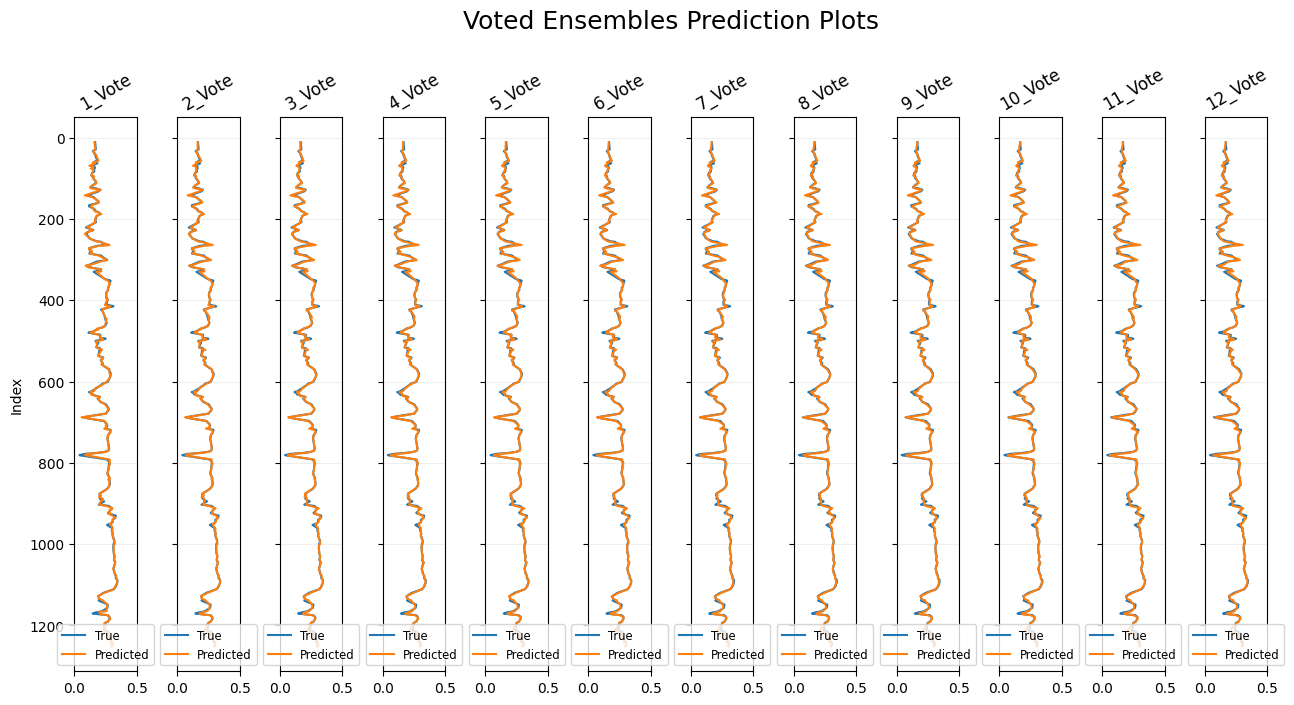

In [120]:
line_plots(y_test=y_test, y_pred=y_vote, estimator_names=vote_names, method='Voted Ensembles')

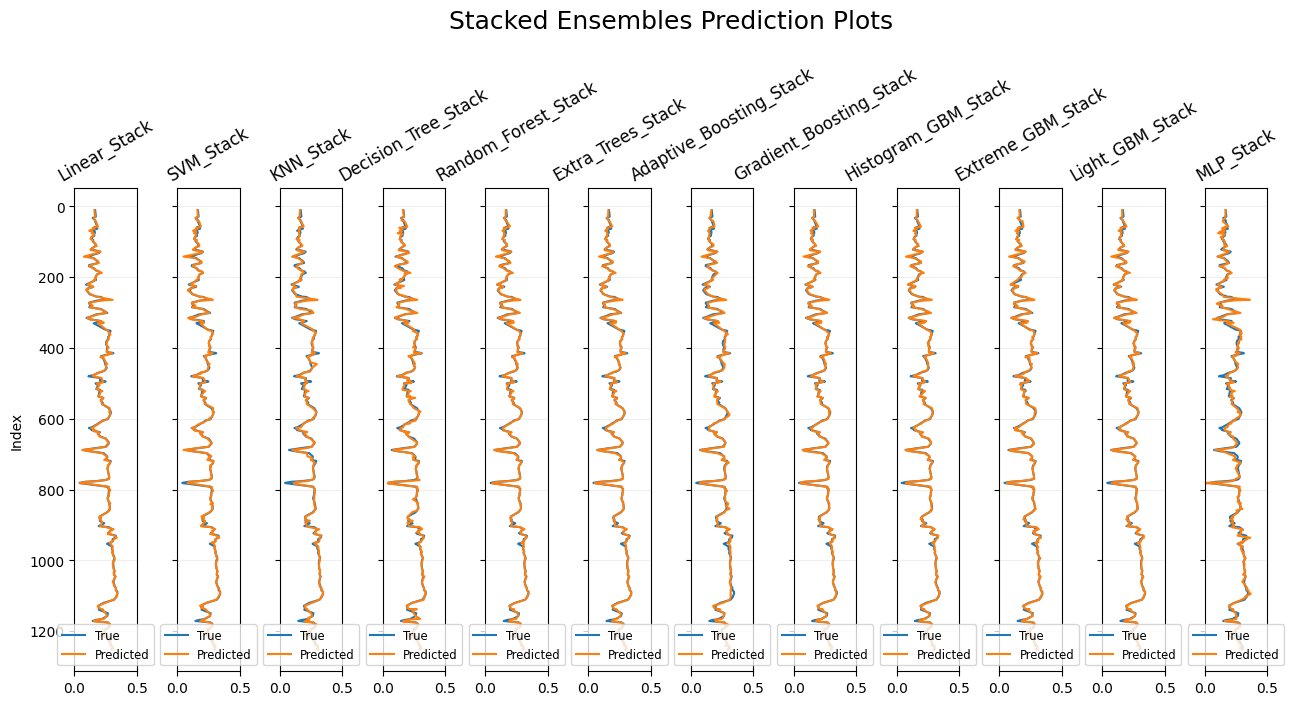

In [121]:
line_plots(y_test=y_test, y_pred=y_stack, estimator_names=stack_names, method='Stacked Ensembles')

#### 6.2.2 Feature Importance

##### 6.2.2.1 Permutation Feature Importance (PFI)

In [122]:
# create a function for obtaining the permutaion feature importance scores for each method
def pfi_scores(est_fit, X_test, y_test):
    # est_fit: fitted estimators to be examined
    # X_test: test features
    # y_test: test target
    
    model_pfi = [est for est in est_fit]

    for i, est in enumerate(estimator_names):
        print()
        print('*******{} estimator PFI******* \n'.format(estimator_names[i]))
        start_time = time.time()

        model_pfi[i] = permutation_importance(estimator=est_fit[i], X=X_test, y=y_test, scoring='neg_root_mean_squared_error', 
                                              n_repeats=5, random_state=1234, max_samples=1.0)

        end_time = time.time()
        print(f'Training time: {end_time - start_time} seconds')
        
    pfi_sorted_idx = [est for est in est_fit]
    pfi_scr_mean = [est for est in est_fit]
    pfi_scr_std = [est for est in est_fit]
    pfi_scr = [est for est in est_fit]

    pfi_scr_mean_df_lst = []
    pfi_scr_df_lst = []

    for i in range(len(model_pfi)):
        pfi_sorted_idx[i] = model_pfi[i].importances_mean.argsort()[::-1]
        pfi_scr_mean[i] = model_pfi[i].importances_mean[pfi_sorted_idx[i]]
        pfi_scr_std[i] = model_pfi[i].importances_std[pfi_sorted_idx[i]]
        pfi_scr[i] = model_pfi[i].importances[pfi_sorted_idx[i]].T

        pfi_scr_mean_df_lst.append(pd.DataFrame(pfi_scr_mean[i], 
                                                index=X_test.columns[pfi_sorted_idx[i]], 
                                                columns=[estimator_names[i]]).T)
        pfi_scr_df_lst.append(pd.DataFrame(pfi_scr[i], 
                                           columns=X_test.columns[pfi_sorted_idx[i]]))
        
    return pfi_scr_mean_df_lst, pfi_scr_std, pfi_scr_df_lst

In [123]:
# permutaion feature importance (PFI)
pfi_scr_mean_df_lst, pfi_scr_std, pfi_scr_df_lst = pfi_scores(est_fit=best_fit, X_test=X_test, y_test=y_test)


*******Linear estimator PFI******* 

Training time: 1.254847526550293 seconds

*******SVM estimator PFI******* 

Training time: 14.36991810798645 seconds

*******KNN estimator PFI******* 

Training time: 6.288758754730225 seconds

*******Decision_Tree estimator PFI******* 

Training time: 1.3139171600341797 seconds

*******Random_Forest estimator PFI******* 

Training time: 16.109302759170532 seconds

*******Extra_Trees estimator PFI******* 

Training time: 8.81673526763916 seconds

*******Adaptive_Boosting estimator PFI******* 

Training time: 6.725596904754639 seconds

*******Gradient_Boosting estimator PFI******* 

Training time: 3.1842565536499023 seconds

*******Histogram_GBM estimator PFI******* 

Training time: 8.558334589004517 seconds

*******Extreme_GBM estimator PFI******* 

Training time: 3.4521706104278564 seconds

*******Light_GBM estimator PFI******* 

Training time: 5.058605194091797 seconds

*******MLP estimator PFI******* 

Training time: 1.460362434387207 seconds


In [124]:
# create a function for plotting the barplots of the permutaion feature importance scores for each method
def pfi_barplot(pfi_scr_mean_df_lst, pfi_scr_std):
    # pfi_scr_mean_df_lst: mean scores
    # pfi_scr_std: standard deviations
    
    # plot the barplot to compare the mean importance of the features
    fig, axs = plt.subplots(figsize=(13, 3*len(pfi_scr_mean_df_lst)), nrows=len(pfi_scr_mean_df_lst), sharey=True)
    
    #colors = [cm.get_cmap('gist_ncar_r', len(estimator_names)+1)(n) for n in np.linspace(0,1,len(estimator_names)+1)][1:]
    colors = cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors
    
    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):
        sns.barplot(data=pfi_scr_mean_df_lst[i], yerr=pfi_scr_std[i], orient='v', color=colors[i], ax=ax)

        if i not in range(len(estimator_names)):
            ax.set_axis_off()
        ax.set(xlabel='Feature')
        ax.set(ylabel='Mean Importance')
        ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation='60')
        ax.set_yscale('log')
        ax.set_title(est, size=14)
        ax.grid(which='major', alpha=0.2)

    plt.suptitle(y=1.001, t='Permutation Feature Importance Barplots', size=18)
    plt.tight_layout()

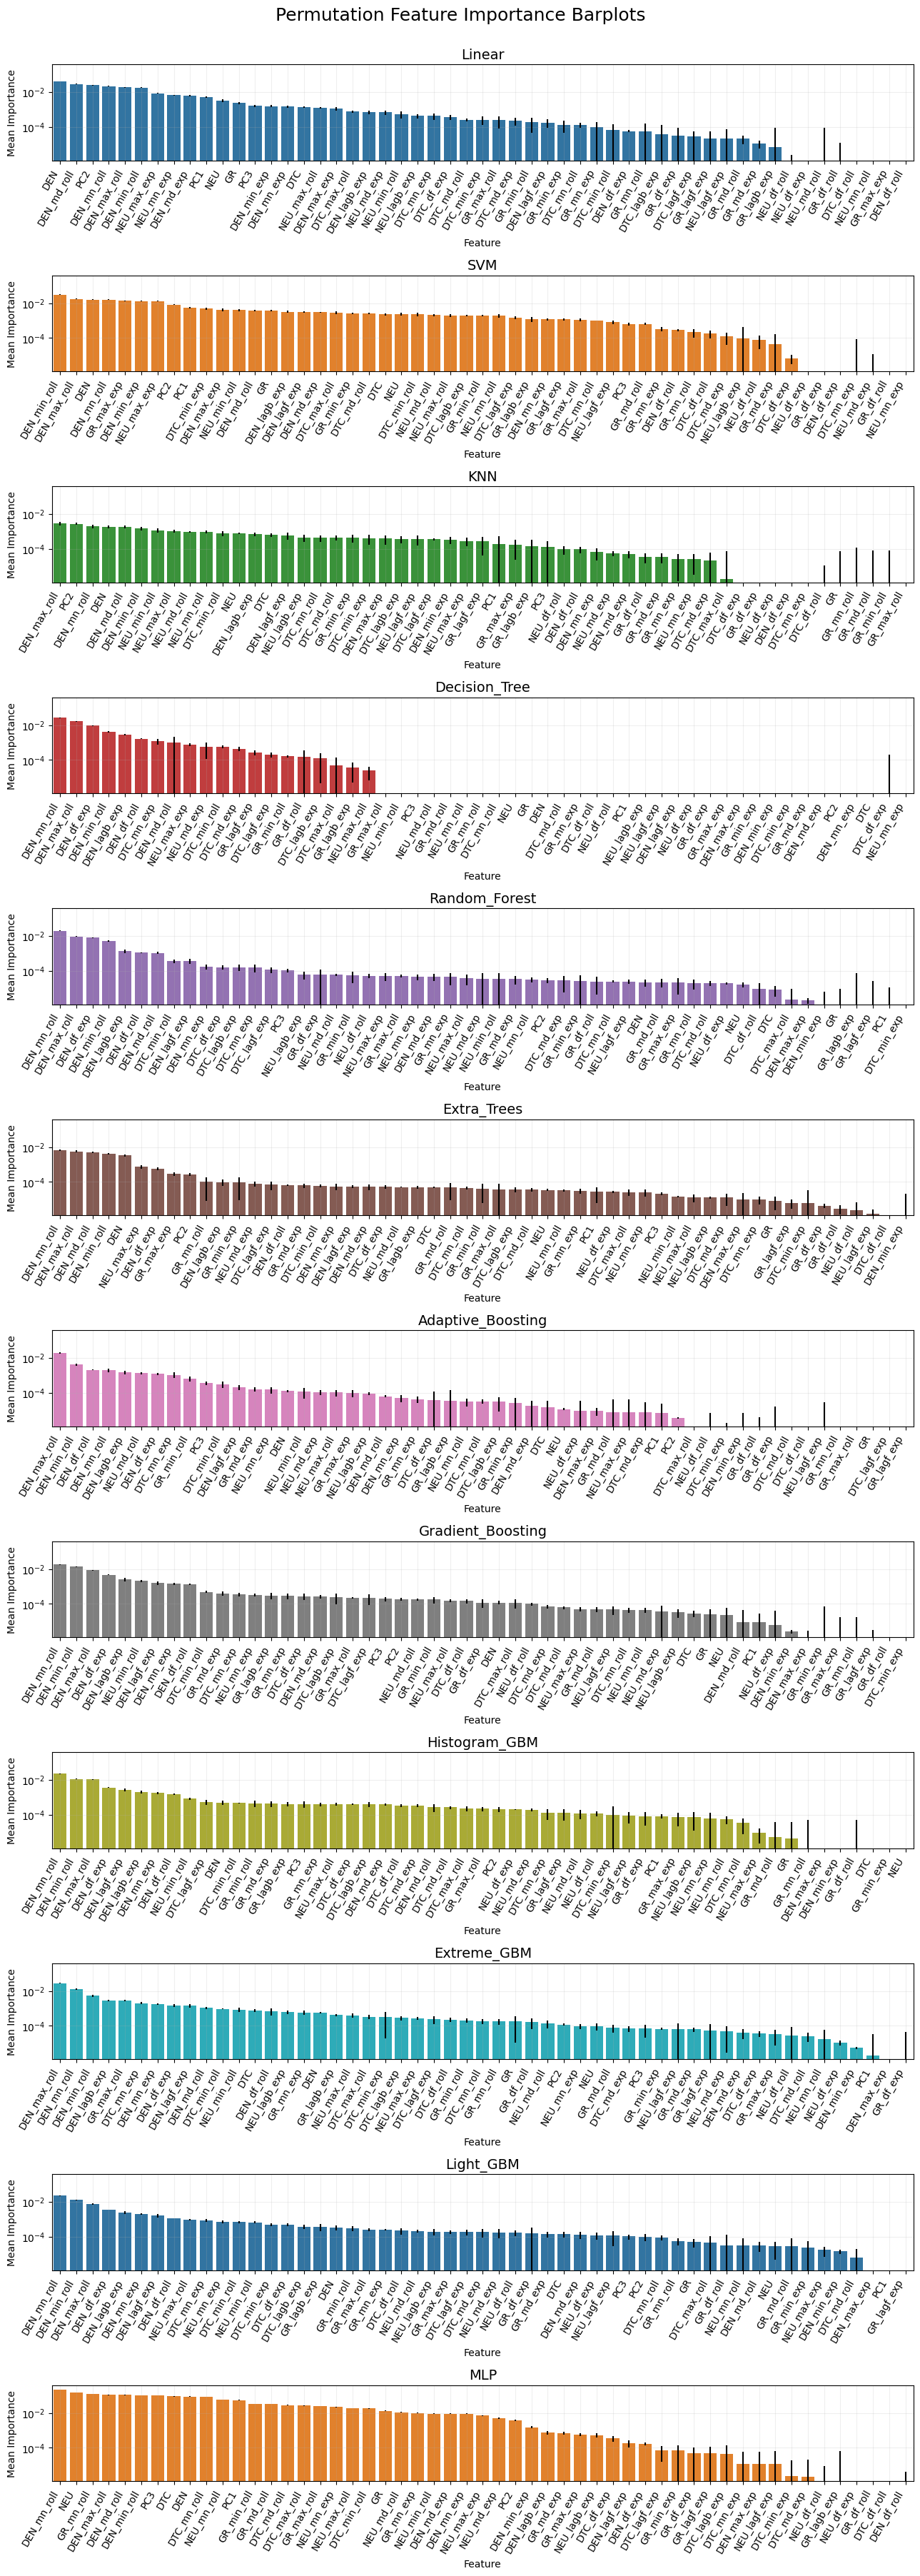

In [125]:
# pfi barplots
pfi_barplot(pfi_scr_mean_df_lst=pfi_scr_mean_df_lst, pfi_scr_std=pfi_scr_std)

In [126]:
# create a function for plotting the boxplots of the permutaion feature importance scores for each method
def pfi_boxplot(pfi_scr_df_lst):
    # pfi_scr_df_lst: all scores

    # plot the boxplot to compare the spread and centers of the importance of the features
    fig, axs = plt.subplots(figsize=(13, 3*len(pfi_scr_df_lst)), nrows=len(pfi_scr_df_lst), sharey=True)
    
    #colors = [cm.get_cmap('gist_ncar_r', len(estimator_names)+1)(n) for n in np.linspace(0,1,len(estimator_names)+1)][1:]
    colors = cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors + cm.get_cmap('tab10').colors
    
    for (i, ax), est in zip(enumerate(fig.axes), estimator_names):
        sns.boxplot(data=pfi_scr_df_lst[i], orient='v', color=colors[i], ax=ax)

        ax.set(xlabel='Feature')
        ax.set(ylabel='Importance')
        ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation='60')
        ax.set_yscale('log')
        ax.set_title(est, size=14)
        ax.grid(which='major', alpha=0.2)

    plt.suptitle(y=1.001,  t='Permutation Feature Importance Boxplots', size=18)
    plt.tight_layout()

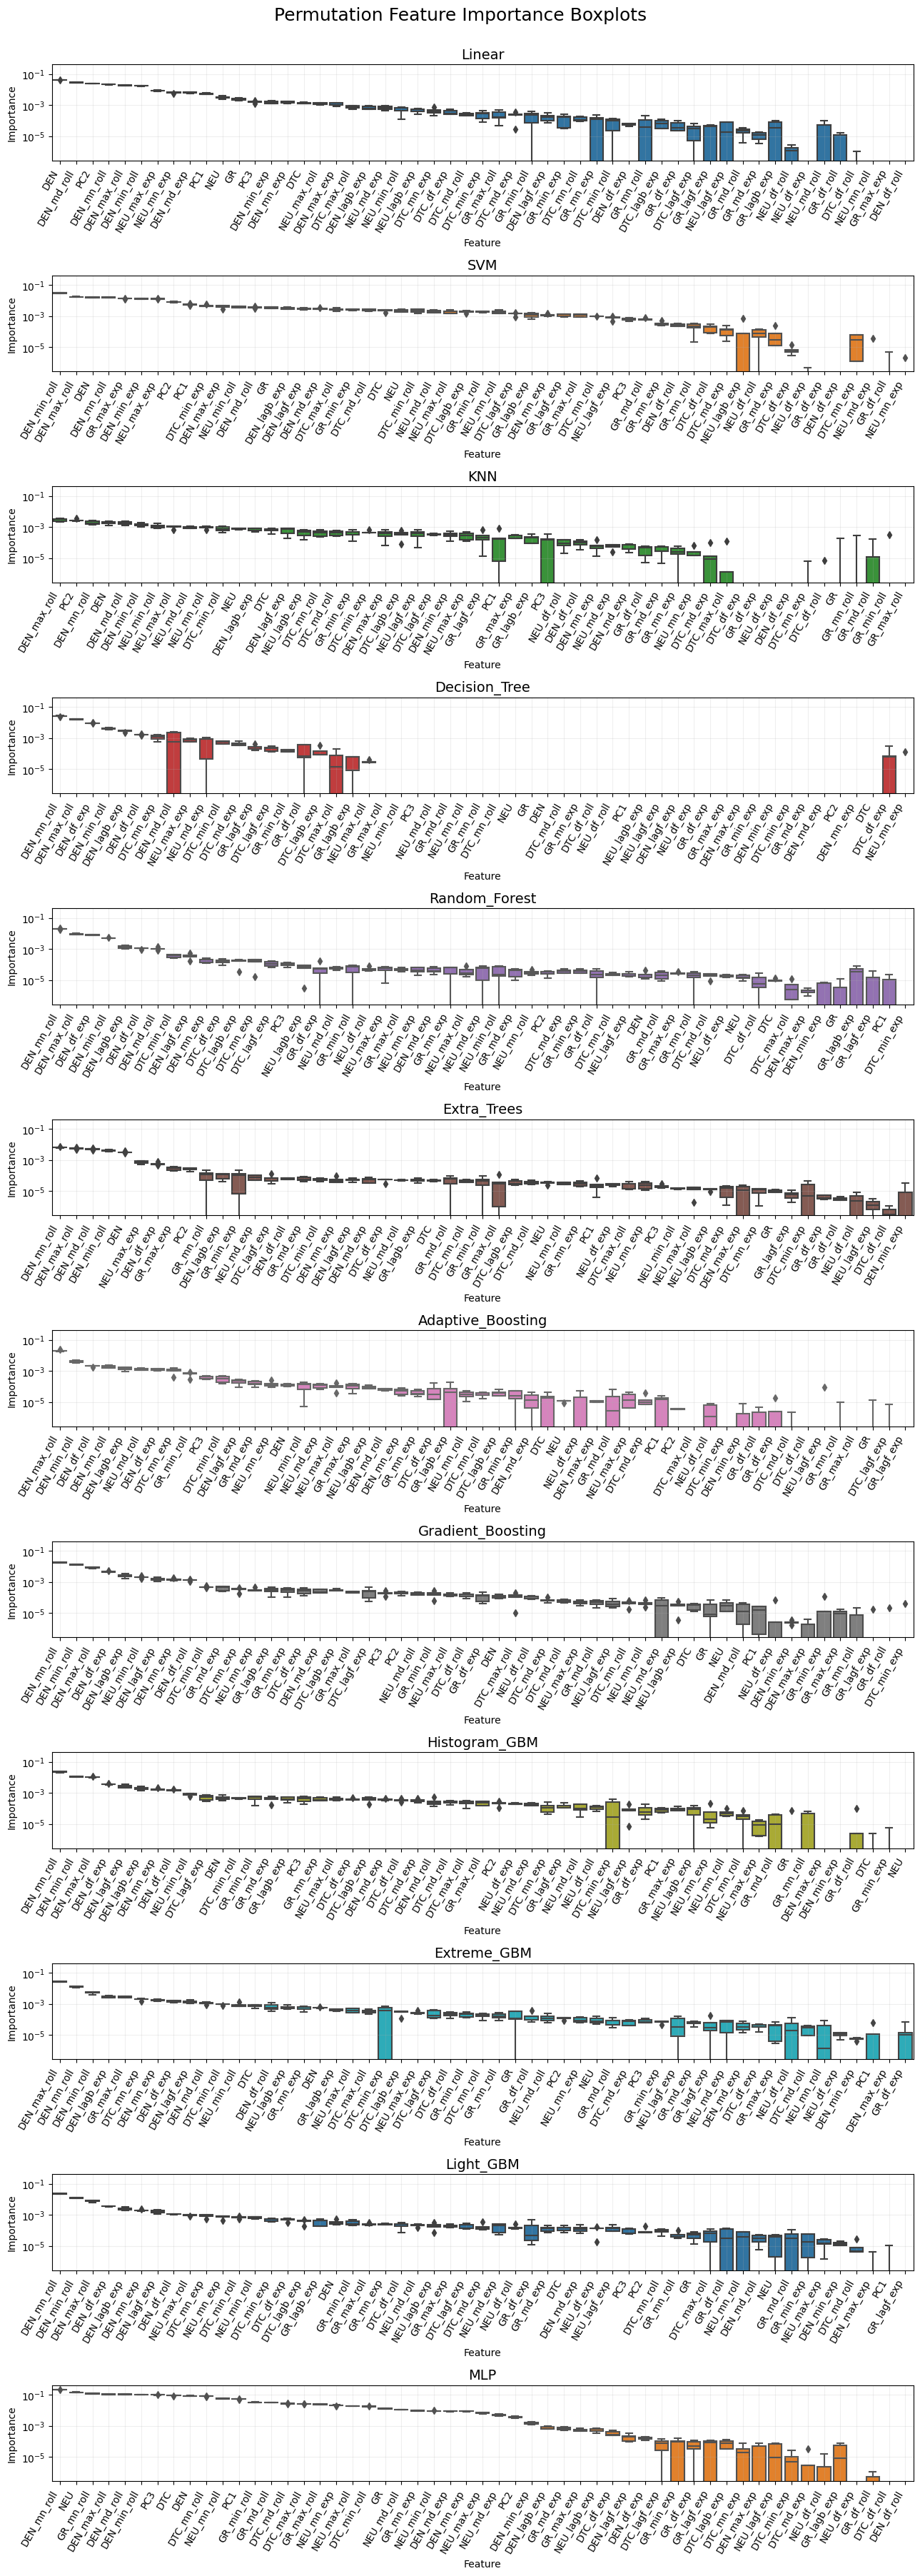

In [127]:
# pfi boxplots
pfi_boxplot(pfi_scr_df_lst=pfi_scr_df_lst)